In [864]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


In [865]:
df = pd.read_csv("2025_Airbnb_NYC_listings.csv")
df

,Unnamed: 0,id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,36121,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,62165,Michael,2009-12-11,"New York, NY",I’m an urban planner working for an internatio...,NaN,NaN,NaN,f,Prospect Heights,1.0,3.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Prospect Heights,Brooklyn,40.673760,-73.966110,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",$200.00,90,365,90.0,90.0,365.0,365.0,90.0,365.0,NaN,t,27,57,87,362,2025-03-03,9,0,0,301,0,0,0.0,2010-12-11,2013-05-10,4.88,5.00,4.80,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,1,36647,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",157798,Irene,2010-07-04,"New York, NY",NaN,NaN,NaN,100%,f,East Harlem,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,East Harlem,Manhattan,40.792454,-73.940742,Private room in condo,Private room,2,1.0,1 private bath,1.0,1.0,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",$82.00,30,999,30.0,30.0,999.0,999.0,30.0,999.0,NaN,t,0,0,0,204,2025-03-03,102,0,0,143,0,0,0.0,2010-10-04,2023-12-09,4.77,4.82,4.76,4.88,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,2,38663,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",165789,Sarah,2010-07-13,"New York, NY",I am a lawyer and work as an executive at an a...,within a few hours,100%,40%,f,Boerum Hill,1.0,3.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Boerum Hill,Brooklyn,40.684420,-73.980680,Private room in home,Private room,2,2.5,2.5 baths,5.0,5.0,"[""Portable fans"", ""Oven"", ""Baking sheet"", ""Fir...",$765.00,3,60,3.0,3.0,60.0,60.0,3.0,60.0,NaN,t,30,49,66,326,2025-03-02,43,0,0,267,0,0,0.0,2012-07-09,2023-08-30,4.70,4.83,4.52,4.88,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,3,38833,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,166532,Matthew,2010-07-14,"New York, NY",I have been a New Yorker for a long time\n and...,within an hour,100%,97%,t,Harlem,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Harlem,Manhattan,40.818058,-73.946671,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Clothing storage: close...",$139.00,2,45,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,7,18,25,25,2025-03-03,241,42,3,25,43,255,35445.0,2010-08-28,2025-02-21,4.85,4.87,4.50,4.96,4.96,4.79,4.82,

In [866]:
df.columns

Index(['Unnamed: 0', 'id', 'source', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
     

In [867]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22308 entries, 0 to 22307
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    22308 non-null  int64  
 1   id                                            22308 non-null  int64  
 2   source                                        22308 non-null  object 
 3   name                                          22308 non-null  object 
 4   description                                   21903 non-null  object 
 5   neighborhood_overview                         12262 non-null  object 
 6   host_id                                       22308 non-null  int64  
 7   host_name                                     22288 non-null  object 
 8   host_since                                    22288 non-null  object 
 9   host_location                                 17025 non-null 

In [868]:
'''
pd.set_option('display.max_columns', None)  # 컬럼 제한 해제
pd.set_option('display.max_rows', None)     # 행 제한 해제
pd.set_option('display.width', None)        # 자동 줄바꿈 방지
'''

"\npd.set_option('display.max_columns', None)  # 컬럼 제한 해제\npd.set_option('display.max_rows', None)     # 행 제한 해제\npd.set_option('display.width', None)        # 자동 줄바꿈 방지\n"

In [869]:
col_df = pd.DataFrame({
    'No': range(1, len(df.columns)+1),
    'Column Name': df.columns
})
display(col_df)

,No,Column Name
0,1,Unnamed: 0
1,2,id
2,3,source
3,4,name
4,5,description
5,6,neighborhood_overview
6,7,host_id
7,8,host_name
8,9,host_since
9,10,host_location


In [870]:
df[['host_verifications', 'license']].head(100)

,host_verifications,license
0,"['email', 'phone', 'work_email']",NaN
1,"['email', 'phone']",NaN
2,"['email', 'phone', 'work_email']",OSE-STRREG-0001784
3,"['email', 'phone']",OSE-STRREG-0000476
4,"['email', 'phone']",OSE-STRREG-0001150
5,"['email', 'phone']",NaN
6,"['email', 'phone']",NaN
7,"['email', 'phone', 'work_email']",NaN
8,"['email', 'phone']",NaN
9,"['email', 'phone']",OSE-STRREG-0000008


In [871]:
df.isnull().sum()

Unnamed: 0                                          0
id                                                  0
source                                              0
name                                                0
description                                       405
neighborhood_overview                           10046
host_id                                             0
host_name                                          20
host_since                                         20
host_location                                    5283
host_about                                       8917
host_response_time                               4393
host_response_rate                               4393
host_acceptance_rate                             3466
host_is_superhost                                 374
host_neighbourhood                               4730
host_listings_count                                20
host_total_listings_count                          20
host_verifications          

In [872]:
df = pd.read_csv("filtered_airbnb_1.csv")
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,2009-12-11,NaN,NaN,NaN,f,3.0,"['email', 'phone', 'work_email']",t,t,Prospect Heights,Brooklyn,40.673760,-73.966110,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",$200.00,90,365,t,9,0,0,0,0,2013-05-10,4.88,5.00,4.80,5.00,5.00,5.00,5.00,NaN,f,0.05
1,2010-07-04,NaN,NaN,100%,f,1.0,"['email', 'phone']",t,t,East Harlem,Manhattan,40.792454,-73.940742,Private room in condo,Private room,2,1.0,1 private bath,1.0,1.0,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",$82.00,30,999,t,102,0,0,0,0,2023-12-09,4.77,4.82,4.76,4.88,4.90,4.38,4.71,NaN,f,0.58
2,2010-07-13,within a few hours,100%,40%,f,3.0,"['email', 'phone', 'work_email']",t,t,Boerum Hill,Brooklyn,40.684420,-73.980680,Private room in home,Private room,2,2.5,2.5 baths,5.0,5.0,"[""Portable fans"", ""Oven"", ""Baking sheet"", ""Fir...",$765.00,3,60,t,43,0,0,0,0,2023-08-30,4.70,4.83,4.52,4.88,4.88,4.86,4.62,OSE-STRREG-0001784,f,0.28
3,2010-07-14,within an hour,100%,97%,t,1.0,"['email', 'phone']",t,t,Harlem,Manhattan,40.818058,-73.946671,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Clothing storage: close...",$139.00,2,45,t,241,42,3,43,255,2025-02-21,4.85,4.87,4.50,4.96,4.96,4.79,4.82,OSE-STRREG-0000476,f,1.36
4,2010-07-16,within an hour,100%,100%,t,2.0,"['email', 'phone']",t,t,Williamsburg,Brooklyn,40.710651,-73.950874,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Oven"", ""Rice maker"", ""Laundromat nearby"", ""L...",$130.00,4,45,t,274,12,0,12,154,2025-01-03,4.82,4.83,4.61,4.94,4.88,4.85,4.78,OSE-STRREG-0001150,f,1.54


In [873]:
df.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'number_of_reviews_ly', 'estimated_occupancy_l365d', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [874]:
df.isnull().sum()

host_since                         20
host_response_time               4393
host_response_rate               4393
host_acceptance_rate             3466
host_is_superhost                 374
host_total_listings_count          20
host_verifications                 20
host_has_profile_pic               20
host_identity_verified             20
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           6
bathrooms_text                     14
bedrooms                           49
beds                               79
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availability                  246
number_of_reviews                   0
number_of_re

In [875]:
df[df['review_scores_location'].isnull()][['estimated_occupancy_l365d','host_is_superhost','last_review','review_scores_rating','review_scores_location']].head()

,estimated_occupancy_l365d,host_is_superhost,last_review,review_scores_rating,review_scores_location
31,0,f,NaN,NaN,NaN
59,0,f,NaN,NaN,NaN
107,0,f,NaN,NaN,NaN
110,0,f,NaN,NaN,NaN
189,0,f,NaN,NaN,NaN


In [876]:
df['review_scores_rating'].isnull().sum()

np.int64(6798)

In [877]:
df['bathrooms_text'].unique()

array(['1 shared bath', '1 private bath', '2.5 baths', '1 bath', nan,
       '1.5 baths', '2 baths', '1.5 shared baths', '3 baths',
       '2 shared baths', '0 shared baths', '4.5 baths', '3.5 baths',
       'Private half-bath', '0 baths', '3.5 shared baths', '15.5 baths',
       '2.5 shared baths', '3 shared baths', '10.5 baths', '4 baths',
       '5 baths', 'Half-bath', '4 shared baths', '4.5 shared baths',
       '5.5 baths', '6 baths', '7 baths', 'Shared half-bath',
       '6 shared baths', '7.5 baths', '5 shared baths'], dtype=object)

In [878]:
df = pd.read_csv("filtered_airbnb_1-2.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_airbnb_1-2.csv'

In [ ]:
df.isnull().sum()

host_since                         20
host_response_time               4393
host_response_rate               4393
host_acceptance_rate             3466
host_is_superhost                 374
host_total_listings_count          20
host_verifications                 20
host_has_profile_pic               20
host_identity_verified             20
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           6
bathrooms_text                     14
bedrooms                           49
beds                               79
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availability                  246
availability_365                    0
number_of_re

In [ ]:
# 추정 객실 점유율
df['estimated_occupancy_l365d'].unique()

array([  0, 255, 154, 180,  60, 168, 120,  62, 240,  56, 192, 141, 186,
       205, 179,  13,  38, 115,  51,  26, 102, 218, 170, 243, 124, 130,
       150,  98,  64, 220, 230,  77, 166,  90,  28, 248, 210, 128,  42,
       140, 118,  84,  92,  70, 238, 252,  14, 236,  80, 126,  48, 112,
       216, 160, 234, 200,  20, 100, 182])

In [ ]:
# 예약 가능한 일 수 
df['availability_365'].unique()

array([362, 204, 326,  25,  38, 365, 173,  83, 264, 190,   0, 150, 144,
        48, 176,  89, 145, 364, 137, 110, 303,  90, 206, 118, 317,  60,
       175,  84, 304, 200, 280,  50,  57, 177, 354, 263, 300,  88,  20,
       215, 172,  71, 211,  59, 358, 274,  61,  33, 241, 180, 213, 199,
       203, 226,  92, 151, 292, 166, 242, 239, 152, 341, 101, 305, 136,
       112, 340, 210, 361, 153, 182, 163,  45, 363, 275,  93, 270,  87,
       315,   5, 167, 121, 269, 337, 295, 272, 113, 105, 237, 335, 107,
        69, 245, 301, 355, 220, 178, 179, 214, 276, 287, 229, 293,  70,
       139, 334, 249, 192, 181, 238, 135, 154, 265, 193, 196, 258, 336,
        32, 281, 156, 307,  29, 243, 171, 138, 350, 246,  78, 232, 230,
        73,  35,  44,  58, 316,  95,  82, 104, 268, 351, 359, 267,  65,
       331, 323,  17,   1,  62, 198, 311, 116, 356,  43, 332, 257, 149,
       125, 357, 123, 327, 109, 162, 329, 308, 126, 205,  79, 119, 183,
       219, 328, 306,  56, 195, 273, 244, 266, 314, 353, 255, 18

In [ ]:
df[['review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','license','instant_bookable','reviews_per_month']].dtypes

review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                         object
instant_bookable                object
reviews_per_month              float64
dtype: object

In [ ]:
df['reviews_per_month'].isnull().sum()

np.int64(6798)

In [ ]:
df['license'].unique()

array([nan, 'OSE-STRREG-0001784', 'OSE-STRREG-0000476', ...,
       'OSE-STRREG-0002922', 'OSE-STRREG-0002813', 'OSE-STRREG-0002894'],
      shape=(1895,), dtype=object)

In [ ]:
# 즉시 예약 가능여부
df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [ ]:
df['reviews_per_month'].unique()

array([5.0000e-02, 5.8000e-01, 2.8000e-01, 1.3600e+00, 1.5400e+00,
       2.5000e-01, 1.0100e+00, 3.0000e-02, 1.3400e+00, 2.1600e+00,
       7.0000e-02, 1.0300e+00, 9.5000e-01, 1.1000e-01, 8.9000e-01,
       7.4000e-01, 3.9000e-01, 1.2500e+00, 4.0000e-02, 1.3200e+00,
       7.1000e-01, 3.1000e-01, 4.5000e-01, 4.3000e-01, 9.7000e-01,
       2.9000e-01, 3.3000e-01, 4.4200e+00, 8.0000e-02,        nan,
       7.8000e-01, 1.6900e+00, 1.0000e-01, 2.8100e+00, 2.1100e+00,
       1.0700e+00, 1.6500e+00, 2.0000e-01, 4.2000e-01, 1.7000e-01,
       1.6000e+00, 1.5800e+00, 3.0000e-01, 9.0000e-01, 1.4700e+00,
       3.8000e-01, 9.0000e-02, 6.1000e-01, 1.9000e-01, 6.8000e-01,
       8.3000e-01, 1.1200e+00, 1.7400e+00, 1.7700e+00, 1.1800e+00,
       5.2000e-01, 2.6700e+00, 1.4000e-01, 1.5700e+00, 1.7000e+00,
       1.1700e+00, 2.7000e-01, 1.8000e-01, 7.5000e-01, 1.9800e+00,
       4.9000e-01, 2.2400e+00, 4.0700e+00, 3.5000e-01, 2.5500e+00,
       3.3700e+00, 1.6700e+00, 1.1600e+00, 3.2400e+00, 2.3100e

In [ ]:
df[df['reviews_per_month'] < 0]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month


In [ ]:
df[df['review_scores_value'] < 0]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month


In [ ]:
df['bathrooms_text'].unique()

array(['1 shared bath', '1 private bath', '2.5 baths', '1 bath', nan,
       '1.5 baths', '2 baths', '1.5 shared baths', '3 baths',
       '2 shared baths', '0 shared baths', '4.5 baths', '3.5 baths',
       'Private half-bath', '0 baths', '3.5 shared baths', '15.5 baths',
       '2.5 shared baths', '3 shared baths', '10.5 baths', '4 baths',
       '5 baths', 'Half-bath', '4 shared baths', '4.5 shared baths',
       '5.5 baths', '6 baths', '7 baths', 'Shared half-bath',
       '6 shared baths', '7.5 baths', '5 shared baths'], dtype=object)

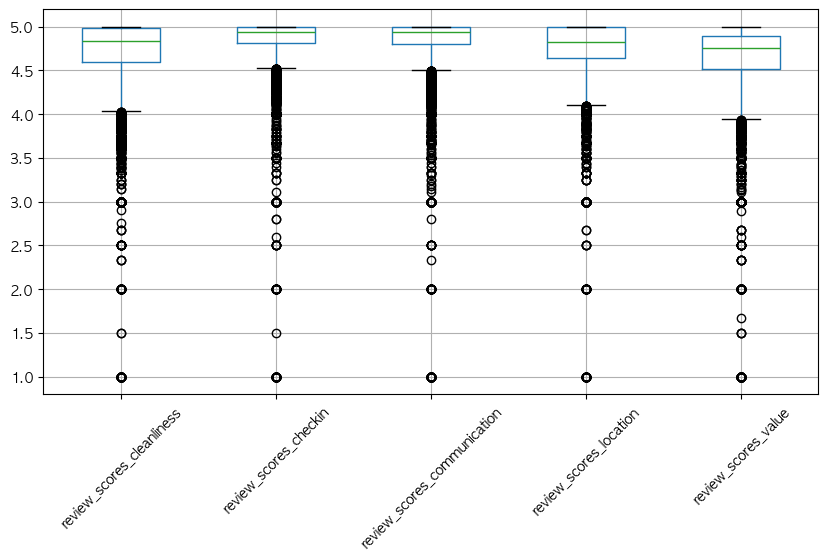

In [ ]:
import matplotlib.pyplot as plt

df[['review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].boxplot(figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

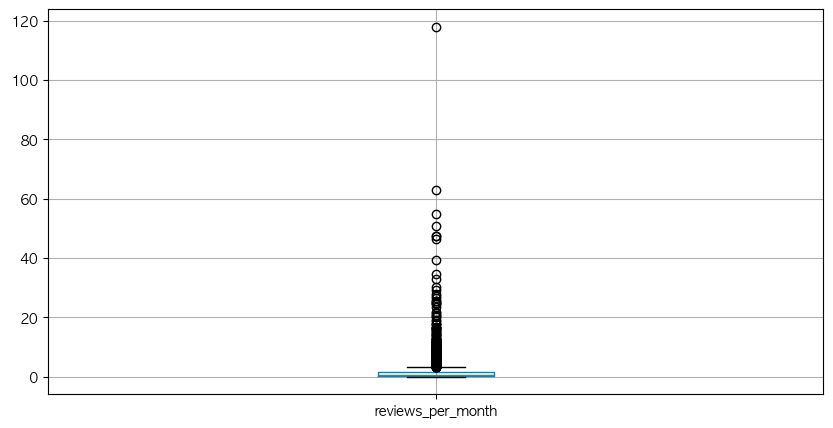

In [ ]:
df[['reviews_per_month']].boxplot(figsize=(10,5))
plt.show()

In [ ]:
df = pd.read_csv("filtered_airbnb_3.csv")
df.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,review_flag
0,36121,2009-12-11,no response,0%,0%,f,3.0,"['email', 'phone', 'work_email']",t,t,Prospect Heights,Brooklyn,40.673760,-73.966110,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",$200.00,90,365,t,362,9,0,0,0,0,4.88,5.00,4.80,5.00,5.00,5.00,5.00,no license,f,0.05,1
1,36647,2010-07-04,no response,0%,100%,f,1.0,"['email', 'phone']",t,t,East Harlem,Manhattan,40.792454,-73.940742,Private room in condo,Private room,2,1.0,1 private bath,1.0,1.0,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",$82.00,30,999,t,204,102,0,0,0,0,4.77,4.82,4.76,4.88,4.90,4.38,4.71,no license,f,0.58,1
2,38663,2010-07-13,within a few hours,100%,40%,f,3.0,"['email', 'phone', 'work_email']",t,t,Boerum Hill,Brooklyn,40.684420,-73.980680,Private room in home,Private room,2,2.5,2.5 baths,5.0,5.0,"[""Portable fans"", ""Oven"", ""Baking sheet"", ""Fir...",$765.00,3,60,t,326,43,0,0,0,0,4.70,4.83,4.52,4.88,4.88,4.86,4.62,OSE-STRREG-0001784,f,0.28,1
3,38833,2010-07-14,within an hour,100%,97%,t,1.0,"['email', 'phone']",t,t,Harlem,Manhattan,40.818058,-73.946671,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Clothing storage: close...",$139.00,2,45,t,25,241,42,3,43,255,4.85,4.87,4.50,4.96,4.96,4.79,4.82,OSE-STRREG-0000476,f,1.36,1
4,39282,2010-07-16,within an hour,100%,100%,t,2.0,"['email', 'phone']",t,t,Williamsburg,Brooklyn,40.710651,-73.950874,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Oven"", ""Rice maker"", ""Laundromat nearby"", ""L...",$130.00,4,45,t,38,274,12,0,12,154,4.82,4.83,4.61,4.94,4.88,4.85,4.78,OSE-STRREG-0001150,f,1.54,1


In [ ]:
df['has_availability'].fillna('f', inplace=True)
df

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,review_flag
0,36121,2009-12-11,no response,0%,0%,f,3.0,"['email', 'phone', 'work_email']",t,t,Prospect Heights,Brooklyn,40.673760,-73.966110,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",$200.00,90,365,t,362,9,0,0,0,0,4.88,5.00,4.80,5.00,5.00,5.00,5.00,no license,f,0.05,1
1,36647,2010-07-04,no response,0%,100%,f,1.0,"['email', 'phone']",t,t,East Harlem,Manhattan,40.792454,-73.940742,Private room in condo,Private room,2,1.0,1 private bath,1.0,1.0,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",$82.00,30,999,t,204,102,0,0,0,0,4.77,4.82,4.76,4.88,4.90,4.38,4.71,no license,f,0.58,1
2,38663,2010-07-13,within a few hours,100%,40%,f,3.0,"['email', 'phone', 'work_email']",t,t,Boerum Hill,Brooklyn,40.684420,-73.980680,Private room in home,Private room,2,2.5,2.5 baths,5.0,5.0,"[""Portable fans"", ""Oven"", ""Baking sheet"", ""Fir...",$765.00,3,60,t,326,43,0,0,0,0,4.70,4.83,4.52,4.88,4.88,4.86,4.62,OSE-STRREG-0001784,f,0.28,1
3,38833,2010-07-14,within an hour,100%,97%,t,1.0,"['email', 'phone']",t,t,Harlem,Manhattan,40.818058,-73.946671,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Clothing storage: close...",$139.00,2,45,t,25,241,42,3,43,255,4.85,4.87,4.50,4.96,4.96,4.79,4.82,OSE-STRREG-0000476,f,1.36,1
4,39282,2010-07-16,within an hour,100%,100%,t,2.0,"['email', 'phone']",t,t,Williamsburg,Brooklyn,40.710651,-73.950874,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Oven"", ""Rice maker"", ""Laundromat nearby"", ""L...",$130.00,4,45,t,38,274,12,0,12,154,4.82,4.83,4.61,4.94,4.88,4.85,4.78,OSE-STRREG-0001150,f,1.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22269,1366333532374850165,2015-07-30,no response,0%,0%,f,2.0,"['email', 'phone']",t,t,Harlem,Manhattan,40.813794,-73.952399,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Air conditioning"", ""Carbon monoxide alarm"", ...",$72.00,30,365,t,358,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no license,f,NaN,0
22270,1366717321390111215,2022-10-10,within an hour,100%,80%,t,33.0,"['email', 'phone']",t,t,Bedford-Stuyvesant,Brooklyn,40.685500,-73.919510,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,0.0,"[""Air conditioning"", ""Carbon monoxide alarm"", ...",$58.00,30,365,t,363,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no license,f,NaN,0
22271,1366721904709517353,2015-03-30,within an hour,94%,99%,f,1974.0,"['email', 'phone', 'work_email']",t,t,Kips Bay,Manhattan,40.745290,-73.979380,Entire rental unit,Entire home/apt,5,2.0,2 baths,2.0,3.0,"[""Air conditioning"", ""Carbon monoxide alarm"", ...",$299.00,30,365,t,99,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no license,f,NaN,0
22272,1366722692755341871,2021-06-15,within an hour,89%,100%,f,38.0,"['email', 'phone']",t,t,Theater District,Manhattan,40.757133,-73.983124,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Oven"", ""Gym"", ""Blender"", ""Dedicated workspac...",$200.00,30,365,t,365,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no license,t,NaN,0


In [ ]:
df.columns

Index(['id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable', 'reviews_per_month', 'review_flag'],
      dtype='object')

In [ ]:
df.isnull().sum()

id                                 0
host_since                         0
host_response_time                 0
host_response_rate                 0
host_acceptance_rate               0
host_is_superhost                  0
host_total_listings_count          0
host_verifications                 0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bathrooms_text                     0
bedrooms                           0
beds                               0
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_365                   0
n

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 최근 12개월 리뷰 수, 작년 리뷰 수 
cols = [
    'number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','number_of_reviews_ly', 'reviews_per_month'
]
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_reviews,22274.0,34.348568,76.804277,0.00,0.00,5.0,35.00,2749.00
number_of_reviews_ltm,22274.0,6.137066,24.617509,0.00,0.00,0.0,3.00,1784.00
number_of_reviews_l30d,22274.0,0.321092,1.877393,0.00,0.00,0.0,0.00,135.00
number_of_reviews_ly,22274.0,5.913846,24.127795,0.00,0.00,0.0,3.00,1797.00
reviews_per_month,15482.0,1.159921,2.225212,0.01,0.18,0.5,1.49,117.98


In [ ]:
cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value']

df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
review_scores_rating,15482.0,4.724496,0.456468,1.0,4.6625,4.85,5.00,5.0
review_scores_accuracy,15482.0,4.752980,0.439875,1.0,4.7000,4.88,5.00,5.0
review_scores_cleanliness,15482.0,4.687664,0.468689,1.0,4.6000,4.83,4.98,5.0
review_scores_checkin,15482.0,4.831568,0.369904,1.0,4.8100,4.94,5.00,5.0
review_scores_communication,15482.0,4.813518,0.418891,1.0,4.8000,4.94,5.00,5.0
review_scores_location,15481.0,4.729736,0.388392,1.0,4.6400,4.82,5.00,5.0
review_scores_value,15482.0,4.613502,0.503816,1.0,4.5100,4.74,4.89,5.0


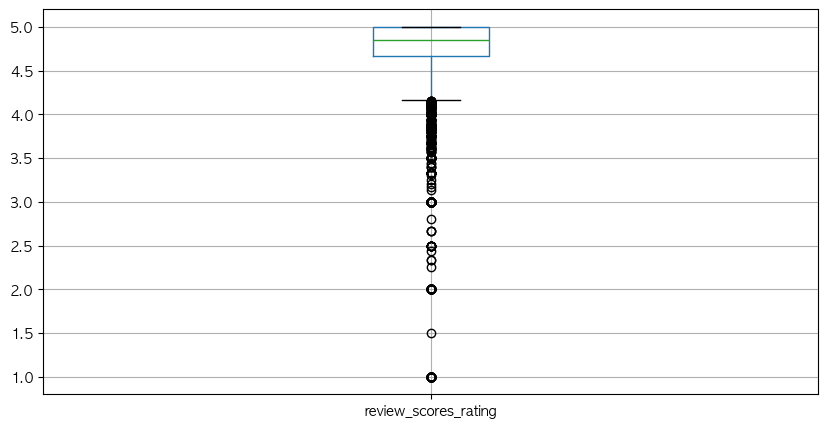

In [ ]:
df[['review_scores_rating']].boxplot(figsize=(10,5))
plt.show()

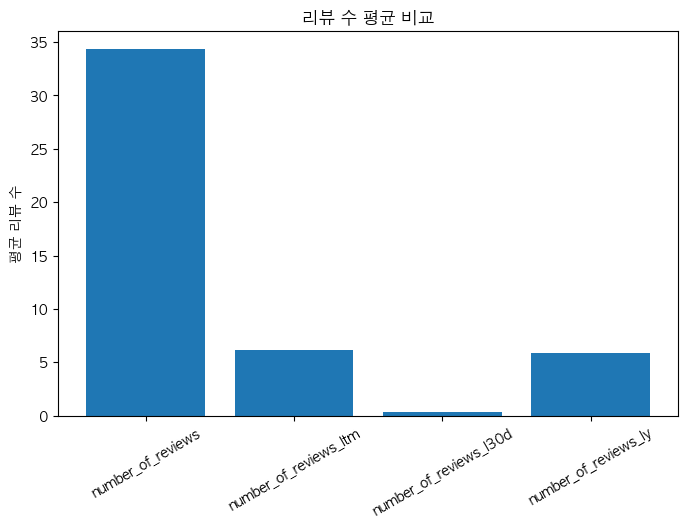

In [ ]:
# 최신 리뷰날짜를 기준으로 전체 리뷰수, 12개월 리뷰수, 30일 리뷰수, 작년리뷰수 평균 비교
cols = [
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'number_of_reviews_ly'
]
means = df[cols].mean()

plt.figure(figsize=(8,5))
plt.bar(means.index, means.values)
plt.title('리뷰 수 평균 비교')
plt.ylabel('평균 리뷰 수')
plt.xticks(rotation=30)
plt.show()

리뷰 숫자를 단순히 보기 위해서 만들었습니다. 
기술 통계를 보면 
	                    mean	
number_of_reviews	    34.348568	
number_of_reviews_ltm	6.137066	
number_of_reviews_l30d	0.321092	
number_of_reviews_ly	5.913846

애초에 숙소 평균 리뷰 수가 34.3개
최근 12개월 평균 리뷰 수가 6개
한달 (30) 평균 리뷰 수 0.3 ..? 
작년 평균 리뷰 수 6개 ?

reviews_per_month 월 평균 리뷰수
number_of_reviews_l30d 최근 30일 리뷰 수 

In [ ]:
df['number_of_reviews'].count()

np.int64(22274)

In [ ]:
df['number_of_reviews_ly'].count()

np.int64(22274)

In [ ]:
df_scores = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_scores

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,4.88,5.00,4.80,5.00,5.00,5.00,5.00,0.05
1,4.77,4.82,4.76,4.88,4.90,4.38,4.71,0.58
2,4.70,4.83,4.52,4.88,4.88,4.86,4.62,0.28
3,4.85,4.87,4.50,4.96,4.96,4.79,4.82,1.36
4,4.82,4.83,4.61,4.94,4.88,4.85,4.78,1.54
...,...,...,...,...,...,...,...,...
22269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


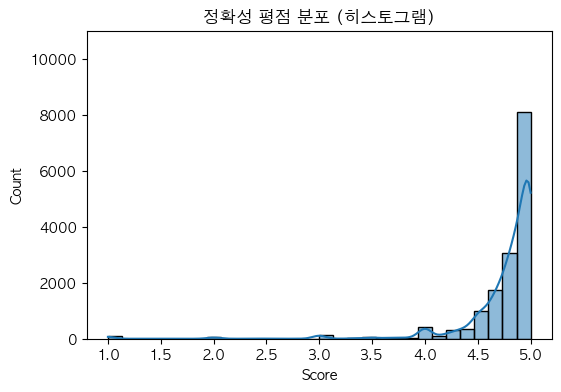

In [ ]:
# review_scores_accuracy (정확성 평점) 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='review_scores_accuracy', bins=30, kde=True)
plt.title('정확성 평점 분포 (히스토그램)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.ylim(0, 11000)
plt.show()


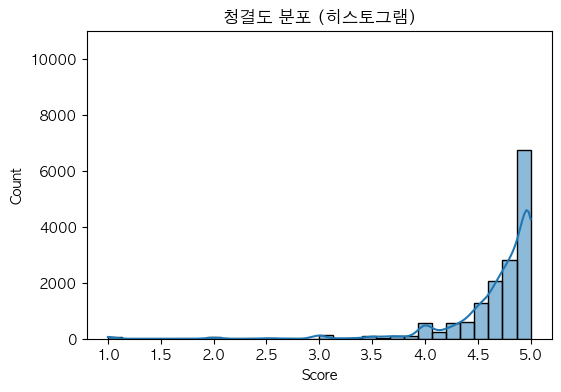

In [ ]:
# review_scores_cleanliness (청결도) 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='review_scores_cleanliness', bins=30, kde=True)
plt.title('청결도 분포 (히스토그램)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.ylim(0, 11000)
plt.show()


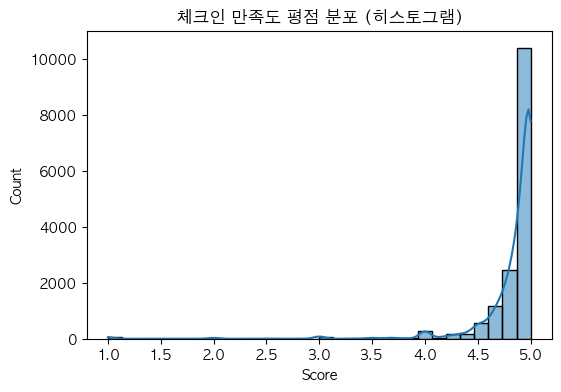

In [ ]:
# review_scores_checkin (체크인 만족도 평점) 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='review_scores_checkin', bins=30, kde=True)
plt.title('체크인 만족도 평점 분포 (히스토그램)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.ylim(0, 11000)
plt.show()


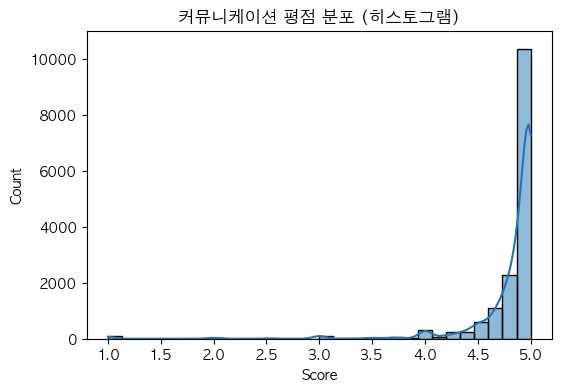

In [ ]:
# review_scores_communication(커뮤니케이션 평점) 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='review_scores_communication', bins=30, kde=True)
plt.title('커뮤니케이션 평점 분포 (히스토그램)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.ylim(0, 11000)
plt.show()


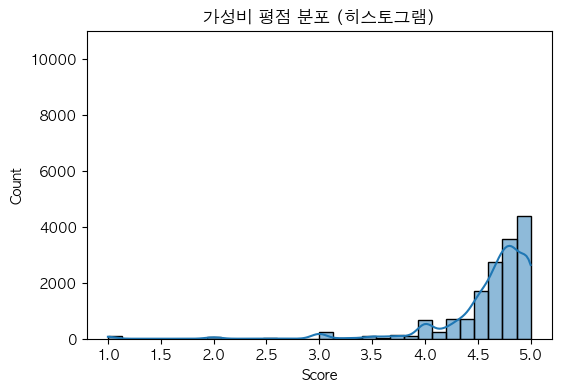

In [ ]:
# review_scores_value(가성비 평점) 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='review_scores_value', bins=30, kde=True)
plt.title('가성비 평점 분포 (히스토그램)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.ylim(0, 11000)
plt.show()


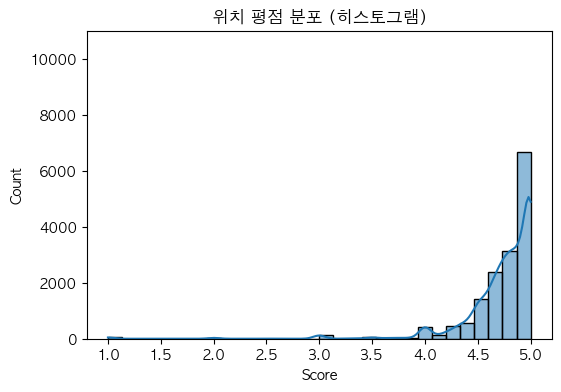

In [ ]:
# review_scores_location(위치 평점) 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='review_scores_location', bins=30, kde=True)
plt.title('위치 평점 분포 (히스토그램)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.ylim(0, 11000)
plt.show()


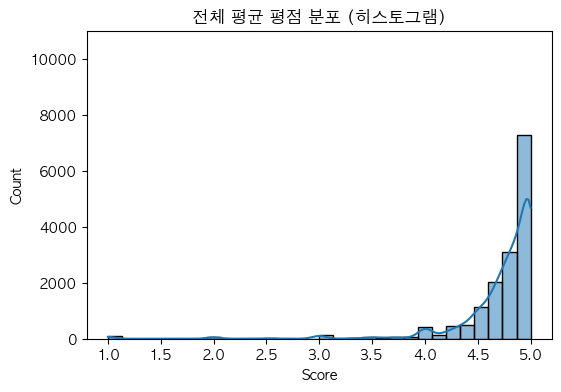

In [ ]:
# review_scores_rating(전체 평균 평점) 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='review_scores_rating', bins=30, kde=True)
plt.title('전체 평균 평점 분포 (히스토그램)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.ylim(0, 11000)
plt.show()


In [ ]:
df['review_flag'].unique()

array([1, 0])

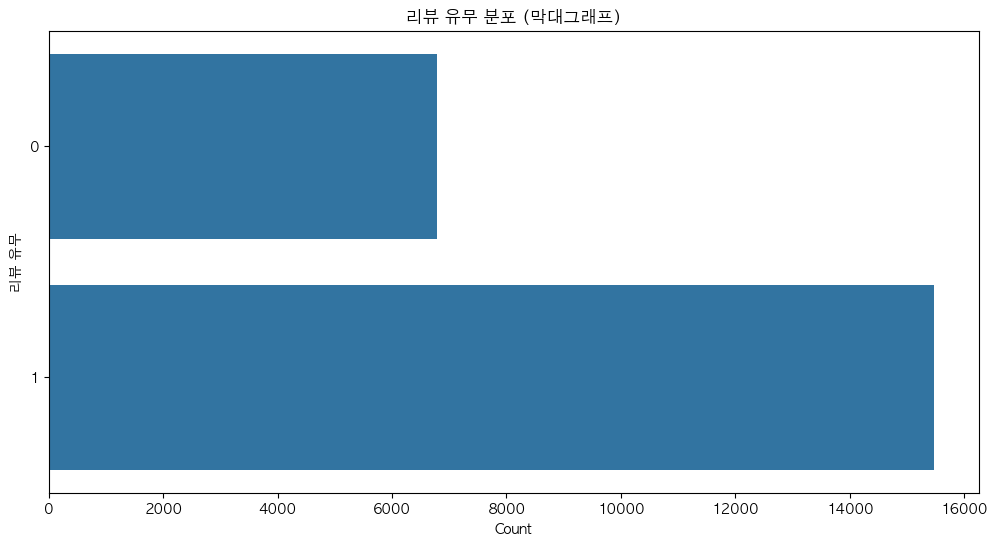

In [ ]:
#'review_flag' 막대그래프 (리뷰 유무)

sns.countplot(data=df, y='review_flag')
plt.title("리뷰 유무 분포 (막대그래프)")
plt.xlabel("Count")
plt.ylabel("리뷰 유무")
plt.show()

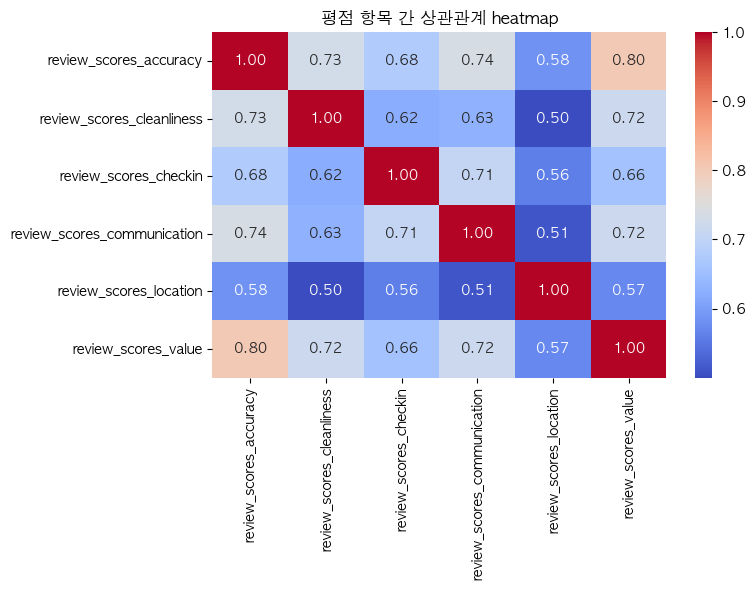

In [ ]:
# 평점 간 히트맵
cols = [ 
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value']
corr_matrix = df[cols].corr().values

corr_df = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("평점 항목 간 상관관계 heatmap")
plt.tight_layout()
plt.show()

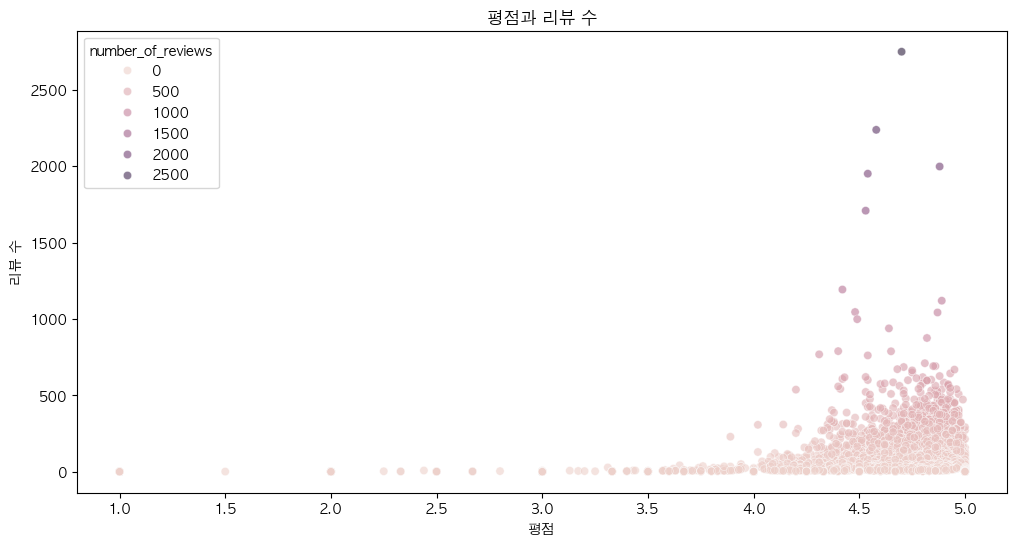

In [ ]:
# 평점과 리뷰 수 관계
# number_of_reviews, review_scores_rating

sns.scatterplot(x='review_scores_rating', y='number_of_reviews',data=df, alpha=0.6, marker='o', hue='number_of_reviews')
plt.title("평점과 리뷰 수")
plt.xlabel("평점")
plt.ylabel("리뷰 수")
plt.show()

# 리뷰 & 평점 관련 다변량 분석

In [ ]:
# 예약률 컬럼 만들기
df['occupancy_rate'] = 1 - (df['availability_365'] / 365)

🔹 estimated_occupancy_l365d

지난 1년간 실제 예약 비율(추정치)

AirDNA나 InsideAirbnb가 과거 로그 데이터를 기반으로 **“실제 예약 패턴”**을 추정한 값

현실적으로 더 정확한 실제 예약률(occupancy)

📘 → “지난 1년 동안 얼마나 예약되었나”
👉 과거 실적 기반

🔹 1 - (availability_365 / 365)

앞으로 1년 동안의 예약 가능일수를 기반으로 한 계산치

즉, 미래 기준의 “현재 시점에서 남은 빈방 비율의 반대값”

정확히는 “현재 시점에서 예약이 이미 잡힌 비율”

📘 → “지금 시점에서 얼마나 예약이 잡혀 있는가”
👉 현재 상태 기반

In [ ]:
df['estimated_occupancy_l365d'].unique()

array([  0, 255, 154, 180,  60, 168, 120,  62, 240,  56, 192, 141, 186,
       205, 179,  13,  38, 115,  51,  26, 102, 218, 170, 243, 124, 130,
       150,  98,  64, 220, 230,  77, 166,  90,  28, 248, 210, 128,  42,
       140, 118,  84,  92,  70, 238, 252,  14, 236,  80, 126,  48, 112,
       216, 160, 234, 200,  20, 100, 182])

In [ ]:
df['occupancy_rate'].unique()

array([0.00821918, 0.44109589, 0.10684932, 0.93150685, 0.89589041,
       0.5260274 , 0.77260274, 0.27671233, 0.47945205, 1.        ,
       0.5890411 , 0.60547945, 0.86849315, 0.        , 0.51780822,
       0.75616438, 0.60273973, 0.00273973, 0.62465753, 0.69863014,
       0.16986301, 0.75342466, 0.43561644, 0.67671233, 0.13150685,
       0.83561644, 0.52054795, 0.76986301, 0.16712329, 0.45205479,
       0.23287671, 0.8630137 , 0.84383562, 0.51506849, 0.03013699,
       0.27945205, 0.17808219, 0.75890411, 0.94520548, 0.4109589 ,
       0.52876712, 0.80547945, 0.42191781, 0.83835616, 0.01917808,
       0.24931507, 0.83287671, 0.90958904, 0.33972603, 0.50684932,
       0.41643836, 0.45479452, 0.44383562, 0.38082192, 0.74794521,
       0.58630137, 0.2       , 0.54520548, 0.3369863 , 0.34520548,
       0.58356164, 0.06575342, 0.72328767, 0.16438356, 0.62739726,
       0.69315068, 0.06849315, 0.42465753, 0.0109589 , 0.58082192,
       0.50136986, 0.55342466, 0.87671233, 0.00547945, 0.24657

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 200, 300]  # 100% 넘는 구간까지
labels = ['0~20%', '20~40%', '40~60%', '60~80%', '80~100%', '100~200%', '200%이상']

df['book_rate_bin'] = pd.cut(
    df['estimated_occupancy_l365d'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

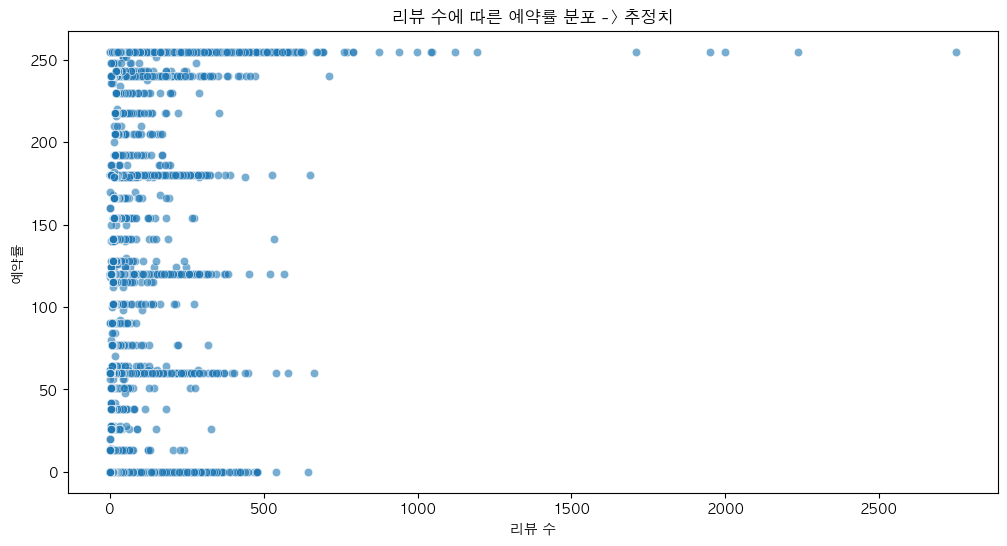

In [ ]:
# 리뷰 수가 예약률에 미치는 영향은?
# 산점도

sns.scatterplot(x='number_of_reviews', y='estimated_occupancy_l365d',data=df, alpha=0.6, marker='o')
plt.title("리뷰 수에 따른 예약률 분포 -> 추정치")
plt.xlabel("리뷰 수")
plt.ylabel("예약률")
plt.show()


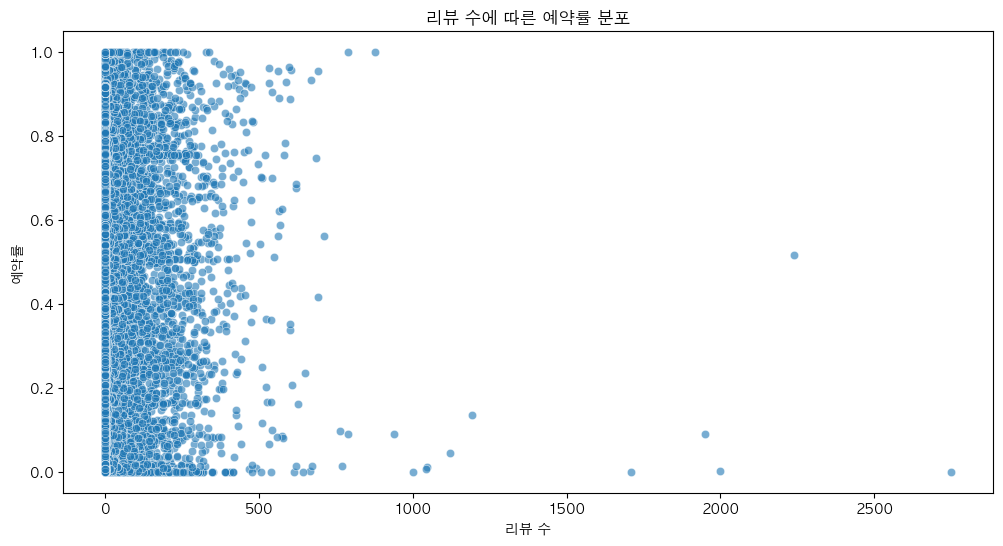

In [ ]:
sns.scatterplot(x='number_of_reviews', y='occupancy_rate',data=df, alpha=0.6, marker='o') 
plt.title("리뷰 수에 따른 예약률 분포") 
plt.xlabel("리뷰 수") 
plt.ylabel("예약률") 
plt.show()

1. 추정치 예약률 (작년 기준) : estimated_occupancy_l365d 
과거는 리뷰 수가 많은 숙소가 예약률이 높다.
2. 우리가 계산한 예약률 (현재 기준) : 'occupancy_rate'
아직 남은 일 수가 많아서 낮게 보임. 

➡️ 다를 수 밖에 없음. 
리뷰 수가 많은 숙소가 예약률이 높다.

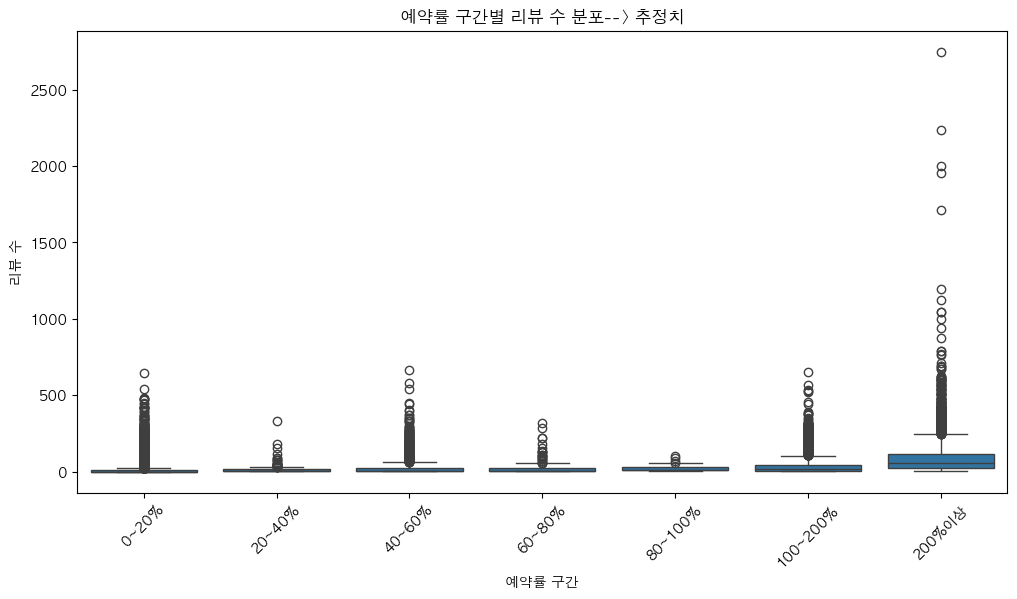

In [ ]:
# 예약률 구간별 리뷰 수 차이 [추정치 값임]
# 박스플롯
sns.boxplot(x='book_rate_bin', y='number_of_reviews', data=df)
plt.title("예약률 구간별 리뷰 수 분포--> 추정치")
plt.xlabel("예약률 구간")
plt.ylabel("리뷰 수")
plt.xticks(rotation=45) 
plt.show()

In [ ]:
# 예약률 구간 [우리가 계산한 !]
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0~20%', '20~40%', '40~60%', '60~80%', '80~100%']

df['occupancy_rate_bin'] = pd.cut(
    df['occupancy_rate'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

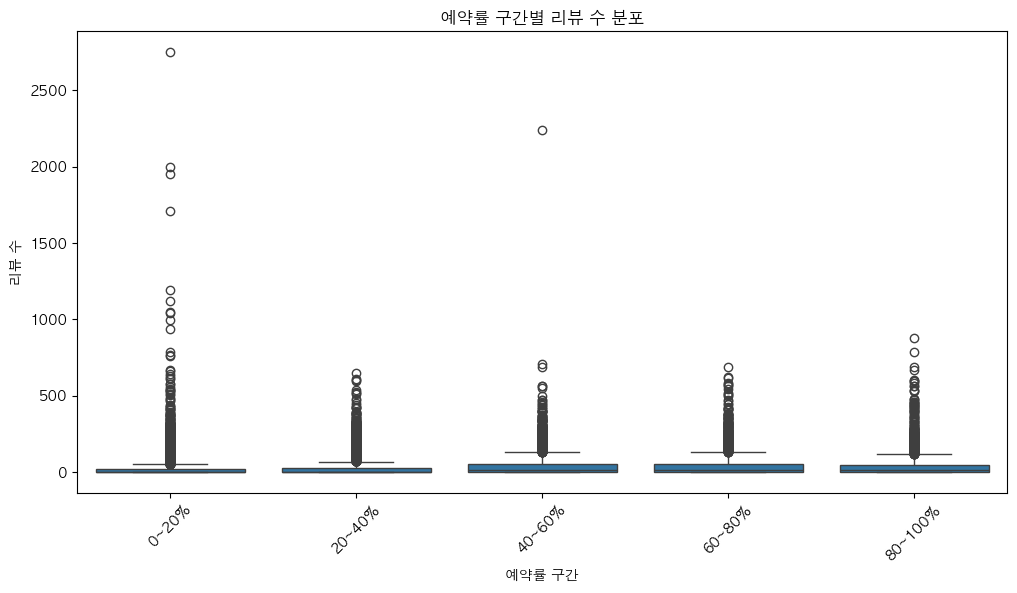

In [ ]:
# 예약률 구간별 리뷰 수 차이 
# 박스플롯
sns.boxplot(x='occupancy_rate_bin', y='number_of_reviews', data=df)
plt.title("예약률 구간별 리뷰 수 분포")
plt.xlabel("예약률 구간")
plt.ylabel("리뷰 수")
plt.xticks(rotation=45)
plt.show()

1.  추정치 예약률
예약률이 높을 수록 리뷰수는 많음.
리뷰가 신뢰 지표로 작용해서 시간이 지날수록 예약 전환율을 높이는 선순환 구조가 되지 않았을까 ? 라는 생각

2. 계산한 예약률
리뷰 수와 예약률이 큰 상관이 없음. 오히려 예약률이 적은게 리뷰수가 더 많다 ?
이러한 점을 봤을 때 3월 기준 예약되지 않은 숙소 중에서 리뷰가 많은 것들이 측정된 값이 아닌가 ? 라는 생각

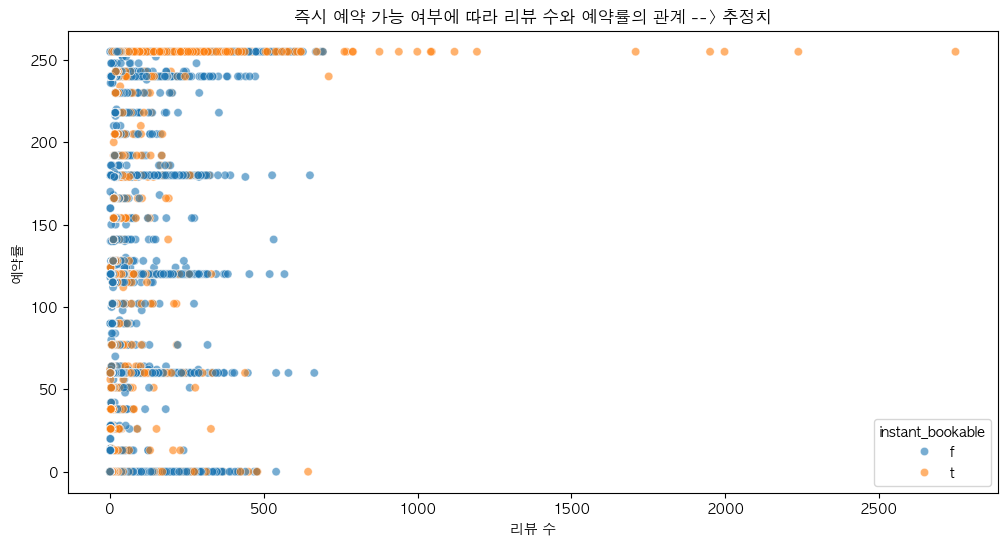

In [ ]:
# 즉시 예약 가능 여부에 따라 리뷰 수와 예약률의 관계가 어떻게 달라질까 ? [추정치]
# 산점도

sns.scatterplot(x='number_of_reviews', y='estimated_occupancy_l365d',data=df, alpha=0.6, marker='o', hue='instant_bookable')
plt.title("즉시 예약 가능 여부에 따라 리뷰 수와 예약률의 관계 --> 추정치")
plt.xlabel("리뷰 수")
plt.ylabel("예약률")
plt.show()


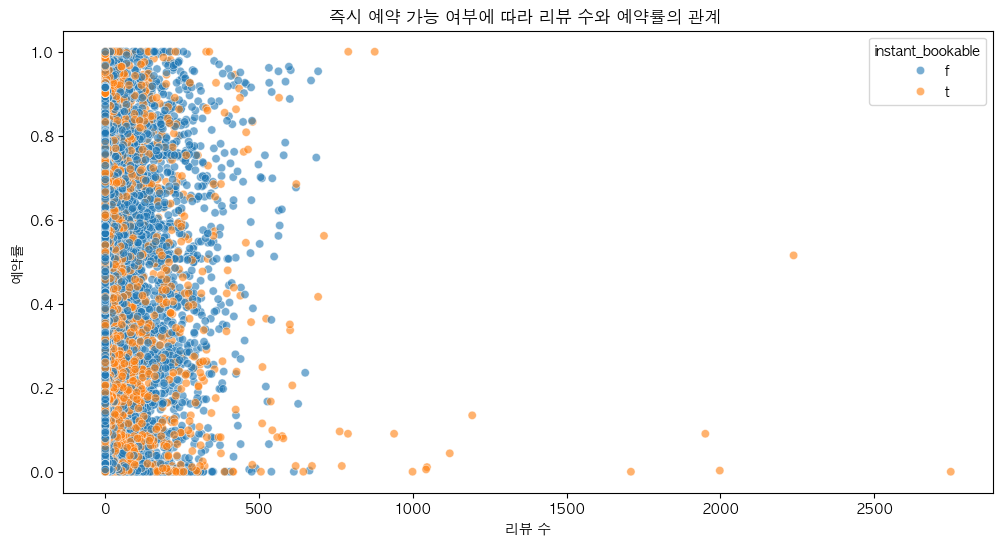

In [ ]:
# 즉시 예약 가능 여부에 따라 리뷰 수와 예약률의 관계가 어떻게 달라질까 ?
# 산점도

sns.scatterplot(x='number_of_reviews', y='occupancy_rate',data=df, alpha=0.6, marker='o', hue='instant_bookable')
plt.title("즉시 예약 가능 여부에 따라 리뷰 수와 예약률의 관계 ")
plt.xlabel("리뷰 수")
plt.ylabel("예약률")
plt.show()


1.  추정치 예약률
즉시 예약 여부에 따라서 예약률도 높고 리뷰 수도 많다. (아주 조금)
즉시예약 가능 숙소가 리뷰 수가 적더라도 예약률이 상대적으로 높은 경향이 있음.

2. 계산한 예약률
현재 예약률은 즉시예약 가능한 것과 큰 관계가 없어 보임

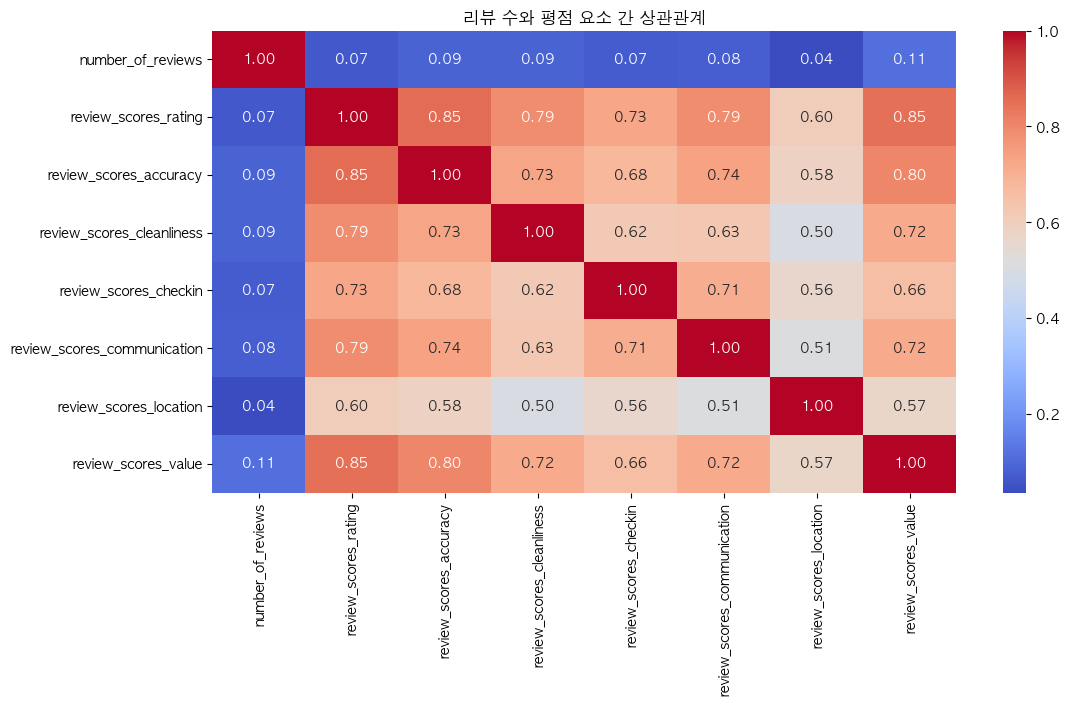

In [ ]:
# 어떤 평점 요소나 숙소특성이 리뷰 수에 영향을 주는가?
# 히트맵
# 
score_cols = [
    'number_of_reviews',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("리뷰 수와 평점 요소 간 상관관계")
plt.show()


1. 리뷰 수와 평점 항목은 거의다 상관관계가 없음
2. 평점 간에는 강한 상관관계를 보인다고 할 수 있음

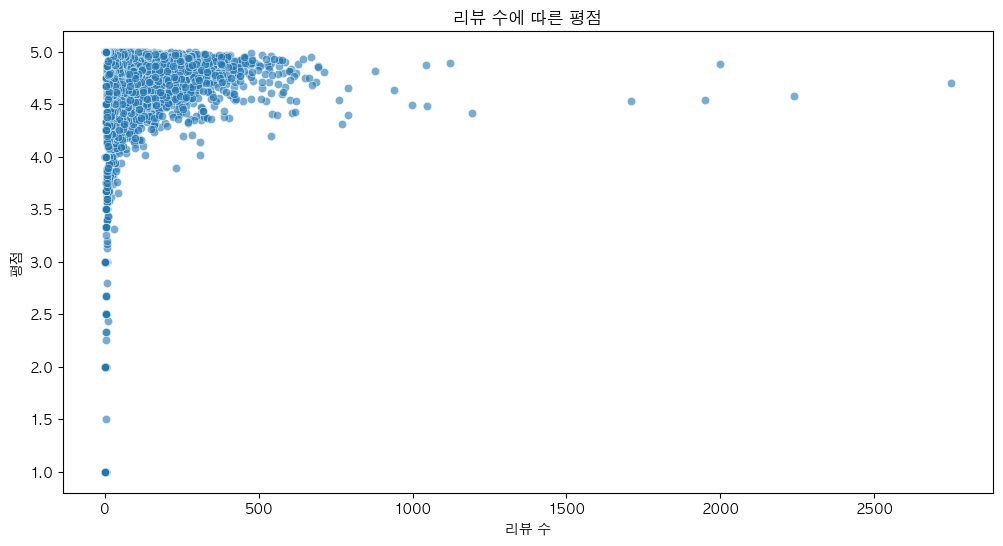

In [ ]:
# 리뷰 수가 많으면 평점도 높을까?
# 산점도 
sns.scatterplot(x='number_of_reviews', y='review_scores_rating',data=df, alpha=0.6, marker='o')
plt.title("리뷰 수에 따른 평점")
plt.xlabel("리뷰 수")
plt.ylabel("평점")
plt.show()

상관이 없는 듯 ?!
근데 리뷰 수가 많을 수록 4~5점으로 수렴되는걸 보아 리뷰 수는 숙소평점에 안정을 준다 ? (신뢰도로 파악 가능)

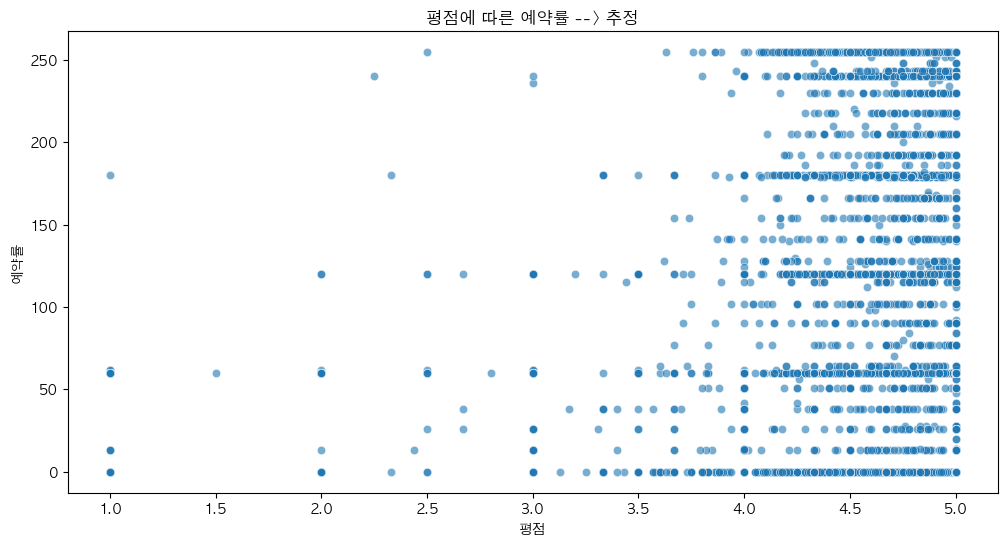

In [ ]:
# 평점에 따른 예약률 --> 추정
# 산점도

sns.scatterplot(x='review_scores_rating', y='estimated_occupancy_l365d',data=df, alpha=0.6, marker='o')
plt.title("평점에 따른 예약률 --> 추정")
plt.xlabel("평점")
plt.ylabel("예약률")
plt.show()

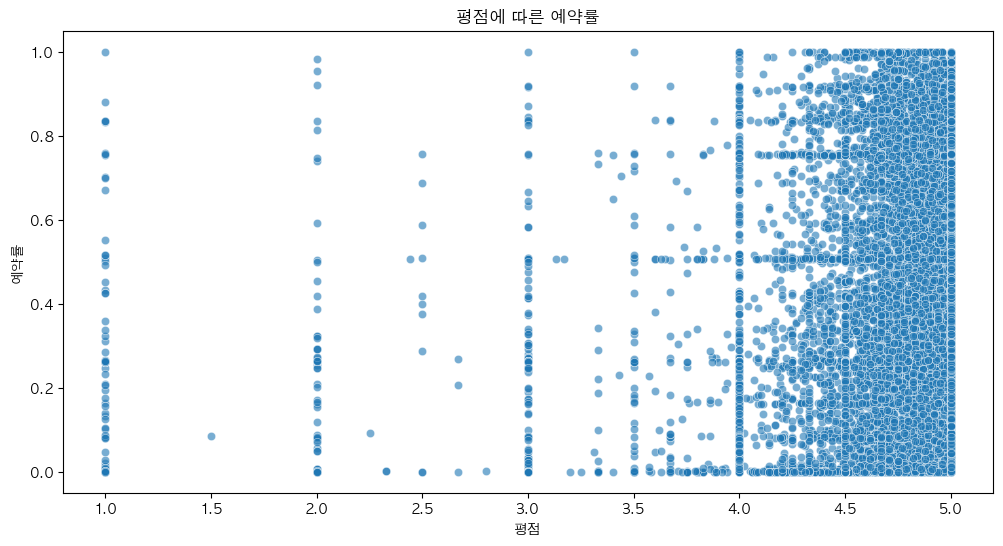

In [ ]:
# 평점에 따른 예약률 
# 산점도

sns.scatterplot(x='review_scores_rating', y='occupancy_rate',data=df, alpha=0.6, marker='o')
plt.title("평점에 따른 예약률")
plt.xlabel("평점")
plt.ylabel("예약률")
plt.show()

1. 예약률 --> 추정치
평점이 높은 숙소일수록 추정 예약률이 높게 나타나는 경향이 있긴함. 대부분의 숙소가 고평점이라 변별력은 약함

2. 우리가 계산한 예약률
평점이 높을수록 예약률이 높아지는 경향이 있음. 1,2,3 에 있는 점들은 뭔지 모르게씀 ..


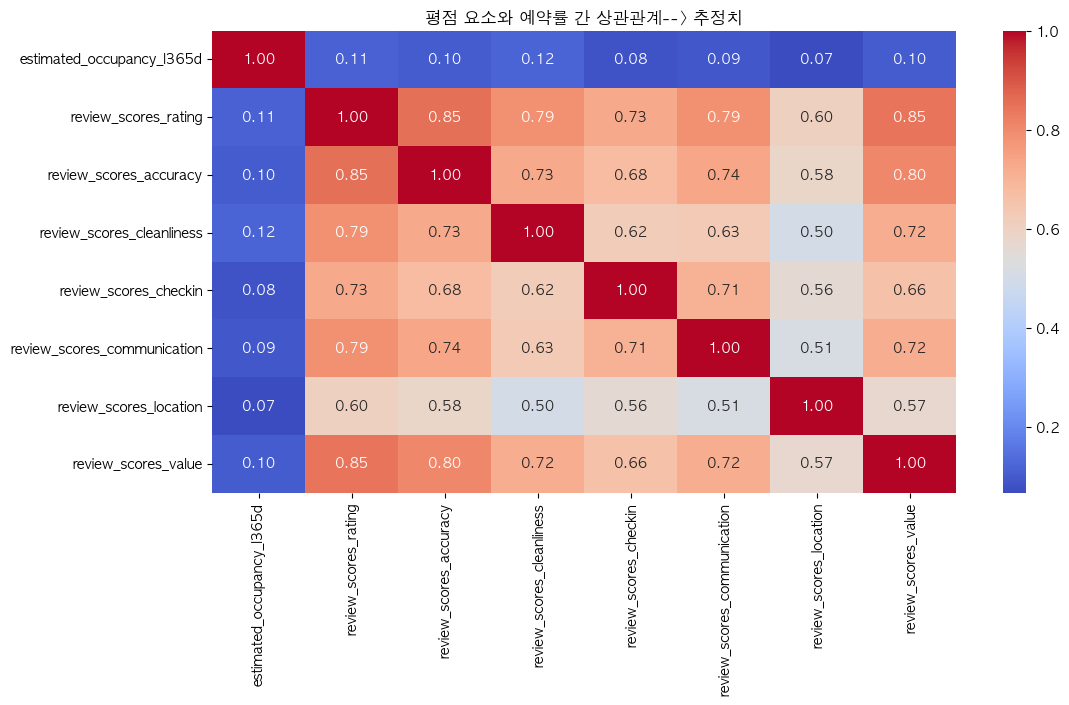

In [ ]:
# 어떤 평점 요소가 예약률에 얼마나 영향을 미칠까 ? --> 추정치
# 히트맵
score_cols = [
    'estimated_occupancy_l365d',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("평점 요소와 예약률 간 상관관계--> 추정치")
plt.show()

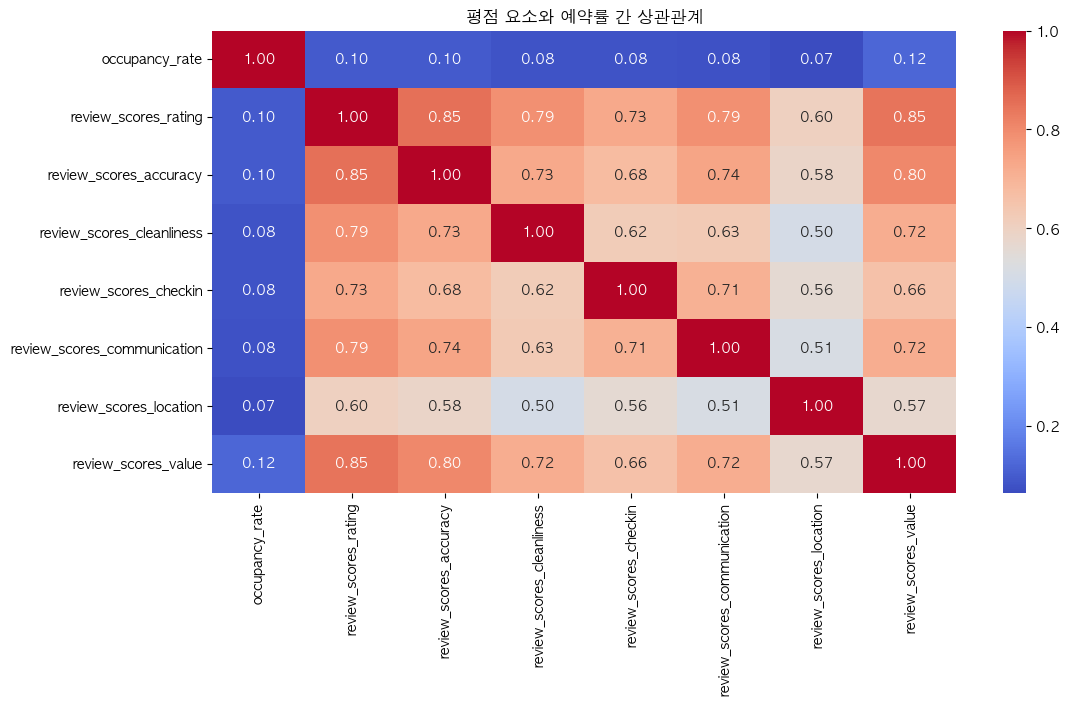

In [ ]:
# 어떤 평점 요소가 예약률에 얼마나 영향을 미칠까 ? 
# 히트맵
score_cols = [
    'occupancy_rate',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("평점 요소와 예약률 간 상관관계")
plt.show()

평점 요소와 예약률 간에 큰 상관관계가 없음

In [ ]:
df['review_flag'].unique().dtype

dtype('int64')

In [ ]:
df['review_flag'].isna().sum()

np.int64(0)

In [ ]:
(df['number_of_reviews'] == 0).sum()

np.int64(6792)

In [ ]:
df['review_flag'].value_counts(dropna=False)


review_flag
1    15482
0     6792
Name: count, dtype: int64

In [ ]:
df[['review_flag', 'estimated_occupancy_l365d']].isna().sum()

review_flag                  0
estimated_occupancy_l365d    0
dtype: int64

In [ ]:
df.groupby('review_flag')['estimated_occupancy_l365d'].mean()


review_flag
0      0.000000
1    102.939801
Name: estimated_occupancy_l365d, dtype: float64

In [ ]:
df[df['review_flag'] == 0]['estimated_occupancy_l365d'].head(10)


30     0
58     0
106    0
109    0
188    0
189    0
208    0
327    0
342    0
445    0
Name: estimated_occupancy_l365d, dtype: int64

In [ ]:
df[df['review_flag'] == 1]['estimated_occupancy_l365d'].head(10)


0      0
1      0
2      0
3    255
4    154
5    180
6      0
7    255
8    255
9     60
Name: estimated_occupancy_l365d, dtype: int64

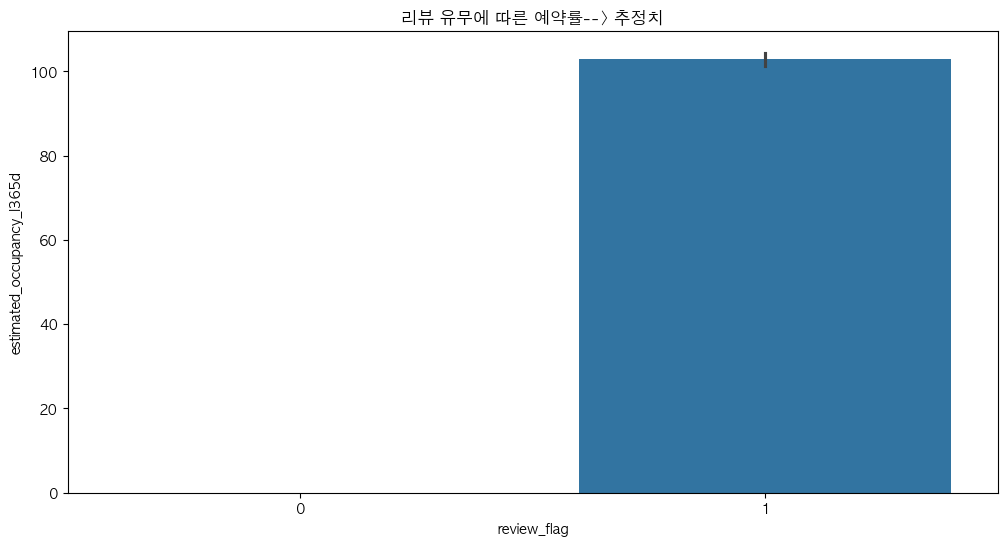

In [ ]:
# 리뷰가 있는 숙소와 없는 숙소의 예약률이 다를까?
# 막대 그래프

sns.barplot(x='review_flag', y= 'estimated_occupancy_l365d', data=df)
plt.title("리뷰 유무에 따른 예약률--> 추정치")
plt.show()

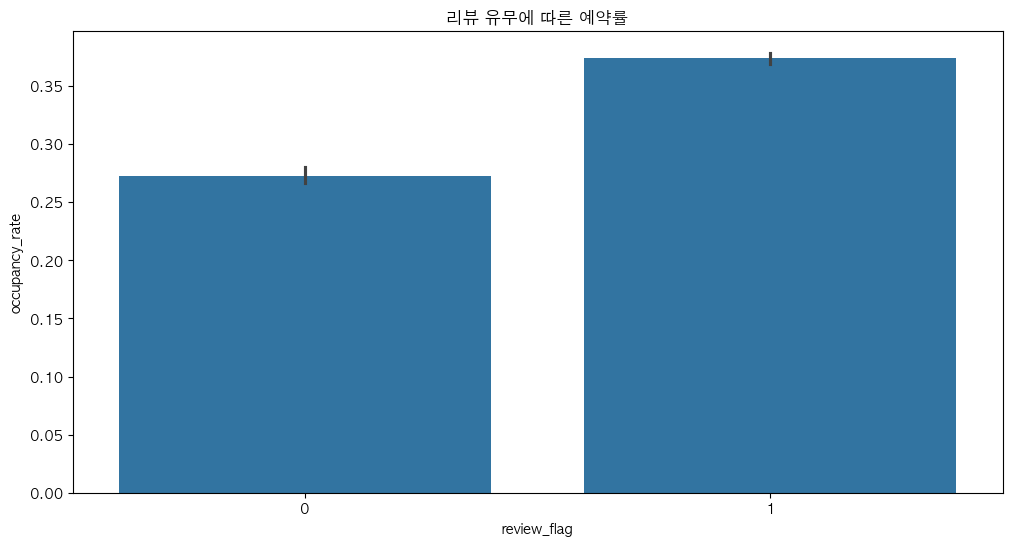

In [ ]:
# 리뷰가 있는 숙소와 없는 숙소의 예약률이 다를까?
# 막대 그래프

sns.barplot(x='review_flag', y= 'occupancy_rate', data=df)
plt.title("리뷰 유무에 따른 예약률")
plt.show()

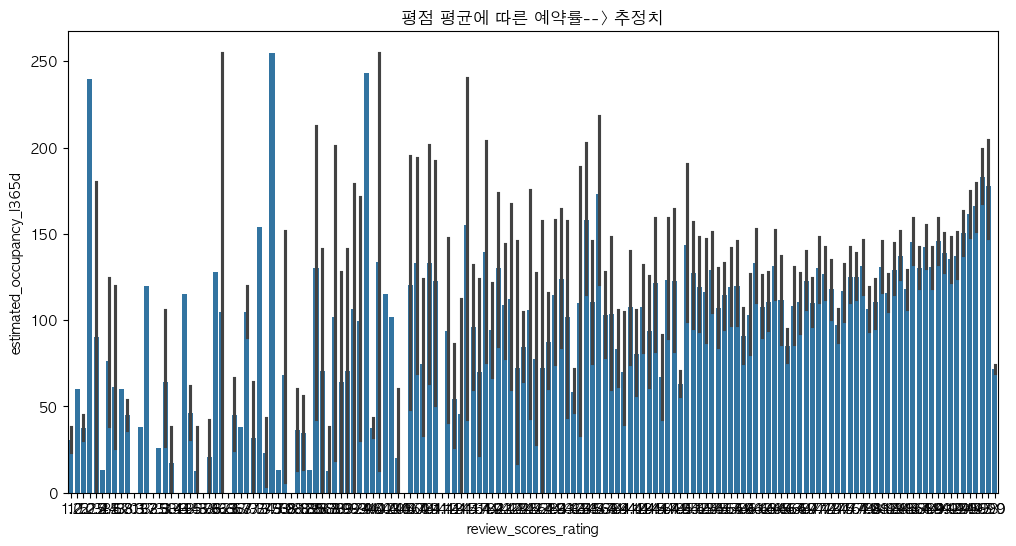

In [ ]:
# 평점평균 별 예약률 차이?
# 막대 그래프

sns.barplot(x='review_scores_rating', y= 'estimated_occupancy_l365d', data=df)
plt.title("평점 평균에 따른 예약률--> 추정치")
plt.show()

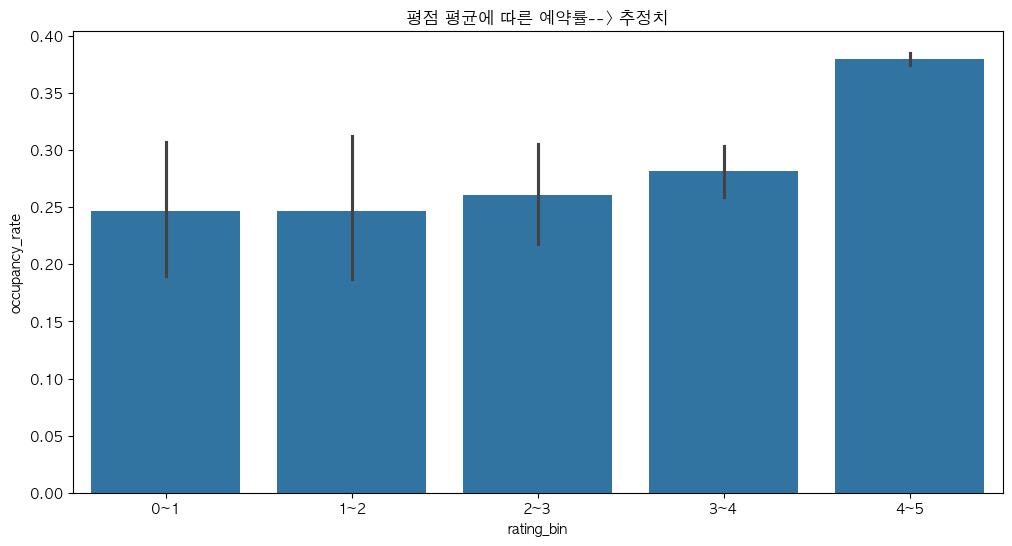

In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0~1', '1~2', '2~3', '3~4', '4~5']
df['rating_bin'] = pd.cut(df['review_scores_rating'], bins=bins, labels=labels, include_lowest=True)

sns.barplot(x='rating_bin', y= 'occupancy_rate', data=df)
plt.title("평점 평균에 따른 예약률--> 추정치")
plt.show()

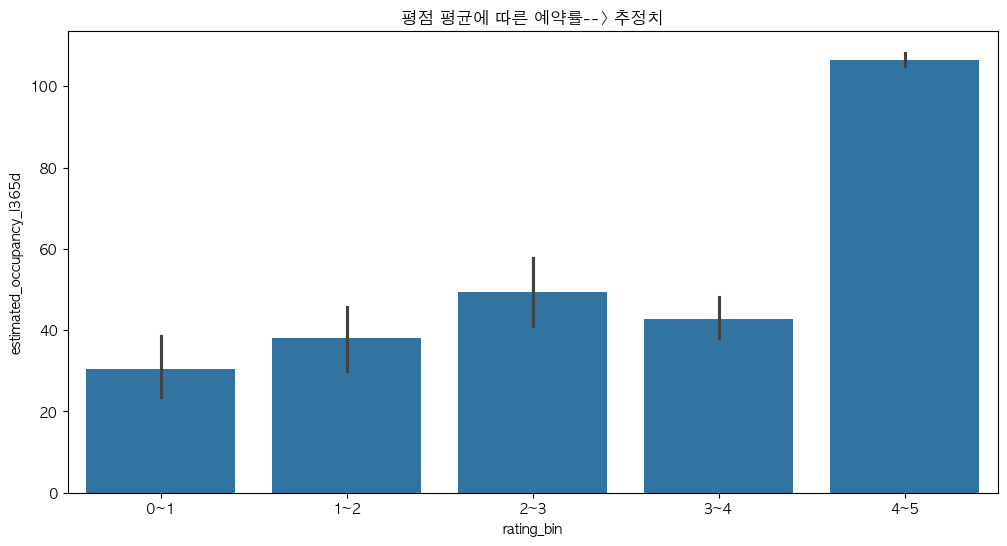

In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0~1', '1~2', '2~3', '3~4', '4~5']
df['rating_bin'] = pd.cut(df['review_scores_rating'], bins=bins, labels=labels, include_lowest=True)

sns.barplot(x='rating_bin', y= 'estimated_occupancy_l365d', data=df)
plt.title("평점 평균에 따른 예약률--> 추정치")
plt.show()

# 리뷰 수 는 예약률에 큰 상관이 있는데 평점은 큰 상관이 없음

그러면 어떤 요소를 만족해야 리뷰 수가 늘어날까 ?

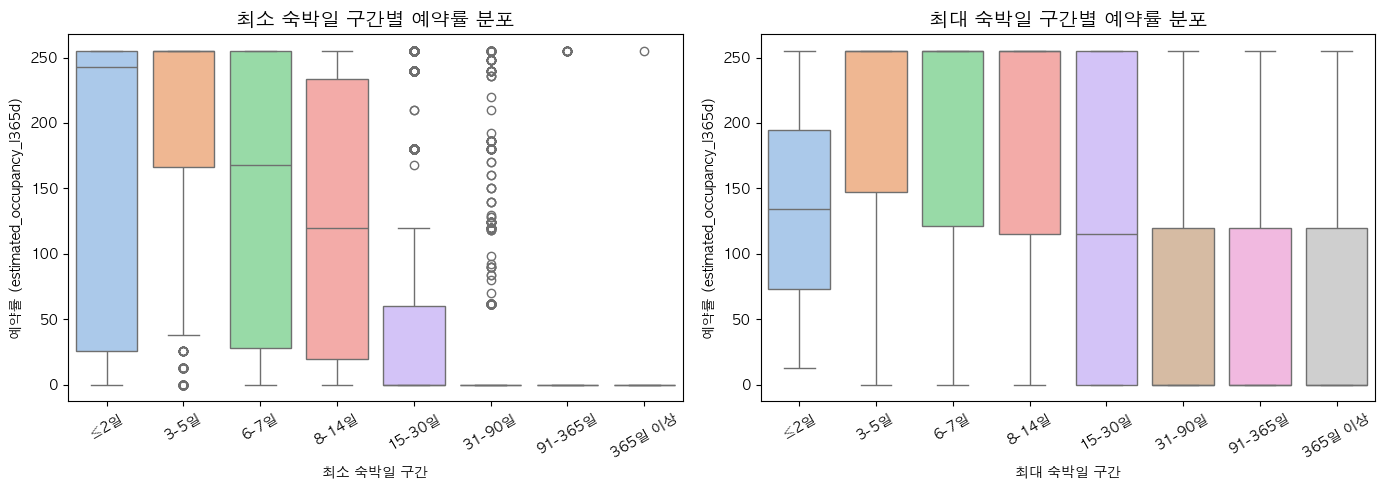

In [ ]:
# 구간 나누기_최소 숙박일
bins = [0, 2, 5, 7, 14, 30, 90, 365, df['minimum_nights'].max()]
labels = ['≤2일', '3-5일', '6-7일', '8-14일', '15-30일', '31-90일', '91-365일', '365일 이상']
df['min_night_bin'] = pd.cut(df['minimum_nights'], bins=bins, labels=labels, include_lowest=True)
# 구간 나누기_최대 숙박일
bins = [0, 2, 5, 7, 14, 30, 90, 365, df['maximum_nights'].max()]
labels = ['≤2일', '3-5일', '6-7일', '8-14일', '15-30일', '31-90일', '91-365일', '365일 이상']
df['max_night_bin'] = pd.cut(df['maximum_nights'], bins=bins, labels=labels, include_lowest=True)

fig, axes = plt.subplots(1, 2, figsize = (14,5))

sns.boxplot(x='min_night_bin', y='estimated_occupancy_l365d', data=df, palette='pastel',ax=axes[0])
axes[0].set_title('최소 숙박일 구간별 예약률 분포', fontsize=14)
axes[0].set_xlabel('최소 숙박일 구간')
axes[0].set_ylabel('예약률 (estimated_occupancy_l365d)')
axes[0].tick_params(axis='x',rotation=30)

sns.boxplot(x='max_night_bin', y='estimated_occupancy_l365d', data=df, palette='pastel',ax=axes[1])
axes[1].set_title('최대 숙박일 구간별 예약률 분포', fontsize=14)
axes[1].set_xlabel('최대 숙박일 구간')
axes[1].set_ylabel('예약률 (estimated_occupancy_l365d)')
axes[1].tick_params(axis='x',rotation=30)

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중회귀에 쓴 변수들
X = df[["maximum_nights", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_ly","number_of_reviews_l30d"]]

# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df["variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

                 variable         VIF
0                   const    2.607488
1          maximum_nights    1.008402
2       number_of_reviews    1.605750
3   number_of_reviews_ltm  108.698999
4    number_of_reviews_ly   93.978373
5  number_of_reviews_l30d    4.188522


In [ ]:
df = pd.read_csv("filtered_airbnb_4.csv")
df

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,review_flag,host_response_rate_num,host_response_rate_group,host_acceptance_rate_num,host_acceptance_rate_group,occupancy_rate,listing_group,verification_count,license_status
0,36121,2009-12-11,no response,0%,0%,f,3.0,"['email', 'phone', 'work_email']",t,t,Prospect Heights,Brooklyn,40.673760,-73.966110,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",$200.00,90,365,t,362,9,0,0,0,0,4.88,5.00,4.80,5.00,5.00,5.00,5.00,no license,f,0.05,1,0,~10%,0,매우 낮음 (50% 미만),0.008219,2-5개,3,license 미보유
1,36647,2010-07-04,no response,0%,100%,f,1.0,"['email', 'phone']",t,t,East Harlem,Manhattan,40.792454,-73.940742,Private room in condo,Private room,2,1.0,1 private bath,1.0,1.0,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",$82.00,30,999,t,204,102,0,0,0,0,4.77,4.82,4.76,4.88,4.90,4.38,4.71,no license,f,0.58,1,0,~10%,100,높음 (90% 이상),0.441096,1개,2,license 미보유
2,38663,2010-07-13,within a few hours,100%,40%,f,3.0,"['email', 'phone', 'work_email']",t,t,Boerum Hill,Brooklyn,40.684420,-73.980680,Private room in home,Private room,2,2.5,2.5 baths,5.0,5.0,"[""Portable fans"", ""Oven"", ""Baking sheet"", ""Fir...",$765.00,3,60,t,326,43,0,0,0,0,4.70,4.83,4.52,4.88,4.88,4.86,4.62,OSE-STRREG-0001784,f,0.28,1,100,~100%,40,매우 낮음 (50% 미만),0.106849,2-5개,3,license 보유
3,38833,2010-07-14,within an hour,100%,97%,t,1.0,"['email', 'phone']",t,t,Harlem,Manhattan,40.818058,-73.946671,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Clothing storage: close...",$139.00,2,45,t,25,241,42,3,43,255,4.85,4.87,4.50,4.96,4.96,4.79,4.82,OSE-STRREG-0000476,f,1.36,1,100,~100%,97,높음 (90% 이상),0.931507,1개,2,license 보유
4,39282,2010-07-16,within an hour,100%,100%,t,2.0,"['email', 'phone']",t,t,Williamsburg,Brooklyn,40.710651,-73.950874,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Oven"", ""Rice maker"", ""Laundromat nearby"", ""L...",$130.00,4,45,t,38,274,12,0,12,154,4.82,4.83,4.61,4.94,4.88,4.85,4.78,OSE-STRREG-0001150,f,1.54,1,100,~100%,100,높음 (90% 이상),0.895890,2-5개,2,license 보유
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22269,1366333532374850165,2015-07-30,no response,0%,0%,f,2.0,"['email', 'phone']",t,t,Harlem,Manhattan,40.813794,-73.952399,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Air conditioning"", ""Carbon monoxide alarm"", ...",$72.00,30,365,t,358,0,0,0,0,0,4.85,4.88,4.83,4.94,4.94,4.82,4.75,no license,f,0.50,0,0,~10%,0,매우 낮음 (50% 미만),0.019178,2-5개,2,license 미보유
22270,1366717321390111215,2022-10-10,within an hour,100%,80%,t,33.0,"['email', 'phone']",t,t,Bedford-Stuyvesant,Brooklyn,40.685500,-73.919510,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,0.0,"[""Air conditioning"", ""Carbon monoxide alarm"", ...",$58.00,30,365,t,363,0,0,0,0,0,4.85,4.88,4.83,4.94,4.94,4.82,4.75,no license,f,0.50,0,100,~100%,80,중간 (70~89%),0.005479,21개 이상 (전문가/기업),2,license 미보유
22271,1366721904709517353,2015-03-30,within an hour,94%,99%,f,1974.0,"['email', 'phone', 'work_email']",t,t,Kips Bay,Manhattan,40.745290,-73.979380,Entire rental unit,E

In [ ]:
df.isnull().sum()

id                              0
host_since                      0
host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_total_listings_count       0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bathrooms_text                  0
bedrooms                        0
beds                            0
amenities                       0
price                           0
minimum_nights                  0
maximum_nights                  0
has_availability                0
availability_365                0
number_of_reviews               0
number_of_reviews_ltm           0
number_of_revi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22274 entries, 0 to 22273
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22274 non-null  int64  
 1   host_since                    22274 non-null  object 
 2   host_response_time            22274 non-null  object 
 3   host_response_rate            22274 non-null  object 
 4   host_acceptance_rate          22274 non-null  object 
 5   host_is_superhost             22274 non-null  object 
 6   host_total_listings_count     22274 non-null  float64
 7   host_verifications            22274 non-null  object 
 8   host_has_profile_pic          22274 non-null  object 
 9   host_identity_verified        22274 non-null  object 
 10  neighbourhood_cleansed        22274 non-null  object 
 11  neighbourhood_group_cleansed  22274 non-null  object 
 12  latitude                      22274 non-null  float64
 13  l

In [ ]:
cols = [
    'host_since','host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_verifications', 
    'host_has_profile_pic', 'host_identity_verified', 'license', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text',
    'amenities', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', 'instant_bookable', 'number_of_reviews', 'review_scores_accuracy', 
    'review_scores_communication','review_scores_value', 'review_scores_rating'
    ]

df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22274 entries, 0 to 22273
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_since                    22274 non-null  object 
 1   host_response_time            22274 non-null  object 
 2   host_response_rate            22274 non-null  object 
 3   host_acceptance_rate          22274 non-null  object 
 4   host_is_superhost             22274 non-null  object 
 5   host_total_listings_count     22274 non-null  float64
 6   host_verifications            22274 non-null  object 
 7   host_has_profile_pic          22274 non-null  object 
 8   host_identity_verified        22274 non-null  object 
 9   license                       22274 non-null  object 
 10  neighbourhood_group_cleansed  22274 non-null  object 
 11  property_type                 22274 non-null  object 
 12  room_type                     22274 non-null  object 
 13  a

# 인코딩

In [ ]:
# 호스트가 얼마나 오래되었는지 중요하기에 날짜 차이 계산 ? 
# → 2025.03 - host_since
df['host_since'].unique()

array(['2009-12-11', '2010-07-04', '2010-07-13', ..., '2025-02-27',
       '2025-02-23', '2024-03-16'], shape=(4566,), dtype=object)

In [ ]:
# host_since --> 호스트가 얼마나 오래됐는지 날짜 차이 계산
# datetime 타입 변경
df['host_since'] = pd.to_datetime(df['host_since'])

# host_day 컬럼: 일자 수 
df['host_day'] = (pd.Timestamp('2025-03-02') - df['host_since']).dt.days

df['host_day']

0        5560
1        5355
2        5346
3        5345
4        5343
         ... 
22269    3503
22270     874
22271    3625
22272    1356
22273     874
Name: host_day, Length: 22274, dtype: int64

In [ ]:
# host_response_rate 수치형으로 변환

df['host_response_rate'] = (df['host_response_rate'].astype(str).str.replace('%', '').astype(float) / 100)

In [ ]:
# host_acceptance_rate 수치형으로 변환

df['host_acceptance_rate'] = (df['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float) / 100)

In [ ]:
# price 수치형으로 변환

df['price'] = (df['price'].astype(str).str.replace('$', '')
               .str.replace(',','').astype(float))

In [ ]:
# 어메니티 개수 컬럼 amenity_count 추가

df['amenity_count'] = df['amenities'].apply(len)

In [ ]:
# host_is_superhost 이진 라벨링
df['host_is_superhost'] = df['host_is_superhost'].map({'f':0, 't':1})

df['host_is_superhost'] = df['host_is_superhost'].astype(int)


In [ ]:
# host_has_profile_pic 이진 라벨링
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'f':0, 't':1})

df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(int)


In [ ]:
# host_identity_verified 이진 라벨링
df['host_identity_verified'] = df['host_identity_verified'].map({'f':0, 't':1})

df['host_identity_verified'] = df['host_identity_verified'].astype(int)


In [ ]:
# has_availability 이진 라벨링
df['has_availability'] = df['has_availability'].map({'f':0, 't':1})

df['has_availability'] = df['has_availability'].astype(int)


In [ ]:
# instant_bookable 이진 라벨링
df['instant_bookable'] = df['instant_bookable'].map({'f':0, 't':1})

df['instant_bookable'] = df['instant_bookable'].astype(int)


In [ ]:
vif_cols = [
    'host_day', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'price',
    'number_of_reviews', 'minimum_nights', 'maximum_nights', 'review_scores_accuracy', 'review_scores_communication',
    'review_scores_value', 'review_scores_rating', 'accommodates', 'amenity_count','host_is_superhost', 'host_has_profile_pic',
    'host_identity_verified', 'has_availability','instant_bookable'
]

df[vif_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22274 entries, 0 to 22273
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_day                     22274 non-null  int64  
 1   host_response_rate           22274 non-null  float64
 2   host_acceptance_rate         22274 non-null  float64
 3   host_total_listings_count    22274 non-null  float64
 4   price                        22274 non-null  float64
 5   number_of_reviews            22274 non-null  int64  
 6   minimum_nights               22274 non-null  int64  
 7   maximum_nights               22274 non-null  int64  
 8   review_scores_accuracy       22274 non-null  float64
 9   review_scores_communication  22274 non-null  float64
 10  review_scores_value          22274 non-null  float64
 11  review_scores_rating         22274 non-null  float64
 12  accommodates                 22274 non-null  int64  
 13  amenity_count   

In [ ]:
# 다중회귀에 쓴 변수들
X = df[['host_day', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'price',
    'number_of_reviews', 'minimum_nights', 'maximum_nights', 'review_scores_accuracy', 'review_scores_communication',
    'review_scores_value', 'review_scores_rating', 'accommodates', 'amenity_count','host_is_superhost', 'host_has_profile_pic',
    'host_identity_verified', 'has_availability','instant_bookable']]

# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df["variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

                       variable         VIF
0                         const  346.855740
1                      host_day    1.147569
2            host_response_rate    1.947967
3          host_acceptance_rate    2.117250
4     host_total_listings_count    1.450823
5                         price    1.129859
6             number_of_reviews    1.122232
7                minimum_nights    1.054750
8                maximum_nights    1.178735
9        review_scores_accuracy    4.261303
10  review_scores_communication    2.835913
11          review_scores_value    4.040596
12         review_scores_rating    5.943987
13                 accommodates    1.134892
14                amenity_count    1.153743
15            host_is_superhost    1.364978
16         host_has_profile_pic    1.090005
17       host_identity_verified    1.025230
18             has_availability    1.045513
19             instant_bookable    1.316369


In [ ]:
X = df[['host_day', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'price',
    'number_of_reviews', 'minimum_nights', 'maximum_nights', 'review_scores_accuracy', 'review_scores_communication',
    'review_scores_value', 'accommodates', 'amenity_count','host_is_superhost', 'host_has_profile_pic',
    'host_identity_verified', 'has_availability','instant_bookable']]

y = df['occupancy_rate']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         occupancy_rate   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     79.99
Date:                Sun, 19 Oct 2025   Prob (F-statistic):          1.17e-285
Time:                        11:30:01   Log-Likelihood:                -4629.3
No. Observations:               22274   AIC:                             9297.
Df Residuals:                   22255   BIC:                             9449.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

building_type_label, neighbourhood_

In [ ]:
X = df[['host_day', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'price',
    'number_of_reviews', 'minimum_nights', 'maximum_nights', 'review_scores_accuracy', 'review_scores_communication',
    'review_scores_value', 'accommodates', 'amenity_count','host_is_superhost', 'host_has_profile_pic',
    'host_identity_verified', 'has_availability','instant_bookable']]

y = df['occupancy_rate']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         occupancy_rate   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     79.99
Date:                Sun, 19 Oct 2025   Prob (F-statistic):          1.17e-285
Time:                        11:30:01   Log-Likelihood:                -4629.3
No. Observations:               22274   AIC:                             9297.
Df Residuals:                   22255   BIC:                             9449.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

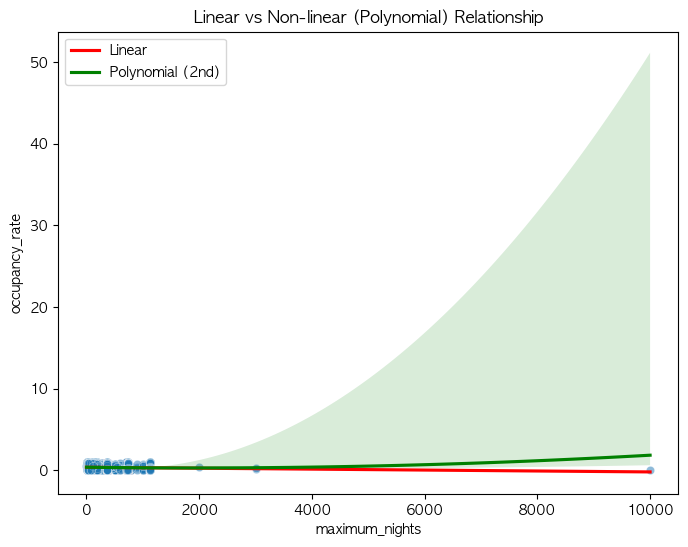

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="maximum_nights", y="occupancy_rate", data=df, alpha=0.5)

# 선형 회귀선
sns.regplot(x="maximum_nights", y="occupancy_rate", data=df, scatter=False, color="red", label="Linear")

# 2차 다항 회귀선
sns.regplot(x="maximum_nights", y="occupancy_rate", data=df, scatter=False, order=2, color="green", label="Polynomial (2nd)")

plt.legend()
plt.title("Linear vs Non-linear (Polynomial) Relationship")
plt.show()

In [ ]:
from scipy.stats import pearsonr

r, pval = pearsonr(df["instant_bookable"], df["occupancy_rate"])
print(f"Pearson correlation: r = {r:.3f}, p-value = {pval:.5f}")

Pearson correlation: r = -0.031, p-value = 0.00000


In [ ]:
#스피어만을 보면 비선형 상관계수를 보고  ---> 얘는 직선이 아닐때도 봄. 
from scipy.stats import spearmanr # 단조 관계에 잘 맞음 (X가 증가하면 Y도 증가하거나 감소하는데 속도가 일정할 필요는 X)
# 꼭 직선일 필요는 없음. 직선이 아닐때 스피어만이 더 잘 잡음. 

rho, pval = spearmanr(df["instant_bookable"], df["occupancy_rate"])
print(f"Spearman correlation: {rho:.3f}, p-value: {pval:.5f}")

Spearman correlation: -0.019, p-value: 0.00467


In [ ]:
df["neighbourhood_group_cleansed"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
df.groupby("neighbourhood_group_cleansed")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
Bronx,911.0,121.792536,338.627478,23.0,63.0,90.0,127.0,9894.0
Brooklyn,7442.0,169.593389,249.118728,10.0,75.0,124.0,199.0,8403.0
Manhattan,10194.0,286.534432,572.333459,7.0,115.0,189.0,326.0,20000.0
Queens,3414.0,126.240773,135.425496,14.0,63.0,96.0,150.0,4320.0
Staten Island,313.0,128.789137,136.190808,33.0,70.0,100.0,140.0,1400.0


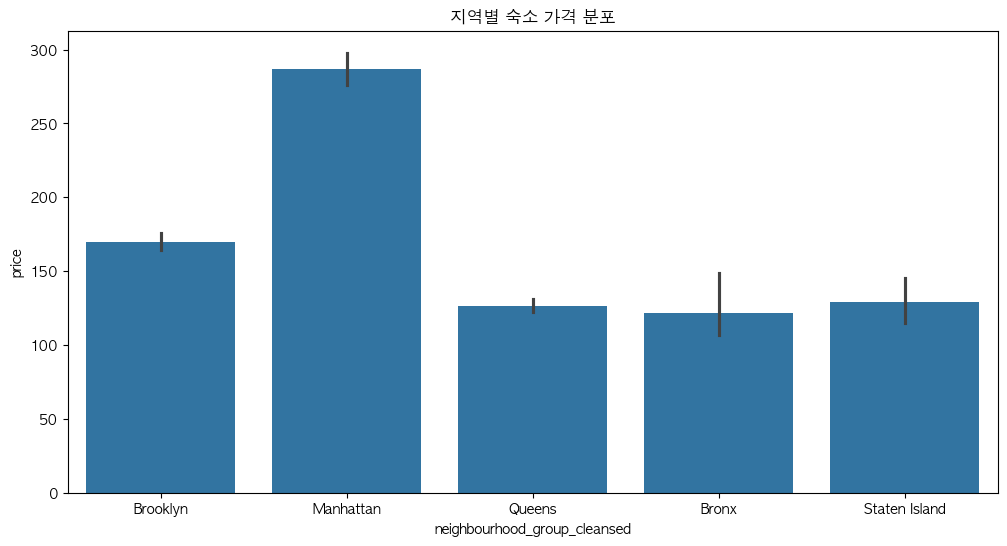

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='neighbourhood_group_cleansed', y='price', data=df)
plt.title('지역별 숙소 가격 분포')
plt.show()


# 통계 검정

종속변수: “예약률” → 수치형
- 슈퍼호스트여부
    - H0: 슈퍼호스트 여부에 따라 예약률의 차이가 없다.
    - H1: 슈퍼호스트의 예약률이 일반 호스트보다 높다.
    - 슈퍼호스트: 범주형
    - ⇒ t-test

    독립표본 t-test	두 독립 그룹 비교 => ttest_ind()

In [ ]:

# 데이터 처리 및 분석
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind, chi2_contingency, f_oneway
from scipy.stats import mannwhitneyu, fisher_exact, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pingouin as pg
import scikit_posthocs as sp

# 출력 설정
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 시드 설정
np.random.seed(42)

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


In [ ]:
# 정규성 검정 함수
def check_normality_simple(data, name="데이터"):
    """
    데이터의 정규성을 검정하는 함수
    
    Parameters
    ----------
    data : array-like
        정규성을 검정할 데이터 (NaN은 자동 제거)
    name : str, default="데이터"
        출력 시 표시될 데이터 이름
    
    Returns
    -------
    bool
        정규분포 가정 충족 여부
    """
    # NaN 제거
    if pd.isna(data).any():
        print(f"⚠️ 경고: {name}에 NaN 값이 {pd.isna(data).sum()}개 포함됨")
        data = data.dropna()
        print(f"   → NaN 제거 후 n={len(data)}")
    
    n = len(data)
    
    print(f"\n[{name} 정규성 검정] n={n}")
    print("-"*40)
    
    # 왜도와 첨도
    skew = stats.skew(data)
    kurt = stats.kurtosis(data, fisher=True)
    print(f"왜도(Skewness): {skew:.3f}")
    print(f"첨도(Kurtosis): {kurt:.3f}")
    
    # 표본 크기에 따른 판단
    if n < 30:
        # 작은 표본: Shapiro-Wilk 필수
        stat, p = shapiro(data)
        print(f"Shapiro-Wilk p-value: {p:.4f}")
        is_normal = p > 0.05
        reason = f"Shapiro p={'>' if is_normal else '≤'}0.05"
    elif n < 100:
        # 중간 표본: 왜도/첨도 먼저, 불충족 시 Shapiro-Wilk
        if abs(skew) < 1 and abs(kurt) < 2:
            is_normal = True
            reason = "|왜도|<1, |첨도|<2"
        else:
            print(f"   → 왜도/첨도 기준 미충족, Shapiro-Wilk 추가 검정")
            stat, p = shapiro(data)
            print(f"추가 Shapiro-Wilk p-value: {p:.4f}")
            is_normal = p > 0.05
            reason = f"Shapiro p={'>' if is_normal else '≤'}0.05"
    else:
        is_normal = abs(skew) < 2
        reason = f"|왜도|{'<' if is_normal else '≥'}2 (중심극한정리)"
    
    print(f"결과: {'✅ 정규분포 가정 충족' if is_normal else '❌ 정규분포 가정 위반'} ({reason})")
    return is_normal


# Cramér's V 계산
def cramers_v(chi2_stat, n, r, c):
    """Cramér's V 효과 크기 계산"""
    return np.sqrt(chi2_stat / (n * min(r-1, c-1)))


def interpret_cramers_v(v):
    """Cramér's V 값 해석"""
    if v < 0.1:
        return "매우 약한 관계"
    elif v < 0.3:
        return "약한 관계"
    elif v < 0.5:
        return "중간 관계"
    else:
        return "강한 관계"


# 에타제곱 계산
def calculate_eta_squared(f_statistic, df_between, df_within):
    """에타제곱 (효과 크기) 계산"""
    eta_squared = (f_statistic * df_between) / (f_statistic * df_between + df_within)
    
    if eta_squared < 0.01:
        interpretation = "매우 작은 효과"
    elif eta_squared < 0.06:
        interpretation = "작은 효과"
    elif eta_squared < 0.14:
        interpretation = "중간 효과"
    else:
        interpretation = "큰 효과"
    
    return eta_squared, interpretation

In [ ]:
# 데이터 준비
n_superhost = df[df['host_is_superhost'] == 0]['occupancy_rate']
superhost = df[df['host_is_superhost'] == 1]['occupancy_rate']

In [ ]:
is_normal_0 = check_normality_simple(n_superhost, "슈퍼호스트가 아닌 예약률")
is_normal_1 = check_normality_simple(superhost, "슈퍼호스트의 예약률")


[슈퍼호스트가 아닌 예약률 정규성 검정] n=16147
----------------------------------------
왜도(Skewness): 0.590
첨도(Kurtosis): -0.991
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[슈퍼호스트의 예약률 정규성 검정] n=6127
----------------------------------------
왜도(Skewness): 0.261
첨도(Kurtosis): -1.167
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


In [ ]:
# Step 2: 등분산성 검정
print("\n[등분산성 검정]")
print("-"*40)
stat, p_levene = levene(n_superhost, superhost)
print(f"Levene's test p-value: {p_levene:.4f}")
equal_var = p_levene > 0.05
print(f"결과: {'✅ 등분산 가정 충족' if equal_var else '❌ 이분산 → Welch t-test 사용'}")


[등분산성 검정]
----------------------------------------
Levene's test p-value: 0.1582
결과: ✅ 등분산 가정 충족


In [ ]:
if is_normal_0 and is_normal_1:
    # 모수 검정: 독립표본 t-검정 (두 그룹 모두 정규분포)
    t_stat, p_value = ttest_ind(n_superhost, superhost, equal_var=equal_var)
    test_name = "Student's t-test" if equal_var else "Welch's t-test"
    print(f"\n{test_name} 결과:")
    print(f"t = {t_stat:.4f}, p = {p_value:.4f}")


Student's t-test 결과:
t = -16.6174, p = 0.0000


In [ ]:
# =============================================================================
# Step 3: 가설검정
# =============================================================================
print("\n[가설검정]")
print("-"*40)

# 가설 설정
print("H₀: μ₀ = μ₁ (슈퍼호스트 여부에 따라 예약률의 차이가 없다)")
print("H₁: μ₀ ≠ μ₁ (슈퍼호스트의 예약률이 일반 호스트보다 높다)")
print("유의수준: α = 0.05")

# -----------------------------------------------------------------------------
# 3-1. 검정 방법 선택 및 실행
# -----------------------------------------------------------------------------
# 정규성 검정 결과에 따라 모수/비모수 검정 선택
if is_normal_0 and is_normal_1:
    # 모수 검정: 독립표본 t-검정 (두 그룹 모두 정규분포)
    t_stat, p_value = ttest_ind(n_superhost, superhost, equal_var=equal_var)
    test_name = "Student's t-test" if equal_var else "Welch's t-test"
    print(f"\n{test_name} 결과:")
    print(f"t = {t_stat:.4f}, p = {p_value:.4f}")
    
    # Cohen's d 효과 크기 계산 (표준화된 평균 차이)
    # d = (평균1 - 평균2) / 합동표준편차
    pooled_std = np.sqrt((n_superhost.var() + superhost.var()) / 2)
    cohens_d = (n_superhost.mean() - superhost.mean()) / pooled_std
    abs_d = abs(cohens_d)
    
    # Cohen's d 해석 기준
    if abs_d < 0.2:
        effect = "매우 작은 효과"
    elif abs_d < 0.5:
        effect = "작은 효과"
    elif abs_d < 0.8:
        effect = "중간 효과"
    else:
        effect = "큰 효과"
    
    print(f"Cohen's d = {cohens_d:.3f} ({effect})")

else:
    # 비모수 검정: Mann-Whitney U 검정 (정규성 가정 위반)
    # 중앙값 차이를 검정 (순위 기반)
    u_stat, p_value = mannwhitneyu(n_superhost, superhost, alternative='two-sided')
    print(f"\nMann-Whitney U test 결과:")
    print(f"U = {u_stat:.4f}, p = {p_value:.4f}")

# -----------------------------------------------------------------------------
# 3-2. 통계적 결론 도출
# -----------------------------------------------------------------------------
print(f"\n[결론]")

# p-value를 유의수준(α=0.05)과 비교하여 가설 채택/기각 결정
if p_value < 0.05:
    print(f"✅ p-value({p_value:.4f}) < 0.05 → 귀무가설 기각")
    print(f"   슈퍼호스트의 예약률이 일반 호스트보다 높다")
    print(f"   (통계적으로 의미있는 차이 존재)")
else:
    print(f"❌ p-value({p_value:.4f}) ≥ 0.05 → 귀무가설 채택")
    print(f"   슈퍼호스트 여부에 따라 예약률의 차이가 없다")
    print(f"   (관측된 차이는 우연에 의한 것일 수 있음)")


[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (슈퍼호스트 여부에 따라 예약률의 차이가 없다)
H₁: μ₀ ≠ μ₁ (슈퍼호스트의 예약률이 일반 호스트보다 높다)
유의수준: α = 0.05

Student's t-test 결과:
t = -16.6174, p = 0.0000
Cohen's d = -0.252 (작은 효과)

[결론]
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   슈퍼호스트의 예약률이 일반 호스트보다 높다
   (통계적으로 의미있는 차이 존재)


<결과>
귀무가설 기각, 대립가설 채택
"슈퍼호스트의 예약률이 일반 호스트보다 높다"

근데 효과크기 차이를 봤을 땐   d < 0.2	매우 작음	거의 차이 없음

결론: 통계적으로는 유의하지만 비즈니스 관점에서는 큰 효과는 없다. 

종속변수: “예약률” → 수치형
- 최소 숙박일수
    - H0: 최소 숙박일수에 따라서 예약률의 차이가 없다.
    - H1: 최소 숙박일수에 따라서 예약률의 차이가 있다.
    - 최소 숙박일수: 수치형
    - ⇒ 상관분석 (피어슨?) → 정규성 검정해야하나.

In [ ]:
# 정규성 검정
check_normality_simple(df['minimum_nights'], "최소 숙박일수")
check_normality_simple(df['occupancy_rate'], "예약률")


[최소 숙박일수 정규성 검정] n=22274
----------------------------------------
왜도(Skewness): 14.536
첨도(Kurtosis): 279.876
결과: ❌ 정규분포 가정 위반 (|왜도|≥2 (중심극한정리))

[예약률 정규성 검정] n=22274
----------------------------------------
왜도(Skewness): 0.488
첨도(Kurtosis): -1.081
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


np.True_

정규성이 깨져서 피어슨 상관계수 말고 스피어만 상관계수를 써야 합니다. 

In [ ]:
# 스피어만 상관관계 분석
corr, p = spearmanr(df['minimum_nights'], df['occupancy_rate'])
print(f"상관계수: {corr}, p-value: {p}")

상관계수: -0.13035766554536488, p-value: 5.267654049139655e-85


p-value 값이 0.05보다 작아서 통계적으로 유의하지만 
상관계수가 -0.13 .... 이기 때문에 
귀무가설은 기각. = 최소 숙박일수에 따라서 예약률의 차이가 있다. 
하지만 큰 효과는 없음. 

- H0: 최대 숙박일수에 따라서 예약률의 차이가 없다.
- H1: 최대 숙박일수에 따라서 예약률의 차이가 있다.
- 최소 숙박일수: 수치형
- ⇒ 상관분석 (피어슨?) → 정규성 검정해야하나.

In [ ]:
# 정규성 검정
check_normality_simple(df['maximum_nights'], "최대 숙박일수")
check_normality_simple(df['occupancy_rate'], "예약률")


[최대 숙박일수 정규성 검정] n=22274
----------------------------------------
왜도(Skewness): 1.308
첨도(Kurtosis): 12.432
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[예약률 정규성 검정] n=22274
----------------------------------------
왜도(Skewness): 0.488
첨도(Kurtosis): -1.081
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


np.True_

In [ ]:
# 피어슨 상관관계 분석
print("\n[연속형 상관(피어슨)]")
print(df[["maximum_nights","occupancy_rate"]].corr(numeric_only=True))


[연속형 상관(피어슨)]
                maximum_nights  occupancy_rate
maximum_nights        1.000000       -0.075556
occupancy_rate       -0.075556        1.000000


In [ ]:
# 스피어만 상관관계 분석
corr, p = spearmanr(df['maximum_nights'], df['occupancy_rate'])
print(f"상관계수: {corr}, p-value: {p}")

상관계수: -0.13531435232848815, p-value: 1.66860138196808e-91


p-value 값이 0.05보다 작아서 통계적으로 유의하지만 
상관계수가 -0.13 .... 이기 때문에 
귀무가설은 기각. = 최eo 숙박일수에 따라서 예약률의 차이가 있다. 
하지만 큰 효과는 없음. 

- 즉시예약여부
    - H0: 즉시예약여부에 따라서 예약률의 차이가 없다.
    - H1: 즉시예약이 가능한 숙소의 예약률이 더 높다.
    - 즉시 예약여부: 범주형
    - ⇒ t-test

In [ ]:
# 데이터 준비
n_inst_book = df[df['instant_bookable'] == 0]['occupancy_rate']
inst_book = df[df['instant_bookable'] == 1]['occupancy_rate']

In [ ]:
# 정규성 검정
is_normal_0 = check_normality_simple(n_inst_book, "즉시예약 불가능한 예약률")
is_normal_1 = check_normality_simple(inst_book, "즉시예약이 가능한 예약률")


[즉시예약 불가능한 예약률 정규성 검정] n=16590
----------------------------------------
왜도(Skewness): 0.410
첨도(Kurtosis): -1.201
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[즉시예약이 가능한 예약률 정규성 검정] n=5684
----------------------------------------
왜도(Skewness): 0.734
첨도(Kurtosis): -0.626
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


In [ ]:
# Step 2: 등분산성 검정
print("\n[등분산성 검정]")
print("-"*40)
stat, p_levene = levene(n_inst_book, inst_book)
print(f"Levene's test p-value: {p_levene:.4f}")
equal_var = p_levene > 0.05
print(f"결과: {'✅ 등분산 가정 충족' if equal_var else '❌ 이분산 → Welch t-test 사용'}")


[등분산성 검정]
----------------------------------------
Levene's test p-value: 0.0000
결과: ❌ 이분산 → Welch t-test 사용


In [ ]:
tstat, pval = stats.ttest_ind(n_inst_book, inst_book, equal_var=False)

print("t-test: inst_book vs n_inst_book")
print("t-statistic =", tstat, "p-value =", pval)

t-test: inst_book vs n_inst_book
t-statistic = 4.712685100253576 p-value = 2.476938668071042e-06


In [ ]:
# =============================================================================
# Step 3: 가설검정
# =============================================================================
print("\n[가설검정]")
print("-"*40)

# 가설 설정
print("H₀: μ₀ = μ₁ (즉시예약 여부에 따라서 예약률에 차이가 없다)")
print("H₁: μ₀ ≠ μ₁ (즉시예약이 가능한 숙소의 예약률이 더 높다)")
print("유의수준: α = 0.05")

# -----------------------------------------------------------------------------
# 3-1. 검정 방법 선택 및 실행
# -----------------------------------------------------------------------------
# 정규성 검정 결과에 따라 모수/비모수 검정 선택
if is_normal_0 and is_normal_1:
    # 모수 검정: 독립표본 t-검정 (두 그룹 모두 정규분포)
    t_stat, p_value = ttest_ind(n_inst_book, inst_book, equal_var=equal_var)
    test_name = "Student's t-test" if equal_var else "Welch's t-test"
    print(f"\n{test_name} 결과:")
    print(f"t = {t_stat:.4f}, p = {p_value:.4f}")
    
    # Cohen's d 효과 크기 계산 (표준화된 평균 차이)
    # d = (평균1 - 평균2) / 합동표준편차
    pooled_std = np.sqrt((n_inst_book.var() + inst_book.var()) / 2)
    cohens_d = (n_inst_book.mean() - inst_book.mean()) / pooled_std
    abs_d = abs(cohens_d)
    
    # Cohen's d 해석 기준
    if abs_d < 0.2:
        effect = "매우 작은 효과"
    elif abs_d < 0.5:
        effect = "작은 효과"
    elif abs_d < 0.8:
        effect = "중간 효과"
    else:
        effect = "큰 효과"
    
    print(f"Cohen's d = {cohens_d:.3f} ({effect})")

else:
    # 비모수 검정: Mann-Whitney U 검정 (정규성 가정 위반)
    # 중앙값 차이를 검정 (순위 기반)
    u_stat, p_value = mannwhitneyu(n_inst_book, inst_book, alternative='two-sided')
    print(f"\nMann-Whitney U test 결과:")
    print(f"U = {u_stat:.4f}, p = {p_value:.4f}")

# -----------------------------------------------------------------------------
# 3-2. 통계적 결론 도출
# -----------------------------------------------------------------------------
print(f"\n[결론]")

# p-value를 유의수준(α=0.05)과 비교하여 가설 채택/기각 결정
if p_value < 0.05:
    print(f"✅ p-value({p_value:.4f}) < 0.05 → 귀무가설 기각")
    print(f"   즉시예약이 가능한 숙소의 예약률이 높다")
    print(f"   (통계적으로 의미있는 차이 존재)")
else:
    print(f"❌ p-value({p_value:.4f}) ≥ 0.05 → 귀무가설 채택")
    print(f"   즉시 예약 여부에 따라 예약률의 차이가 없다")
    print(f"   (관측된 차이는 우연에 의한 것일 수 있음)")


[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (즉시예약 여부에 따라서 예약률에 차이가 없다)
H₁: μ₀ ≠ μ₁ (즉시예약이 가능한 숙소의 예약률이 더 높다)
유의수준: α = 0.05

Welch's t-test 결과:
t = 4.7127, p = 0.0000
Cohen's d = 0.072 (매우 작은 효과)

[결론]
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   즉시예약이 가능한 숙소의 예약률이 높다
   (통계적으로 의미있는 차이 존재)


<결과>
귀무가설 기각, 대립가설 채택
"즉시예약이 가능한 숙소의 예약률이 더 높다"

근데 효과크기 차이를 봤을 땐   d < 0.2	매우 작음	거의 차이 없음

결론: 통계적으로는 유의하지만 비즈니스 관점에서는 큰 효과는 없다. 

- 리뷰(가치평점)
    - H0: 리뷰 가치 평점 수준에 따라 예약률의 차이가 없다.
    - H1: 리뷰 가치 평점 수준에 따라 예약률의 차이가 있다.
    - 리뷰 가치 평점: 수치형
    - ⇒ 상관분석 (피어슨?) → 정규성 검정해야하나.

In [ ]:
# 정규성 검정
check_normality_simple(df['review_scores_value'], "가격 대비 만족도")
check_normality_simple(df['occupancy_rate'], "예약률")


[가격 대비 만족도 정규성 검정] n=22274
----------------------------------------
왜도(Skewness): -4.607
첨도(Kurtosis): 29.625
결과: ❌ 정규분포 가정 위반 (|왜도|≥2 (중심극한정리))

[예약률 정규성 검정] n=22274
----------------------------------------
왜도(Skewness): 0.488
첨도(Kurtosis): -1.081
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


np.True_

정규성이 깨져서 피어슨 상관계수 말고 스피어만 상관계수를 써야 합니다. 

In [ ]:
# 스피어만 상관관계 분석
corr, p = spearmanr(df['review_scores_value'], df['occupancy_rate'])
print(f"상관계수: {corr}, p-value: {p}")

상관계수: 0.09399593442230093, p-value: 6.808047027231032e-45


p-value 값이 0.05보다 작아서 통계적으로 유의하지만 
상관계수가 0.093 .... 이기 때문에 
귀무가설은 기각. = 리뷰 가치 평점 수준에 따라 예약률의 차이가 있다. 
하지만 큰 효과는 없음. 

In [ ]:
# import library
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# neighbourhood_group_cleansed
le = LabelEncoder()
df['neighbourhood_group_cleansed_label'] = le.fit_transform(df['neighbourhood_group_cleansed'])
print(df['neighbourhood_group_cleansed'].unique())
print(df['neighbourhood_group_cleansed_label'].unique())


['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
[1 2 3 0 4]


In [ ]:
# One-Hot Encoding
df_onehot = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed')
print(df_onehot)

       neighbourhood_group_cleansed_Bronx  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   
...                                   ...   
22269                               False   
22270                               False   
22271                               False   
22272                               False   
22273                               False   

       neighbourhood_group_cleansed_Brooklyn  \
0                                       True   
1                                      False   
2                                       True   
3                                      False   
4                                       True   
...                                      ...   
22269                                  False   
22270                                   True   
22271                      

지역 위치
H0: 지역에 따라 예약률의 차이가 없다.
H1: 지역에 따라 예약률의 차이가 있다.

=> 지역은 범주형 (4개)
예약률은 수치형 

여러개의 범주형과 수치형이니까 anova(일원분산분석)

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']

In [ ]:
def check_normality(data, group_labels, alpha=0.05):
    """
    각 그룹의 정규성 검정 수행
    
    ANOVA의 가정사항 중 정규성을 검증합니다.
    각 그룹별로 Shapiro-Wilk 검정을 수행하여 정규분포 여부를 판단합니다.
    
    Parameters
    ----------
    data : list of arrays
        각 그룹의 데이터를 담은 리스트
    group_labels : list
        각 그룹의 이름
    alpha : float
        유의수준 (기본값: 0.05)
    
    Returns
    -------
    bool
        모든 그룹이 정규성을 만족하는지 여부
        - True: 모든 그룹이 정규분포
        - False: 일부 그룹이 정규분포 아님
    """
    print("\n[정규성 검정 - Shapiro-Wilk Test]")
    print("-"*50)
    
    results = []
    for label, group_data in zip(group_labels, data):
        stat, p_value = shapiro(group_data)
        is_normal = "정규분포 ✓" if p_value > alpha else "정규분포 X"
        results.append({
            '그룹': label,
            'W-통계량': round(stat, 4),
            'p-value': round(p_value, 4),
            '판정': is_normal
        })
        
    result_df = pd.DataFrame(results)
    display(result_df)
    
    all_normal = all(r['p-value'] > alpha for r in results)
    if all_normal:
        print("\n✅ 모든 그룹이 정규성 가정을 만족합니다.")
    else:
        print("\n⚠️ 일부 그룹이 정규성 가정을 만족하지 않습니다.")
        print("   → 비모수 검정(Kruskal-Wallis) 고려")
    
    return all_normal


def check_homogeneity(data, group_labels, alpha=0.05):
    """
    등분산성 검정 수행
    
    ANOVA의 가정사항 중 등분산성을 검증합니다.
    Levene's test를 사용하여 그룹 간 분산의 동일성을 검정합니다.
    
    Parameters
    ----------
    data : list of arrays
        각 그룹의 데이터를 담은 리스트
    alpha : float
        유의수준 (기본값: 0.05)
    
    Returns
    -------
    bool
        등분산성 만족 여부
        - True: 등분산성 만족
        - False: 등분산성 위반
    """
    print("\n[등분산성 검정 - Levene's Test]")
    print("-"*50)
    
    stat, p_value = levene(*data)
    
    print(f"Levene 통계량: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value > alpha:
        print("✅ 등분산성 가정을 만족합니다.")
        equal_var = True
    else:
        print("⚠️ 등분산성 가정을 만족하지 않습니다.")
        print("   → Welch's ANOVA 또는 Games-Howell 사후검정 권장")
        equal_var = False
    
    return equal_var


In [ ]:
df['neighbourhood_group_cleansed'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
# 그룹별로 리스트화
Brooklyn = df[df['neighbourhood_group_cleansed'] == 'Brooklyn']['occupancy_rate']
Manhattan = df[df['neighbourhood_group_cleansed'] == 'Manhattan']['occupancy_rate']
Queens = df[df['neighbourhood_group_cleansed'] == 'Queens']['occupancy_rate']
Bronx = df[df['neighbourhood_group_cleansed'] == 'Bronx']['occupancy_rate']
StatenIsland = df[df['neighbourhood_group_cleansed'] == 'Staten Island']['occupancy_rate']

In [ ]:
data_groups = [Brooklyn, Manhattan, Queens, Bronx, StatenIsland]
group_labels = ['브루클린', '맨헤튼', '퀸즈', '브룩스', '스태튼 아일랜드']

# 정규성 검정
is_normal = check_normality(data_groups, group_labels)
is_equal_valr = check_homogeneity(data_groups, group_labels)


[정규성 검정 - Shapiro-Wilk Test]
--------------------------------------------------


,그룹,W-통계량,p-value,판정
0,브루클린,0.9073,0.0,정규분포 X
1,맨헤튼,0.8957,0.0,정규분포 X
2,퀸즈,0.8693,0.0,정규분포 X
3,브룩스,0.8403,0.0,정규분포 X
4,스태튼 아일랜드,0.8786,0.0,정규분포 X



⚠️ 일부 그룹이 정규성 가정을 만족하지 않습니다.
   → 비모수 검정(Kruskal-Wallis) 고려

[등분산성 검정 - Levene's Test]
--------------------------------------------------
Levene 통계량: 44.5194
p-value: 0.0000
⚠️ 등분산성 가정을 만족하지 않습니다.
   → Welch's ANOVA 또는 Games-Howell 사후검정 권장


In [ ]:
def calculate_epsilon_squared(h_statistic, k, n):
    """
    엡실론제곱 (비모수 효과 크기) 계산
    
    Kruskal-Wallis 검정 결과의 실질적 중요성을 평가하는 효과 크기를 계산합니다.
    엡실론제곱은 집단 차이가 전체 순위 변동의 몇 %를 설명하는지 나타냅니다.
    
    Parameters
    ----------
    h_statistic : float
        Kruskal-Wallis H 통계량
    k : int
        집단(그룹) 수
    n : int
        전체 표본 크기
    
    Returns
    -------
    tuple
        (엡실론제곱 값, 해석 문구)
    
    Notes
    -----
    공식: ε² = (H - k + 1) / (n - k)
    - H: Kruskal-Wallis H 통계량
    - k: 그룹 수
    - n: 전체 표본 수
    
    해석 기준 (Cohen's 기준과 동일):
    - < 0.01: 매우 작은 효과
    - 0.01 ~ 0.06: 작은 효과
    - 0.06 ~ 0.14: 중간 효과
    - ≥ 0.14: 큰 효과
    """
    # 엡실론제곱 계산
    epsilon_squared = (h_statistic - k + 1) / (n - k)
    
    
    # 효과 크기 해석
    if epsilon_squared < 0.01:
        interpretation = "매우 작은 효과"
    elif epsilon_squared < 0.06:
        interpretation = "작은 효과"
    elif epsilon_squared < 0.14:
        interpretation = "중간 효과"
    else:
        interpretation = "큰 효과"
    
    return epsilon_squared, interpretation


In [ ]:
if not is_normal:
    print("⚠️ 정규성 가정이 위반되었으므로 비모수 검정을 수행합니다.")
    print("\n[Kruskal-Wallis 검정 (비모수 검정)]")
    print("\- Kruskal-Wallis 검정은 또한 등분산성 가정이 필요 없음")
    print("-"*50)
    h_stat, p_value = stats.kruskal(*data_groups)
    
    # 자유도 및 효과 크기 계산
    k = len(data_groups)
    N = sum(len(group) for group in data_groups)
    df = k - 1
    
    # 비모수 효과 크기 계산
    epsilon_sq, effect_interpretation = calculate_epsilon_squared(h_stat, k, N)
    print(f"H-통계량: {h_stat:.4f}")
    print(f"자유도: {df}")
    print(f"p-value: {p_value:.6f}")
    print(f"효과 크기 (ε²): {epsilon_sq:.4f} ({effect_interpretation})")
    print(f"   → 지역 차이가 전체 순위 변동의 {epsilon_sq*100:.1f}% 설명")
    
    # 결론
    print("\n[검정 결론]")
    if p_value < 0.05:
        print(f"✅ p-value({p_value:.6f}) < 0.05 → 귀무가설 기각")
        print("   지역에 따라 예약률의 차이가 있음")
    else:
        print(f"❌ p-value({p_value:.6f}) ≥ 0.05 → 귀무가설 채택")
        print("   지역에 따라 예약률의 차이가 없다")

⚠️ 정규성 가정이 위반되었으므로 비모수 검정을 수행합니다.

[Kruskal-Wallis 검정 (비모수 검정)]
\- Kruskal-Wallis 검정은 또한 등분산성 가정이 필요 없음
--------------------------------------------------
H-통계량: 100.4709
자유도: 4
p-value: 0.000000
효과 크기 (ε²): 0.0043 (매우 작은 효과)
   → 지역 차이가 전체 순위 변동의 0.4% 설명

[검정 결론]
✅ p-value(0.000000) < 0.05 → 귀무가설 기각
   지역에 따라 예약률의 차이가 있음


In [909]:
df = pd.read_csv("encoding_airbnb2.csv")
df

,occupancy_rate,host_day,host_response_rate,host_acceptance_rate,host_total_listings_count,price,verification_count,number_of_reviews,minimum_nights,maximum_nights,review_scores_accuracy,review_scores_communication,review_scores_value,accommodates,amenity_count,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,room_type_label,pro_room_type_label,building_type_label,host_verifications_label,host_response_time_label,neighbourhood_group_cleansed_label,bath_num,bath_type_label
0,0.821918,5560.0,0.00,0.00,3.0,200.0,3,9,90,365,5.00,5.00,5.00,1,104,0,1,1,1,0,2,1,0,0,1,1,1.0,2
1,44.109589,5355.0,0.00,1.00,1.0,82.0,2,102,30,999,4.82,4.90,4.71,2,532,0,1,1,1,0,2,1,0,1,1,2,1.0,1
2,10.684932,5346.0,1.00,0.40,3.0,765.0,3,43,3,60,4.83,4.88,4.62,2,1400,0,1,1,1,0,2,1,8,0,3,1,2.5,0
3,93.150685,5345.0,1.00,0.97,1.0,139.0,2,241,2,45,4.87,4.96,4.82,2,1026,1,1,1,1,0,0,0,8,1,4,2,1.0,0
4,89.589041,5343.0,1.00,1.00,2.0,130.0,2,274,4,45,4.83,4.88,4.78,2,456,1,1,1,1,0,2,1,0,1,4,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22269,1.917808,3503.0,0.00,0.00,2.0,72.0,2,0,30,365,4.88,4.94,4.75,1,79,0,1,1,1,0,2,1,0,1,1,2,1.0,2
22270,0.547945,874.0,1.00,0.80,33.0,58.0,2,0,30,365,4.88,4.94,4.75,2,95,1,1,1,1,0,2,1,0,1,4,1,1.0,1
22271,72.876712,3625.0,0.94,0.99,1974.0,299.0,3,0,30,365,4.88,4.94,4.75,5,95,0,1,1,1,0,0,0,0,0,4,2,2.0,0
22272,0.000000,1356.0,0.89,1.00,38.0,200.0,2,0,30,365,4.88,4.94,4.75,4,429,0,1,1,1,1,0,0,0,1,4,2,1.0,0


In [910]:
print(df.columns)


Index(['occupancy_rate', 'host_day', 'host_response_rate',
       'host_acceptance_rate', 'host_total_listings_count', 'price',
       'verification_count', 'number_of_reviews', 'minimum_nights',
       'maximum_nights', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_value', 'accommodates',
       'amenity_count', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'has_availability', 'instant_bookable',
       'room_type_label', 'pro_room_type_label', 'building_type_label',
       'host_verifications_label', 'host_response_time_label',
       'neighbourhood_group_cleansed_label', 'bath_num', 'bath_type_label'],
      dtype='object')


In [911]:
df['verification_count']

0        3
1        2
2        3
3        2
4        2
        ..
22269    2
22270    2
22271    3
22272    2
22273    2
Name: verification_count, Length: 22274, dtype: int64

In [913]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind, chi2_contingency, f_oneway
from scipy.stats import mannwhitneyu, fisher_exact, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pingouin as pg
import scikit_posthocs as sp

# 출력 설정
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 시드 설정
np.random.seed(42)

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


In [914]:

def check_normality(data, group_labels, alpha=0.05):
    """
    각 그룹의 정규성 검정 수행
    
    ANOVA의 가정사항 중 정규성을 검증합니다.
    각 그룹별로 Shapiro-Wilk 검정을 수행하여 정규분포 여부를 판단합니다.
    
    Parameters
    ----------
    data : list of arrays
        각 그룹의 데이터를 담은 리스트
    group_labels : list
        각 그룹의 이름
    alpha : float
        유의수준 (기본값: 0.05)
    
    Returns
    -------
    bool
        모든 그룹이 정규성을 만족하는지 여부
        - True: 모든 그룹이 정규분포
        - False: 일부 그룹이 정규분포 아님
    """
    print("\n[정규성 검정 - Shapiro-Wilk Test]")
    print("-"*50)
    
    results = []
    for label, group_data in zip(group_labels, data):
        stat, p_value = shapiro(group_data)
        is_normal = "정규분포 ✓" if p_value > alpha else "정규분포 X"
        results.append({
            '그룹': label,
            'W-통계량': round(stat, 4),
            'p-value': round(p_value, 4),
            '판정': is_normal
        })
        
    result_df = pd.DataFrame(results)
    display(result_df)
    
    all_normal = all(r['p-value'] > alpha for r in results)
    if all_normal:
        print("\n✅ 모든 그룹이 정규성 가정을 만족합니다.")
    else:
        print("\n⚠️ 일부 그룹이 정규성 가정을 만족하지 않습니다.")
        print("   → 비모수 검정(Kruskal-Wallis) 고려")
    
    return all_normal


def check_homogeneity(data, group_labels, alpha=0.05):
    """
    등분산성 검정 수행
    
    ANOVA의 가정사항 중 등분산성을 검증합니다.
    Levene's test를 사용하여 그룹 간 분산의 동일성을 검정합니다.
    
    Parameters
    ----------
    data : list of arrays
        각 그룹의 데이터를 담은 리스트
    alpha : float
        유의수준 (기본값: 0.05)
    
    Returns
    -------
    bool
        등분산성 만족 여부
        - True: 등분산성 만족
        - False: 등분산성 위반
    """
    print("\n[등분산성 검정 - Levene's Test]")
    print("-"*50)
    
    stat, p_value = levene(*data)
    
    print(f"Levene 통계량: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value > alpha:
        print("✅ 등분산성 가정을 만족합니다.")
        equal_var = True
    else:
        print("⚠️ 등분산성 가정을 만족하지 않습니다.")
        print("   → Welch's ANOVA 또는 Games-Howell 사후검정 권장")
        equal_var = False
    
    return equal_var


def calculate_eta_squared(f_statistic, df_between, df_within):
    """
    에타제곱 (효과 크기) 계산
    
    ANOVA 결과의 실질적 중요성을 평가하는 효과 크기를 계산합니다.
    에타제곱은 집단 차이가 전체 변동의 몇 %를 설명하는지 나타냅니다.
    
     주의: 이 함수는 F 통계량을 이용한 근사 공식을 사용합니다.
    정확한 계산을 위해서는 SS(Sum of Squares) 값이 필요하지만,
    F 통계량만으로도 충분히 신뢰할 수 있는 근사치를 제공합니다.
    
    근사 공식: η² ≈ (F × df_between) / (F × df_between + df_within)
    정확한 공식: η² = SS_between / SS_total
    
    Parameters
    ----------
    f_statistic : float
        F 통계량
    df_between : int
        집단 간 자유도
    df_within : int
        집단 내 자유도
    
    Returns
    -------
    tuple
        (에타제곱 값, 해석 문구)
    """
    
    # 근사 공식 사용
    eta_squared = (f_statistic * df_between) / (f_statistic * df_between + df_within)
    
    if eta_squared < 0.01:
        interpretation = "매우 작은 효과"
    elif eta_squared < 0.06:
        interpretation = "작은 효과"
    elif eta_squared < 0.14:
        interpretation = "중간 효과"
    else:
        interpretation = "큰 효과"
    
    return eta_squared, interpretation

def calculate_epsilon_squared(h_statistic, k, n):
    """
    엡실론제곱 (비모수 효과 크기) 계산
    
    Kruskal-Wallis 검정 결과의 실질적 중요성을 평가하는 효과 크기를 계산합니다.
    엡실론제곱은 집단 차이가 전체 순위 변동의 몇 %를 설명하는지 나타냅니다.
    
    Parameters
    ----------
    h_statistic : float
        Kruskal-Wallis H 통계량
    k : int
        집단(그룹) 수
    n : int
        전체 표본 크기
    
    Returns
    -------
    tuple
        (엡실론제곱 값, 해석 문구)
    
    Notes
    -----
    공식: ε² = (H - k + 1) / (n - k)
    - H: Kruskal-Wallis H 통계량
    - k: 그룹 수
    - n: 전체 표본 수
    
    해석 기준 (Cohen's 기준과 동일):
    - < 0.01: 매우 작은 효과
    - 0.01 ~ 0.06: 작은 효과
    - 0.06 ~ 0.14: 중간 효과
    - ≥ 0.14: 큰 효과
    """
    # 엡실론제곱 계산
    epsilon_squared = (h_statistic - k + 1) / (n - k)
    
    
    # 효과 크기 해석
    if epsilon_squared < 0.01:
        interpretation = "매우 작은 효과"
    elif epsilon_squared < 0.06:
        interpretation = "작은 효과"
    elif epsilon_squared < 0.14:
        interpretation = "중간 효과"
    else:
        interpretation = "큰 효과"
    
    return epsilon_squared, interpretation


def perform_tukey_hsd(data, labels):
    """
    Tukey HSD 사후검정 수행
    
    ANOVA에서 유의한 차이가 발견된 경우, 어느 집단 간에 차이가 있는지
    구체적으로 확인하기 위한 다중비교 검정을 수행합니다.
    
    Parameters
    ----------
    data : list of arrays
        각 그룹의 데이터
    labels : list
        각 그룹의 이름
    
    Returns
    -------
    TukeyHSDResults
        Tukey HSD 검정 결과 객체
    """
    print("\n[Tukey HSD 사후검정]")
    print("-"*50)
    
    # 데이터를 긴 형식으로 변환
    all_data = []
    all_labels = []
    
    for label, group_data in zip(labels, data):
        all_data.extend(group_data)
        all_labels.extend([label] * len(group_data))
    
    # Tukey HSD 수행
    mc = MultiComparison(all_data, all_labels)
    result = mc.tukeyhsd()
    
    print(result)
    
    # -----------------------------------------------------------------------------
    # 결과 해석
    # -----------------------------------------------------------------------------
    print("\n[결과 해석]")
    print("-"*50)
    
    # 1. 각 그룹의 평균 계산 및 정렬
    group_means = {}
    for i, label in enumerate(labels):
        group_means[label] = np.mean(data[i])
    
    sorted_groups = sorted(group_means.items(), key=lambda x: x[1], reverse=True)
    
    print("평균 순위:")
    for rank, (group, mean) in enumerate(sorted_groups, 1):
        print(f"  {rank}위: {group} (평균: {mean:.2f})")
    
    # 2. 유의성 관계 파악
    print("\n그룹 간 관계:")
    sig_matrix = {}
    
    # Tukey 결과에서 정보 추출
    for row in result.summary().data[1:]:  # 헤더 제외
        group1 = str(row[0]).strip()
        group2 = str(row[1]).strip()
        meandiff = float(row[2])
        p_adj = float(row[3])
        reject = str(row[6]).strip() == 'True'
        
        # 양방향으로 저장
        sig_matrix[(group1, group2)] = reject
        sig_matrix[(group2, group1)] = reject
        
        # 관계 출력
        if reject:
            print(f"  • {group1} ≠ {group2} (p={p_adj:.4f}, 유의한 차이)")
        else:
            print(f"  • {group1} ≈ {group2} (p={p_adj:.4f}, 차이 없음)")

    
    # 3. 시각화
    fig = result.plot_simultaneous(figsize=(10, 6))
    plt.title('Tukey HSD 95% 신뢰구간')
    plt.xlabel('그룹 간 평균 차이')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return result


def perform_gameshowell(df, dv_col, group_col):
    """
    Games-Howell 사후검정 수행
    
    등분산성 가정을 만족하지 않을 때 사용하는 사후검정입니다.
    정규성은 만족하지만 등분산성이 위반된 경우에 적합합니다.
    
    Parameters
    ----------
    df : pandas.DataFrame
        분석할 데이터프레임
    dv_col : str
        종속변수(연속형) 컬럼명
    group_col : str
        집단변수(범주형) 컬럼명
    
    Returns
    -------
    pandas.DataFrame
        Games-Howell 검정 결과
    """
    import pingouin as pg
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    print("\n[Games-Howell 사후검정]")
    print("-"*50)
    print("※ 등분산성 가정을 만족하지 않아 Games-Howell 사용\n")
    
    # Games-Howell 수행
    result = pg.pairwise_gameshowell(dv=dv_col, between=group_col, data=df)
    
    # =========================================================================
    # pingouin 버전에 따른 컬럼명 확인 및 처리
    # =========================================================================
    # 최신 버전: 'pval'과 'reject' 대신 'p-unc'와 'sig' 사용
    # 구버전: 'pval'과 'reject' 사용
    
    # p-value 컬럼 확인
    if 'pval' in result.columns:
        pval_col = 'pval'
    elif 'p-unc' in result.columns:
        pval_col = 'p-unc'
    else:
        raise ValueError("p-value 컬럼을 찾을 수 없습니다.")
    
    # reject/sig 컬럼 확인 (없으면 직접 생성)
    if 'reject' not in result.columns and 'sig' not in result.columns:
        result['reject'] = result[pval_col] < 0.05
        reject_col = 'reject'
    elif 'reject' in result.columns:
        reject_col = 'reject'
    else:
        reject_col = 'sig'
        result['reject'] = result[reject_col]  # 호환성을 위해 'reject' 컬럼 추가
    
    # 결과 출력을 위한 컬럼 선택
    display_cols = ['A', 'B', 'mean(A)', 'mean(B)', 'diff', pval_col]
    if reject_col in result.columns:
        display_cols.append(reject_col)
    
    print("[사후검정 결과]")
    print("-"*50)
    try:
        from IPython.display import display
        display(result[display_cols].round(4))
    except ImportError:
        print(result[display_cols].round(4))
    
    # -----------------------------------------------------------------------------
    # 결과 해석
    # -----------------------------------------------------------------------------
    print("\n[결과 해석]")
    print("-"*50)
    
    # 1. 각 그룹의 평균 계산 및 정렬
    group_means = df.groupby(group_col)[dv_col].mean().sort_values(ascending=False)
    
    print("평균 순위:")
    for rank, (group, mean) in enumerate(group_means.items(), 1):
        print(f"  {rank}위: {group} (평균: {mean:.2f})")
    
    # 2. 유의성 관계 파악
    print("\n그룹 간 관계:")
    for _, row in result.iterrows():
        is_significant = row['reject']
        p_value = row[pval_col]
        
        if is_significant:
            print(f"  • {row['A']} ≠ {row['B']} (p={p_value:.4f}, 유의한 차이)")
        else:
            print(f"  • {row['A']} ≈ {row['B']} (p={p_value:.4f}, 차이 없음)")
    
    # 3. 시각화
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 평균 차이와 신뢰구간 시각화
    y_pos = range(len(result))
    comparisons = [f"{row['A']}-{row['B']}" for _, row in result.iterrows()]
    diffs = result['diff'].values
    
    # 신뢰구간 계산 (SE * 1.96)
    errors = result['se'].values * 1.96
    
    colors = ['red' if reject else 'gray' for reject in result['reject']]
    
    ax.barh(y_pos, diffs, xerr=errors, color=colors, alpha=0.6, capsize=5)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(comparisons)
    ax.set_xlabel('평균 차이 (95% CI)')
    ax.set_title('Games-Howell 사후검정 결과')
    ax.grid(True, alpha=0.3, axis='x')
    
    # 범례
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.6, label='유의한 차이 (p<0.05)'),
                      Patch(facecolor='gray', alpha=0.6, label='차이 없음 (p≥0.05)')]
    ax.legend(handles=legend_elements)
    
    plt.tight_layout()
    plt.show()
    
    return result


def perform_dunn_test(df, dv_col, group_col):
    """
    Dunn's 사후검정 수행
    
    Kruskal-Wallis 검정 후 사용하는 비모수 사후검정입니다.
    정규성 가정을 만족하지 않을 때 사용합니다.
    
    Parameters
    ----------
    df : pandas.DataFrame
        분석할 데이터프레임
    dv_col : str
        종속변수(연속형) 컬럼명
    group_col : str
        집단변수(범주형) 컬럼명
    
    Returns
    -------
    pandas.DataFrame
        Dunn's test 검정 결과
    """
    print("\n[Dunn's Test 사후검정]")
    print("-"*50)
    print("※ 정규성 가정을 만족하지 않아 비모수 사후검정 사용\n")
    
    # Dunn's test 수행 (Bonferroni 보정)
    # 반환되는 p-value는 이미 다중비교 보정이 완료된 값
    dunn_result = sp.posthoc_dunn(df, val_col=dv_col, 
                                    group_col=group_col, p_adjust='bonferroni')
    
    print("[사후검정 결과 - p-value 행렬 (Bonferroni 보정 적용됨)]")
    print("-"*50)
    display(dunn_result.round(4))
    
    # -----------------------------------------------------------------------------
    # 결과 해석
    # -----------------------------------------------------------------------------
    print("\n[결과 해석]")
    print("-"*50)
    
    # 1. 각 그룹의 중앙값 계산 및 정렬
    group_medians = df.groupby(group_col)[dv_col].median().sort_values(ascending=False)
    
    print("중앙값 순위 (비모수 검정은 순위 기반이므로 중앙값 참조):")
    for rank, (group, median) in enumerate(group_medians.items(), 1):
        mean = df.groupby(group_col)[dv_col].mean()[group]
        print(f"  {rank}위: {group} (중앙값: {median:.2f}, 참고-평균: {mean:.2f})")
    
    # 2. 유의성 관계 파악
    print("\n그룹 간 관계:")
    groups = dunn_result.columns.tolist()
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            p_val = dunn_result.iloc[i, j]
            sig = "유의한 차이" if p_val < 0.05 else "차이 없음"
            symbol = "≠" if p_val < 0.05 else "≈"
            print(f"  • {groups[i]} {symbol} {groups[j]} (p={p_val:.4f}, {sig})")
    
    # 3. 시각화
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 히트맵으로 p-value 시각화
    import seaborn as sns
    
    # p-value를 색상으로 표현 (낮을수록 진한 색)
    mask = np.triu(np.ones_like(dunn_result, dtype=bool))
    
    sns.heatmap(dunn_result, mask=mask, annot=True, fmt='.4f', 
                cmap='RdYlGn_r', center=0.05, vmin=0, vmax=0.2,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                ax=ax)
    
    ax.set_title('Dunn\'s Test p-value 히트맵\n(낮을수록 유의한 차이, Bonferroni 보정 적용)')
    plt.tight_layout()
    plt.show()
    
    return dunn_result

# 2차 통계 분석
- H0: 호스트 가입 후 활동 기간(초기/중기/장기)별 예약률 차이는 없다.
- H1: 호스트 가입 후 활동 기간(초기/중기/장기)별 예약률 차이가 있다.

In [915]:
# host_day 
# 데이터 준비
host_day1 = df[(df['host_day'] <= 1312)]['occupancy_rate']              # 초기 호스트
host_day2 = df[(df['host_day'] > 1312) & (df['host_day'] <= 2805)]['occupancy_rate']  # 중기 호스트
host_day3 = df[(df['host_day'] > 2805) & (df['host_day'] <= 3676)]['occupancy_rate']  # 장기 호스트

In [916]:
# =============================================================================
# 일원배치 ANOVA 분석
# =============================================================================
# 3개 배송 서비스의 고객 만족도 평균에 차이가 있는지 검정

print("\n[일원배치 ANOVA]")
print("-"*50)

# 가설 설정
print("H₀: 호스트 가입 후 활동 기간(초기/중기/장기)별 예약률 차이는 없다.")
print("    μ₁ = μ₂ = μ₃")
print("H₁: 호스트 가입 후 활동 기간(초기/중기/장기)별 예약률 차이가 있다.")
print("    적어도 하나의 μᵢ ≠ μⱼ")
print("유의수준: α = 0.05")

# -----------------------------------------------------------------------------
# 1. 기술통계
# -----------------------------------------------------------------------------
print("\n[기술통계]")
stats_data = {
    '배송서비스': ['초기 호스트', '중기 호스트', '장기 호스트'],
    '표본수': [len(host_day1), len(host_day2), len(host_day3)],
    '평균': [np.mean(host_day1), np.mean(host_day2), np.mean(host_day3)],
    '표준편차': [np.std(host_day1, ddof=1), np.std(host_day2, ddof=1), 
                 np.std(host_day3, ddof=1)],
    '최소값': [np.min(host_day1), np.min(host_day2), np.min(host_day3)],
    '최대값': [np.max(host_day1), np.max(host_day2), np.max(host_day3)]
}
stats_df = pd.DataFrame(stats_data)
display(stats_df.round(2))

# -----------------------------------------------------------------------------
# 2. ANOVA 가정 검정
# -----------------------------------------------------------------------------
data_groups = [host_day1, host_day2, host_day3]
group_labels = ['초기 호스트', '중기 호스트', '장기 호스트']

# 정규성 검정
is_normal = check_normality(data_groups, group_labels)

# 등분산성 검정  
is_equal_var = check_homogeneity(data_groups, group_labels)

# -----------------------------------------------------------------------------
# 3. ANOVA 수행
# -----------------------------------------------------------------------------
print("\n[ANOVA 검정 결과]")
print("-"*50)

# F 검정 수행
# F = MSB(집단 간 평균제곱) / MSW(집단 내 평균제곱)
f_stat, p_value = f_oneway(host_day1, host_day2, host_day3)

# 자유도 계산
k = 3  # 그룹 수
N = len(host_day1) + len(host_day2) + len(host_day3)  # 전체 표본 수
df_between = k - 1  # 집단 간 자유도
df_within = N - k   # 집단 내 자유도

print(f"F-통계량: {f_stat:.4f}")
print(f"자유도: F({df_between}, {df_within})")
print(f"p-value: {p_value:.6f}")

# -----------------------------------------------------------------------------
# 4. 효과 크기 계산
# -----------------------------------------------------------------------------
eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)
print(f"효과 크기 (η²): {eta_sq:.4f} ({interpretation})")
print(f"   → 배송 서비스 차이가 전체 변동의 {eta_sq*100:.1f}% 설명")

# -----------------------------------------------------------------------------
# 5. 통계적 결론
# -----------------------------------------------------------------------------
print("\n[결론]")
if p_value < 0.05:
    print(f"✅ p-value({p_value:.6f}) < 0.05 → 귀무가설 기각")
    print("   배송 서비스별 만족도에 유의한 차이가 있음")
    print("   → 사후검정으로 구체적인 차이 확인 필요")
else:
    print(f"❌ p-value({p_value:.6f}) ≥ 0.05 → 귀무가설 채택")
    print("   배송 서비스별 만족도에 유의한 차이가 없음")


[일원배치 ANOVA]
--------------------------------------------------
H₀: 호스트 가입 후 활동 기간(초기/중기/장기)별 예약률 차이는 없다.
    μ₁ = μ₂ = μ₃
H₁: 호스트 가입 후 활동 기간(초기/중기/장기)별 예약률 차이가 있다.
    적어도 하나의 μᵢ ≠ μⱼ
유의수준: α = 0.05

[기술통계]


,배송서비스,표본수,평균,표준편차,최소값,최대값
0,초기 호스트,5589,29.42,29.07,0.0,100.0
1,중기 호스트,5585,34.78,30.97,0.0,100.0
2,장기 호스트,5532,35.41,30.68,0.0,100.0



[정규성 검정 - Shapiro-Wilk Test]
--------------------------------------------------


,그룹,W-통계량,p-value,판정
0,초기 호스트,0.8740,0.0,정규분포 X
1,중기 호스트,0.8960,0.0,정규분포 X
2,장기 호스트,0.9057,0.0,정규분포 X



⚠️ 일부 그룹이 정규성 가정을 만족하지 않습니다.
   → 비모수 검정(Kruskal-Wallis) 고려

[등분산성 검정 - Levene's Test]
--------------------------------------------------
Levene 통계량: 44.6962
p-value: 0.0000
⚠️ 등분산성 가정을 만족하지 않습니다.
   → Welch's ANOVA 또는 Games-Howell 사후검정 권장

[ANOVA 검정 결과]
--------------------------------------------------
F-통계량: 66.0258
자유도: F(2, 16703)
p-value: 0.000000
효과 크기 (η²): 0.0078 (매우 작은 효과)
   → 배송 서비스 차이가 전체 변동의 0.8% 설명

[결론]
✅ p-value(0.000000) < 0.05 → 귀무가설 기각
   배송 서비스별 만족도에 유의한 차이가 있음
   → 사후검정으로 구체적인 차이 확인 필요


정규성 불만족 -> 비모수 검정

In [917]:
# host_day 
# 데이터 준비
host_day1 = df[(df['host_day'] <= 1312)]['occupancy_rate']              # 초기 호스트
host_day2 = df[(df['host_day'] > 1312) & (df['host_day'] <= 2805)]['occupancy_rate']  # 중기 호스트
host_day3 = df[(df['host_day'] > 2805) & (df['host_day'] <= 3676)]['occupancy_rate']  # 장기 호스트

In [918]:
# 데이터 정리
hostday = ['초기 호스트', '중기 호스트', '장기 호스트']
usage_data = [host_day1, host_day2, host_day3]

# 데이터프레임 생성
all_data = []
for day, data in zip(hostday, usage_data):
    for value in data:
        all_data.append({'호스트 구분': day, '일자': value})

usage_df = pd.DataFrame(all_data)
usage_df

,호스트 구분,일자
0,초기 호스트,68.219178
1,초기 호스트,83.287671
2,초기 호스트,91.506849
3,초기 호스트,26.301370
4,초기 호스트,69.315068
...,...,...
16701,장기 호스트,0.547945
16702,장기 호스트,0.273973
16703,장기 호스트,0.000000
16704,장기 호스트,1.917808


In [919]:
if not is_normal:
    print("⚠️ 정규성 가정이 위반되었으므로 비모수 검정을 수행합니다.")
    print("\n[Kruskal-Wallis 검정 (비모수 검정)]")
    print("\- Kruskal-Wallis 검정은 또한 등분산성 가정이 필요 없음")
    print("-"*50)
    h_stat, p_value = stats.kruskal(*usage_data)
    
    # 자유도 및 효과 크기 계산
    k = len(usage_data)
    N = sum(len(group) for group in usage_data)
    dff = k - 1
    
    # 비모수 효과 크기 계산
    epsilon_sq, effect_interpretation = calculate_epsilon_squared(h_stat, k, N)
    print(f"H-통계량: {h_stat:.4f}")
    print(f"자유도: {dff}")
    print(f"p-value: {p_value:.6f}")
    print(f"효과 크기 (ε²): {epsilon_sq:.4f} ({effect_interpretation})")
    print(f"   → 호스트 활동기간이 예약률의 {epsilon_sq*100:.1f}% 설명")
    
    # 결론
    print("\n[검정 결론]")
    if p_value < 0.05:
        print(f"✅ p-value({p_value:.6f}) < 0.05 → 귀무가설 기각")
        print("   호스트 가입 후 활동 기간(초기/중간/장기)별 예약률 차이가 있다.")
    else:
        print(f"❌ p-value({p_value:.6f}) ≥ 0.05 → 귀무가설 채택")
        print("   호스트 가입 후 활동 기간(초기/중간/장기)별 예약률 차이는 없다.")

⚠️ 정규성 가정이 위반되었으므로 비모수 검정을 수행합니다.

[Kruskal-Wallis 검정 (비모수 검정)]
\- Kruskal-Wallis 검정은 또한 등분산성 가정이 필요 없음
--------------------------------------------------
H-통계량: 114.9458
자유도: 2
p-value: 0.000000
효과 크기 (ε²): 0.0068 (매우 작은 효과)
   → 호스트 활동기간이 예약률의 0.7% 설명

[검정 결론]
✅ p-value(0.000000) < 0.05 → 귀무가설 기각
   호스트 가입 후 활동 기간(초기/중간/장기)별 예약률 차이가 있다.


 통계적으로는 유의하지만 비즈니스 관점에서는 큰 효과는 없다.

호스트의 전체 등록 숙소 수 host_total_listings_count 
- H0: 호스트 전체 등록 숙소 수(소형, 대형)에 따라 예약률 차이는 없다.
- H1: 호스트 전체 등록 숙소 수 (소형, 대형)에 따라 예약률 차이가 있다.

In [920]:
# 데이터 준비 
small_host = df[df['host_total_listings_count'] <= 5]['occupancy_rate']
large_host = df[df['host_total_listings_count'] > 5]['occupancy_rate']

In [921]:
is_normal_0 = check_normality_simple(small_host, "소형 호스트")
is_normal_1 = check_normality_simple(large_host, "대형 호스트")


[소형 호스트 정규성 검정] n=11317
----------------------------------------
왜도(Skewness): 0.199
첨도(Kurtosis): -1.331
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[대형 호스트 정규성 검정] n=10957
----------------------------------------
왜도(Skewness): 0.814
첨도(Kurtosis): -0.563
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


In [922]:
stat, p_levene = levene(small_host, large_host)
print(f"Levene's test p-value: {p_levene:.4f}")

equal_var = p_levene > 0.05
print(f"결과: {'✅ 등분산 가정 충족' if equal_var else '❌ 이분산 → Welch t-test 사용'}")

Levene's test p-value: 0.0000
결과: ❌ 이분산 → Welch t-test 사용


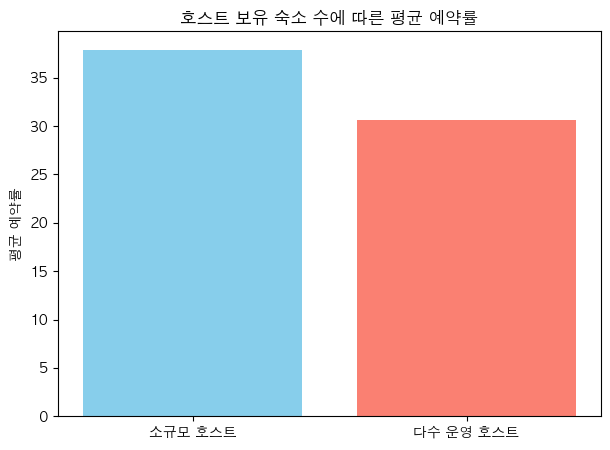

소규모 호스트 평균 예약률: 37.90500653036225
다수 운영 호스트 평균 예약률: 30.621345458773465


In [923]:
import numpy as np

plt.figure(figsize=(7,5))
plt.bar(['소규모 호스트', '다수 운영 호스트'],
        [np.mean(small_host), np.mean(large_host)],
        color=['skyblue','salmon'])
plt.ylabel('평균 예약률')
plt.title('호스트 보유 숙소 수에 따른 평균 예약률')
plt.show()

print("소규모 호스트 평균 예약률:", np.mean(small_host))
print("다수 운영 호스트 평균 예약률:", np.mean(large_host))


In [924]:
tstat, pval = stats.ttest_ind(small_host, large_host, equal_var=False)

print("t-test: small host vs large host")
print("t-statistic =", tstat, "p-value =", pval)

t-test: small host vs large host
t-statistic = 17.81641376018658 p-value = 1.6275228336408605e-70


In [925]:
# =============================================================================
# Step 3: 가설검정
# =============================================================================
print("\n[가설검정]")
print("-"*40)

# 가설 설정
print("H₀: μ₀ = μ₁ (호스트 전체 등록 숙소 수(소형, 대형)에 따라 예약률 차이는 없다)")
print("H₁: μ₀ ≠ μ₁ (호스트 전체 등록 숙소 수 (소형, 대형)에 따라 예약률 차이가 있다)")
print("유의수준: α = 0.05")

# -----------------------------------------------------------------------------
# 3-1. 검정 방법 선택 및 실행
# -----------------------------------------------------------------------------
# 정규성 검정 결과에 따라 모수/비모수 검정 선택
if is_normal_0 and is_normal_1:
    # 모수 검정: 독립표본 t-검정 (두 그룹 모두 정규분포)
    t_stat, p_value = ttest_ind(small_host, large_host, equal_var=equal_var)
    test_name = "Student's t-test" if equal_var else "Welch's t-test"
    print(f"\n{test_name} 결과:")
    print(f"t = {t_stat:.4f}, p = {p_value:.4f}")
    
    # Cohen's d 효과 크기 계산 (표준화된 평균 차이)
    # d = (평균1 - 평균2) / 합동표준편차
    pooled_std = np.sqrt((small_host.var() + large_host.var()) / 2)
    cohens_d = (small_host.mean() - large_host.mean()) / pooled_std
    abs_d = abs(cohens_d)
    
    # Cohen's d 해석 기준
    if abs_d < 0.2:
        effect = "매우 작은 효과"
    elif abs_d < 0.5:
        effect = "작은 효과"
    elif abs_d < 0.8:
        effect = "중간 효과"
    else:
        effect = "큰 효과"
    
    print(f"Cohen's d = {cohens_d:.3f} ({effect})")

else:
    # 비모수 검정: Mann-Whitney U 검정 (정규성 가정 위반)
    # 중앙값 차이를 검정 (순위 기반)
    u_stat, p_value = mannwhitneyu(small_host, large_host, alternative='two-sided')
    print(f"\nMann-Whitney U test 결과:")
    print(f"U = {u_stat:.4f}, p = {p_value:.4f}")

# -----------------------------------------------------------------------------
# 3-2. 통계적 결론 도출
# -----------------------------------------------------------------------------
print(f"\n[결론]")

# p-value를 유의수준(α=0.05)과 비교하여 가설 채택/기각 결정
if p_value < 0.05:
    print(f"✅ p-value({p_value:.4f}) < 0.05 → 귀무가설 기각")
    print(f"   호스트 전체 등록 숙소 수 (소형, 대형)에 따라 예약률 차이가 있다")
    print(f"   (통계적으로 의미있는 차이 존재)")
else:
    print(f"❌ p-value({p_value:.4f}) ≥ 0.05 → 귀무가설 채택")
    print(f"   호스트 전체 등록 숙소 수 (소형, 대형)에 따라 예약률 차이가 없다")
    print(f"   (관측된 차이는 우연에 의한 것일 수 있음)")


[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (호스트 전체 등록 숙소 수(소형, 대형)에 따라 예약률 차이는 없다)
H₁: μ₀ ≠ μ₁ (호스트 전체 등록 숙소 수 (소형, 대형)에 따라 예약률 차이가 있다)
유의수준: α = 0.05

Welch's t-test 결과:
t = 17.8164, p = 0.0000
Cohen's d = 0.239 (작은 효과)

[결론]
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   호스트 전체 등록 숙소 수 (소형, 대형)에 따라 예약률 차이가 있다
   (통계적으로 의미있는 차이 존재)


통계적으로는 유의하지만 비즈니스 관점에서는 큰 효과는 없다.

호스트 인증 방식 verification_count
- H0: 인증 개수에 따라 예약률 차이는 없다.
- H1: 인증 개수에 따라 예약률 차이가 있다.'

데이터 보기용에 있음 ...

- H0: 숙박 일수에 따라서 예약률에 차이가 없다.
- H1: 숙박 일수에 따라서 예약률에 차이가 있다.

1. max ≤ 7 : 단기 전용 숙소
2. min ≤ 7 and max > 7: 단기+장기 모두 가능
3. min ≥ 28: 장기만 받는 숙소

In [934]:
# 그룹 나누기
def stay(row):
    if row['maximum_nights'] <= 30:
        return '단기 전용 숙소'
    elif 30 < row['maximum_nights'] < 365:
        return '유연형 숙소'
    else:
        return '장기 전용 숙소'

df['stay'] = df.apply(stay, axis=1)
df['stay'].value_counts()

stay
장기 전용 숙소    15003
유연형 숙소       4877
단기 전용 숙소     2394
Name: count, dtype: int64

In [927]:
# 그룹 데이터 분리
short = df[df['stay'] == '단기 전용 숙소']['occupancy_rate']
mixed = df[df['stay'] == '유연형 숙소']['occupancy_rate']
long = df[df['stay'] == '장기 전용 숙소']['occupancy_rate']

In [928]:
# 정규성 검정
is_normal_s = check_normality_simple(short, "단기 전용 예약률")
is_normal_m = check_normality_simple(mixed, "유연형 숙소 예약률")
is_normal_l = check_normality_simple(long, "장기 전용 예약률")


[단기 전용 예약률 정규성 검정] n=2394
----------------------------------------
왜도(Skewness): -0.099
첨도(Kurtosis): -1.454
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[유연형 숙소 예약률 정규성 검정] n=4877
----------------------------------------
왜도(Skewness): 0.004
첨도(Kurtosis): -1.310
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[장기 전용 예약률 정규성 검정] n=15003
----------------------------------------
왜도(Skewness): 0.767
첨도(Kurtosis): -0.612
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


In [935]:
from scipy.stats import levene

# 등분산성 검정
stat, p_levene = levene(short, mixed, long)
print(f"Levene's test p-value: {p_levene:.4f}")

equal_var = p_levene > 0.05
print(f"결과: {'✅ 등분산 가정 충족 → ANOVA 가능' if equal_var else '❌ 등분산 위반 → Welch ANOVA 진행'}")


Levene's test p-value: 0.0000
결과: ❌ 등분산 위반 → Welch ANOVA 진행


In [936]:
import pingouin as pg

if not equal_var and is_normal_s and is_normal_m and is_normal_l:
    # ==========================================================================
    # Welch's ANOVA (정규성 만족, 등분산성 위반)
    # ==========================================================================
    print("\n⚠️ 등분산성 가정이 위반되었으므로 Welch's ANOVA를 수행합니다.")
    print("\n[Welch's ANOVA (이분산 ANOVA)]")
    print("-"*50)
    
    # Welch's ANOVA 수행
    stay_df = pd.concat([
    df[df['stay'] == '단기 전용 숙소'][['occupancy_rate']].assign(group='단기 전용 숙소'),
    df[df['stay'] == '유연형 숙소'][['occupancy_rate']].assign(group='유연한 숙소'),
    df[df['stay'] == '장기 전용 숙소'][['occupancy_rate']].assign(group='장기 전용 숙소')], axis=0).reset_index(drop=True)


    welch_result = pg.welch_anova(dv='occupancy_rate', between= 'group', data=verification_df)
    
    f_stat = welch_result['F'].values[0]
    df1 = welch_result['ddof1'].values[0]
    df2 = welch_result['ddof2'].values[0]
    p_value = welch_result['p-unc'].values[0]
    
    print(f"F-통계량: {f_stat:.4f}")
    print(f"자유도: F({df1:.2f}, {df2:.2f})")
    print(f"p-value: {p_value:.6f}")
    
    print("\n※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로")
    print("   전통적인 효과 크기(η², ω²)를 직접 계산하기 어렵습니다.")
    print("   F 통계량과 p-value로 효과의 유의성을 판단하세요.")
    
    # 결론
    print("\n[검정 결론]")
    if p_value < 0.05:
        print(f"✅ p-value({p_value:.6f}) < 0.05 → 귀무가설 기각")
        print("   숙박 일수에 따라서 예약률에 차이가 있다")
        print("   → Games-Howell 사후검정으로 구체적인 차이 확인 필요")

    else:
        print(f"❌ p-value({p_value:.6f}) ≥ 0.05 → 귀무가설 채택")
        print("   숙박 일수에 따라서 예약률에 차이가 없다")


⚠️ 등분산성 가정이 위반되었으므로 Welch's ANOVA를 수행합니다.

[Welch's ANOVA (이분산 ANOVA)]
--------------------------------------------------
F-통계량: 40.0268
자유도: F(2.00, 4489.56)
p-value: 0.000000

※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로
   전통적인 효과 크기(η², ω²)를 직접 계산하기 어렵습니다.
   F 통계량과 p-value로 효과의 유의성을 판단하세요.

[검정 결론]
✅ p-value(0.000000) < 0.05 → 귀무가설 기각
   숙박 일수에 따라서 예약률에 차이가 있다
   → Games-Howell 사후검정으로 구체적인 차이 확인 필요



[Games-Howell 사후검정]
--------------------------------------------------
※ 등분산성 가정을 만족하지 않아 Games-Howell 사용

[사후검정 결과]
--------------------------------------------------


,A,B,mean(A),mean(B),diff,pval,reject
0,단기 전용 숙소,유연한 숙소,45.5394,42.5832,2.9562,0.0007,True
1,단기 전용 숙소,장기 전용 숙소,45.5394,29.8467,15.6928,0.0000,True
2,유연한 숙소,장기 전용 숙소,42.5832,29.8467,12.7366,0.0000,True



[결과 해석]
--------------------------------------------------
평균 순위:
  1위: 단기 전용 숙소 (평균: 45.54)
  2위: 유연한 숙소 (평균: 42.58)
  3위: 장기 전용 숙소 (평균: 29.85)

그룹 간 관계:
  • 단기 전용 숙소 ≠ 유연한 숙소 (p=0.0007, 유의한 차이)
  • 단기 전용 숙소 ≠ 장기 전용 숙소 (p=0.0000, 유의한 차이)
  • 유연한 숙소 ≠ 장기 전용 숙소 (p=0.0000, 유의한 차이)


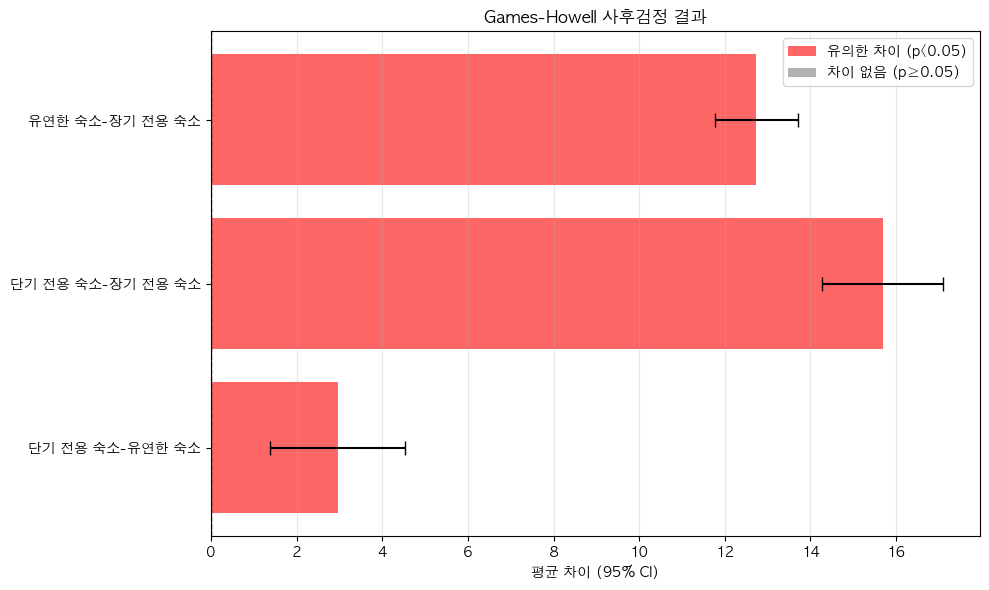

In [931]:
if p_value < 0.05:
    gh_result = perform_gameshowell(stay_df, 'occupancy_rate', 'group')


In [933]:
eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)

print(f"효과 크기 (η²): {eta_sq:.4f} ({interpretation})")
print(f"   → 숙박일수 지정한 차이가 전체 변동의 {eta_sq*100:.1f}% 설명")

효과 크기 (η²): 0.0048 (매우 작은 효과)
   → 숙박일수 지정한 차이가 전체 변동의 0.5% 설명


운영 전략은 예약률에 유의한 영향을 미친다 (p < 0.05).

단기 전용 숙소가 가장 높은 예약률을 기록했으며 장기 예약만 허용하는 숙소는 예약률이 가장 낮았다.
장기 숙박만 받는 전략은 수요 감소 → 예약률 저하
고객 모집 범위가 줄고 검색 노출률이 낮아질 가능성.

✅ 가장 효율적인 전략 = 단기 또는 유연형 운영 전략
"최소 숙박 1~3일" 유지하면서 "최대 숙박 제한은 너무 빡세지 않게" 운영한 숙소가 경쟁력 가짐.

리뷰 가치 평점 review_scores_value

In [951]:
# 그룹 나누기
def score(row):
    if row['review_scores_value'] <= 4.64:
        return '하위 평점 숙소'
    elif 4.64 < row['review_scores_value'] < 4.75:
        return '중위 평점 숙소'
    else:
        return '상위 평점 숙소'

df['score'] = df.apply(score, axis=1)
df['score'].value_counts()

score
상위 평점 숙소    14531
하위 평점 숙소     5593
중위 평점 숙소     2150
Name: count, dtype: int64

In [ ]:
# 그룹 데이터 분리
low = df[df['score'] == '하위 평점 숙소']['occupancy_rate']
middle = df[df['score'] == '중위 평점 숙소']['occupancy_rate']
high = df[df['score'] == '상위 평점 숙소']['occupancy_rate']

In [952]:
# 정규성 검정
is_normal_l = check_normality_simple(low, "단기 전용 예약률")
is_normal_m = check_normality_simple(middle, "유연형 숙소 예약률")
is_normal_h = check_normality_simple(high, "장기 전용 예약률")


[단기 전용 예약률 정규성 검정] n=4396
----------------------------------------
왜도(Skewness): 0.423
첨도(Kurtosis): -1.014
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[유연형 숙소 예약률 정규성 검정] n=6560
----------------------------------------
왜도(Skewness): 0.438
첨도(Kurtosis): -1.048
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[장기 전용 예약률 정규성 검정] n=6493
----------------------------------------
왜도(Skewness): -0.023
첨도(Kurtosis): -1.170
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


In [954]:
# 등분산성 검정
stat, p_levene = levene(low, middle, high)
print(f"Levene's test p-value: {p_levene:.4f}")

equal_var = p_levene > 0.05
print(f"결과: {'✅ 등분산 가정 충족 → ANOVA 가능' if equal_var else '❌ 등분산 위반 → Welch ANOVA 진행'}")

Levene's test p-value: 0.8062
결과: ✅ 등분산 가정 충족 → ANOVA 가능


In [955]:
# -----------------------------------------------------------------------------
# 3. ANOVA 수행
# -----------------------------------------------------------------------------
print("\n[ANOVA 검정 결과]")
print("-"*50)

# F 검정 수행
# F = MSB(집단 간 평균제곱) / MSW(집단 내 평균제곱)
f_stat, p_value = f_oneway(low, middle, high)

# 자유도 계산
k = 3  # 그룹 수
N = len(low) + len(middle) + len(high)  # 전체 표본 수
df_between = k - 1  # 집단 간 자유도
df_within = N - k   # 집단 내 자유도

print(f"F-통계량: {f_stat:.4f}")
print(f"자유도: F({df_between}, {df_within})")
print(f"p-value: {p_value:.6f}")


[ANOVA 검정 결과]
--------------------------------------------------
F-통계량: 150.9759
자유도: F(2, 17446)
p-value: 0.000000


In [956]:
# -----------------------------------------------------------------------------
# 4. 효과 크기 계산
# -----------------------------------------------------------------------------
eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)
print(f"효과 크기 (η²): {eta_sq:.4f} ({interpretation})")
print(f"   → 리뷰가치 평점이 예약률 변동의 {eta_sq*100:.1f}% 설명")

# -----------------------------------------------------------------------------
# 5. 통계적 결론
# -----------------------------------------------------------------------------
print("\n[결론]")
if p_value < 0.05:
    print(f"✅ p-value({p_value:.6f}) < 0.05 → 귀무가설 기각")
    print("   리뷰가치 평점 그룹간 예약률과 차이가 있음")
    print("   → 리뷰 가치 평점 그룹간 예약률 차이가 있다")
else:
    print(f"❌ p-value({p_value:.6f}) ≥ 0.05 → 귀무가설 채택")
    print("   → 리뷰 가치 평점 그룹간 예약률 차이가 없다")

효과 크기 (η²): 0.0170 (작은 효과)
   → 리뷰가치 평점이 예약률 변동의 1.7% 설명

[결론]
✅ p-value(0.000000) < 0.05 → 귀무가설 기각
   리뷰가치 평점 그룹간 예약률과 차이가 있음
   → 리뷰 가치 평점 그룹간 예약률 차이가 있다



[Tukey HSD 사후검정]
--------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
high_rating low_rating  -0.0761    0.0 -0.0889 -0.0633   True
high_rating mid_rating   -0.076    0.0 -0.0875 -0.0646   True
 low_rating mid_rating   0.0001 0.9998 -0.0127  0.0129  False
-------------------------------------------------------------

[결과 해석]
--------------------------------------------------
평균 순위:
  1위: high_rating (평균: 0.49)
  2위: mid_rating (평균: 0.41)
  3위: low_rating (평균: 0.41)

그룹 간 관계:
  • high_rating ≠ low_rating (p=0.0000, 유의한 차이)
  • high_rating ≠ mid_rating (p=0.0000, 유의한 차이)
  • low_rating ≈ mid_rating (p=0.9998, 차이 없음)


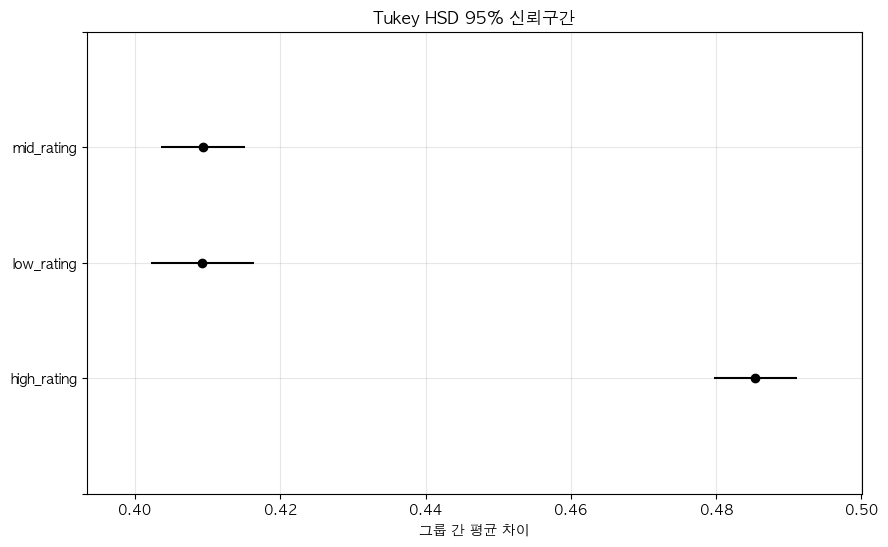


사후검정: Tukey HSD

[Tukey HSD 사후검정]
--------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
high_rating low_rating  -0.0761    0.0 -0.0889 -0.0633   True
high_rating mid_rating   -0.076    0.0 -0.0875 -0.0646   True
 low_rating mid_rating   0.0001 0.9998 -0.0127  0.0129  False
-------------------------------------------------------------

[결과 해석]
--------------------------------------------------
평균 순위:
  1위: high_rating (평균: 0.49)
  2위: mid_rating (평균: 0.41)
  3위: low_rating (평균: 0.41)

그룹 간 관계:
  • high_rating ≠ low_rating (p=0.0000, 유의한 차이)
  • high_rating ≠ mid_rating (p=0.0000, 유의한 차이)
  • low_rating ≈ mid_rating (p=0.9998, 차이 없음)


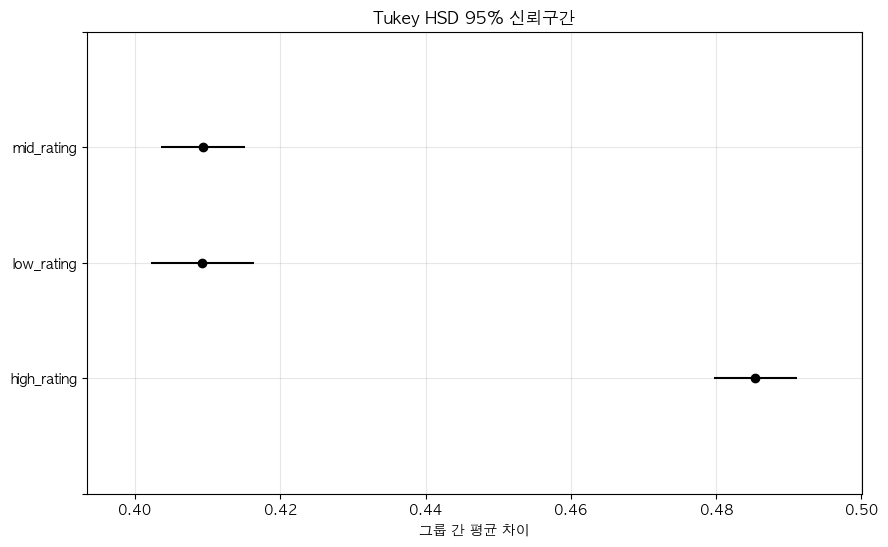

In [ ]:
# =============================================================================
# 사후검정 (Post-hoc Test)
# =============================================================================
# ANOVA가 유의한 경우에만 수행
# 어떤 그룹의 리뷰가치 평점에 구체적으로 차이가 있는지 확인

# Tukey 호출 방식
groups = [low, middle, high]
labels = ['low_rating', 'mid_rating', 'high_rating']

perform_tukey_hsd(groups, labels)


if p_value < 0.05:
    print("\n" + "="*60)
    print("사후검정: Tukey HSD")
    print("="*60)
    
    tukey_result = perform_tukey_hsd(groups, labels) #정규성과, 등분산성을 모두 만족하는 경우 해당 함수 활용

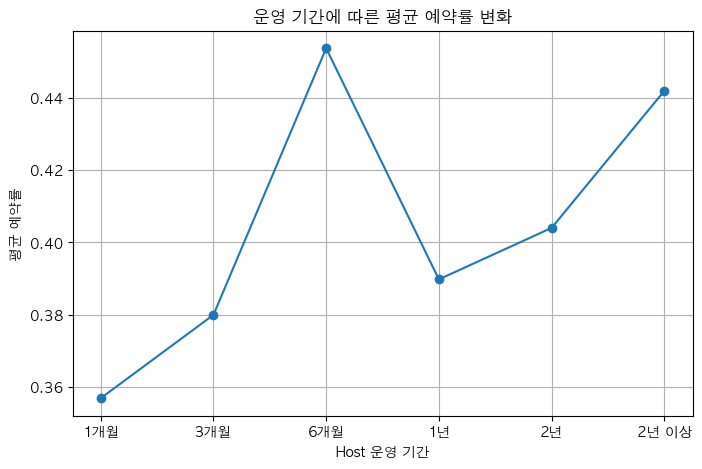

In [ ]:
df['host_day_group'] = pd.cut(
    df['host_day'],
    bins=[0, 30, 90, 180, 365, 730, 20000],
    labels=['1개월', '3개월', '6개월', '1년', '2년', '2년 이상']
)

# 그룹별 평균 예약률 계산
group_trend = df.groupby('host_day_group')['occupancy_rate'].mean()

# 선 그래프
plt.figure(figsize=(8,5))
plt.plot(group_trend.index.astype(str), group_trend.values, marker='o')
plt.title('운영 기간에 따른 평균 예약률 변화')
plt.xlabel('Host 운영 기간')
plt.ylabel('평균 예약률')
plt.grid(True)
plt.show()

In [941]:
# 데이터 준비
verification1 = df[df['verification_count'] == 1]['occupancy_rate']
verification2 = df[df['verification_count'] == 2]['occupancy_rate']
verification3 = df[df['verification_count'] == 3]['occupancy_rate']

In [943]:
is_normal_1 = check_normality_simple(verification1, "호스트 인증 1개")
is_normal_2 = check_normality_simple(verification2, "호스트 인증 2개")
is_normal_3 = check_normality_simple(verification3, "호스트 인증 3개")


[호스트 인증 1개 정규성 검정] n=2142
----------------------------------------
왜도(Skewness): 0.653
첨도(Kurtosis): -0.805
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[호스트 인증 2개 정규성 검정] n=16900
----------------------------------------
왜도(Skewness): 0.425
첨도(Kurtosis): -1.183
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[호스트 인증 3개 정규성 검정] n=3230
----------------------------------------
왜도(Skewness): 0.727
첨도(Kurtosis): -0.557
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


In [944]:
from scipy.stats import levene

# 등분산성 검정
stat, p_levene = levene(verification1, verification2, verification3)
print(f"Levene's test p-value: {p_levene:.4f}")

equal_var = p_levene > 0.05
print(f"결과: {'✅ 등분산 가정 충족 → ANOVA 가능' if equal_var else '❌ 등분산 위반 → Welch ANOVA 진행'}")


Levene's test p-value: 0.0000
결과: ❌ 등분산 위반 → Welch ANOVA 진행


In [947]:
import pingouin as pg

if not equal_var and is_normal_1 and is_normal_2 and is_normal_3:
    # ==========================================================================
    # Welch's ANOVA (정규성 만족, 등분산성 위반)
    # ==========================================================================
    print("\n⚠️ 등분산성 가정이 위반되었으므로 Welch's ANOVA를 수행합니다.")
    print("\n[Welch's ANOVA (이분산 ANOVA)]")
    print("-"*50)
    
    # Welch's ANOVA 수행
    verification_df = pd.concat([
    df[df['verification_count'] == 1][['occupancy_rate']].assign(group='1개 인증'),
    df[df['verification_count'] == 2][['occupancy_rate']].assign(group='2개 인증'),
    df[df['verification_count'] == 3][['occupancy_rate']].assign(group='3개 인증')], axis=0).reset_index(drop=True)


    welch_result = pg.welch_anova(dv='occupancy_rate', between= 'group', data=verification_df)
    
    f_stat = welch_result['F'].values[0]
    df1 = welch_result['ddof1'].values[0]
    df2 = welch_result['ddof2'].values[0]
    p_value = welch_result['p-unc'].values[0]
    
    print(f"F-통계량: {f_stat:.4f}")
    print(f"자유도: F({df1:.2f}, {df2:.2f})")
    print(f"p-value: {p_value:.6f}")
    
    print("\n※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로")
    print("   전통적인 효과 크기(η², ω²)를 직접 계산하기 어렵습니다.")
    print("   F 통계량과 p-value로 효과의 유의성을 판단하세요.")
    
    # 결론
    print("\n[검정 결론]")
    if p_value < 0.05:
        print(f"✅ p-value({p_value:.6f}) < 0.05 → 귀무가설 기각")
        print("   인증 개수에 따라 예약률 차이가 있다")
        print("   → Games-Howell 사후검정으로 구체적인 차이 확인 필요")

    else:
        print(f"❌ p-value({p_value:.6f}) ≥ 0.05 → 귀무가설 채택")
        print("   인증 개수에 따라 예약률 차이는 없다")


⚠️ 등분산성 가정이 위반되었으므로 Welch's ANOVA를 수행합니다.

[Welch's ANOVA (이분산 ANOVA)]
--------------------------------------------------
F-통계량: 40.0268
자유도: F(2.00, 4489.56)
p-value: 0.000000

※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로
   전통적인 효과 크기(η², ω²)를 직접 계산하기 어렵습니다.
   F 통계량과 p-value로 효과의 유의성을 판단하세요.

[검정 결론]
✅ p-value(0.000000) < 0.05 → 귀무가설 기각
   인증 개수에 따라 예약률 차이가 있다
   → Games-Howell 사후검정으로 구체적인 차이 확인 필요



[Games-Howell 사후검정]
--------------------------------------------------
※ 등분산성 가정을 만족하지 않아 Games-Howell 사용

[사후검정 결과]
--------------------------------------------------


,A,B,mean(A),mean(B),diff,pval,reject
0,1개 인증,2개 인증,29.5893,35.2187,-5.6294,0.0000,True
1,1개 인증,3개 인증,29.5893,32.7519,-3.1626,0.0003,True
2,2개 인증,3개 인증,35.2187,32.7519,2.4669,0.0000,True



[결과 해석]
--------------------------------------------------
평균 순위:
  1위: 2개 인증 (평균: 35.22)
  2위: 3개 인증 (평균: 32.75)
  3위: 1개 인증 (평균: 29.59)

그룹 간 관계:
  • 1개 인증 ≠ 2개 인증 (p=0.0000, 유의한 차이)
  • 1개 인증 ≠ 3개 인증 (p=0.0003, 유의한 차이)
  • 2개 인증 ≠ 3개 인증 (p=0.0000, 유의한 차이)


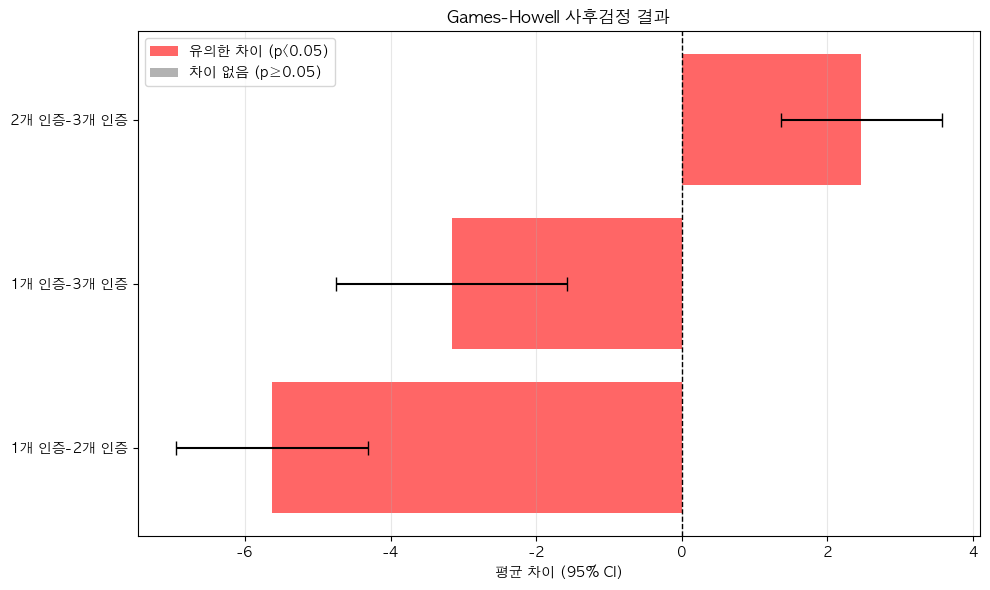

In [948]:
if p_value < 0.05:
    gh_result = perform_gameshowell(verification_df, 'occupancy_rate', 'group')
    

In [949]:
eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)

print(f"효과 크기 (η²): {eta_sq:.4f} ({interpretation})")
print(f"   → 인증방식의 차이가 전체 변동의 {eta_sq*100:.1f}% 설명")

효과 크기 (η²): 0.0036 (매우 작은 효과)
   → 인증방식의 차이가 전체 변동의 0.4% 설명


H0: 인증 개수(1개, 2개, 3개)에 따라 예약률 차이는 없다

H1: 인증 개수에 따라 예약률 차이가 있다 ✅ (기각됨)
인증이 1개뿐인 호스트는 상대적으로 신뢰도가 낮아 예약률이 낮은 경향을 보인다.
그러나 인증 개수가 많다고 해서 무조건 예약률이 높아지는 것은 아니며, 2개 인증 그룹이 오히려 가장 높은 예약률을 기록했다.

# 어메니티 카운트

In [937]:
# 데이터 준비
print("\n" + "="*80)
print("가설검정 6: 편의시설 개수별 평균 예약률 차이 검정")
print("="*80)


amen_groups = []
amen_labels = []

# 각 편의시설 개수별 데이터 분리
amen_under_450 = df[df['amenity_count'] <=450]
amen_between_450_850 = df[(df['amenity_count'] > 450) & (df['amenity_count'] < 850)]
amen_over_850 = df[df['amenity_count'] >=850]

for amen_group, label in zip(
    [amen_under_450, amen_between_450_850, amen_over_850],
    ['amen_under_450', 'amen_between_450_850', 'amen_over_850']
):
    group_data = amen_group['occupancy_rate'].dropna().values 
    if len(group_data)>0:  # 빈 그룹 방지
        amen_groups.append(group_data)
        amen_labels.append(label)

print(f"\n분석 대상 편의시설 개수 : {amen_labels}")
print(f"\n각 편의시설 개수별 통계:")

for label, data in zip(amen_labels, amen_groups):
    print(f"\n편의시설 개수 {label}:")
    print(f"  • 샘플 수: {len(data):,}개")
    print(f"  • 평균 예약률: {np.mean(data):.3f}회")
    print(f"  • 표준편차: {np.std(data, ddof=1):.3f}")
    print(f"  • 중앙값: {np.median(data):.3f}회")


가설검정 6: 편의시설 개수별 평균 예약률 차이 검정

분석 대상 편의시설 개수 : ['amen_under_450', 'amen_between_450_850', 'amen_over_850']

각 편의시설 개수별 통계:

편의시설 개수 amen_under_450:
  • 샘플 수: 9,386개
  • 평균 예약률: 32.944회
  • 표준편차: 31.124
  • 중앙값: 26.301회

편의시설 개수 amen_between_450_850:
  • 샘플 수: 9,368개
  • 평균 예약률: 34.406회
  • 표준편차: 30.389
  • 중앙값: 26.575회

편의시설 개수 amen_over_850:
  • 샘플 수: 3,520개
  • 평균 예약률: 37.773회
  • 표준편차: 30.345
  • 중앙값: 33.973회


In [938]:
print("\n[가설 설정]")
print("H₀: 모든 편의시설 개수 그룹의 평균 예약률이 같다")
print("H₁: 적어도 한 편의시설 개수 그룹의 평균 예약률이 다르다")
print("유의수준: α = 0.05")

# -----------------------------------------------------------------------------
# Step 1: 정규성 검정
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 1: 정규성 검정")
print("="*60)

normality_results = []
all_normal = True

for label, data in zip(amen_labels, amen_groups):
    print(f"\n{'='*40}")
    is_normal = check_normality_simple(data, f"{label} 편의시설 개수 그룹 예약률")
    print(f"{'='*40}")
    
    all_normal = all_normal and is_normal
    
    # 통계량 추출 (요약용)
    normality_results.append({
        '편의시설 개수 그룹': label,
        'n': len(data),
        '왜도': round(stats.skew(data), 3),
        '첨도': round(stats.kurtosis(data, fisher=True), 3),
        '판정': '정규분포 ✓' if is_normal else '정규분포 X'
    })

# 요약 테이블 출력
result_df = pd.DataFrame(normality_results)
print("\n[정규성 검정 요약]")
display(result_df)

if all_normal:
    print("\n✅ 모든 편의시설 개수 그룹이 정규성 가정을 만족합니다.")
    print("   → 모수 검정 (ANOVA) 사용 가능")
else:
    print("\n⚠️ 일부 편의시설 개수 그룹이 정규성 가정을 만족하지 않습니다.")
    print("   → 비모수 검정 (Kruskal-Wallis) 사용 권장")


[가설 설정]
H₀: 모든 편의시설 개수 그룹의 평균 예약률이 같다
H₁: 적어도 한 편의시설 개수 그룹의 평균 예약률이 다르다
유의수준: α = 0.05

Step 1: 정규성 검정


[amen_under_450 편의시설 개수 그룹 예약률 정규성 검정] n=9386
----------------------------------------
왜도(Skewness): 0.566
첨도(Kurtosis): -1.037
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[amen_between_450_850 편의시설 개수 그룹 예약률 정규성 검정] n=9368
----------------------------------------
왜도(Skewness): 0.501
첨도(Kurtosis): -1.033
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[amen_over_850 편의시설 개수 그룹 예약률 정규성 검정] n=3520
----------------------------------------
왜도(Skewness): 0.259
첨도(Kurtosis): -1.224
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[정규성 검정 요약]


,편의시설 개수 그룹,n,왜도,첨도,판정
0,amen_under_450,9386,0.566,-1.037,정규분포 ✓
1,amen_between_450_850,9368,0.501,-1.033,정규분포 ✓
2,amen_over_850,3520,0.259,-1.224,정규분포 ✓



✅ 모든 편의시설 개수 그룹이 정규성 가정을 만족합니다.
   → 모수 검정 (ANOVA) 사용 가능


In [939]:
# -----------------------------------------------------------------------------
# Step 2: 등분산성 검정 (Levene's test)
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 2: 등분산성 검정 (Levene's test)")
print("="*60)

# 그룹 개수 확인 (최소 2개 필요)
if len(amen_groups) < 2:
    print(f"\n⚠️ 유효한 그룹이 {len(amen_groups)}개입니다. (Levene's test는 2개 이상 필요)")
    print("   → 등분산성 검정 건너뜀")
    equal_var_anova = None
else:
    stat_lev, p_lev = levene(*amen_groups)
    print(f"\nLevene 통계량: {stat_lev:.4f}")
    print(f"p-value: {p_lev:.4f}")

    if p_lev > 0.05:
        print("\n✅ 등분산성 가정을 만족합니다. (p > 0.05)")
        print("   → One-way ANOVA 사용 가능")
        equal_var_anova = True
    else:
        print("\n⚠️ 등분산성 가정을 만족하지 않습니다. (p ≤ 0.05)")
        print("   → Welch's ANOVA 사용 권장")
        equal_var_anova = False


Step 2: 등분산성 검정 (Levene's test)

Levene 통계량: 1.7183
p-value: 0.1794

✅ 등분산성 가정을 만족합니다. (p > 0.05)
   → One-way ANOVA 사용 가능


In [940]:
# -----------------------------------------------------------------------------
# Step 3: ANOVA 검정 수행
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 3: ANOVA 검정")
print("="*60)

# 전체 표본 크기 및 그룹 수 계산
k = len(amen_groups)
N = sum(len(g) for g in amen_groups)
df_between = k - 1
df_within = N - k

if all_normal and equal_var_anova:
    # ==========================================================================
    # One-way ANOVA (정규성 ✓, 등분산성 ✓)
    # ==========================================================================
    print("\n[One-way ANOVA 수행]")
    print("-"*50)
    print("✓ 정규성 만족, 등분산성 만족 → 표준 ANOVA 사용")
    
    f_stat, p_value_anova = f_oneway(*amen_groups)
    
    print(f"\nF-통계량: {f_stat:.4f}")
    print(f"자유도: F({df_between}, {df_within})")
    print(f"p-value: {p_value_anova:.6f}")
    
    # 효과 크기 (에타제곱)
    eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)
    print(f"\n[효과 크기]")
    print(f"에타제곱 (η²): {eta_sq:.4f} ({interpretation})")
    print(f"   → 편의시설 개수가 예약률 변동의 {eta_sq*100:.1f}%를 설명")
    
    test_used = "One-way ANOVA"

elif all_normal and not equal_var_anova:
    # ==========================================================================
    # Welch's ANOVA (정규성 ✓, 등분산성 X)
    # ==========================================================================
    print("\n[Welch's ANOVA 수행]")
    print("-"*50)
    print("✓ 정규성 만족, ✗ 등분산성 위반 → Welch's ANOVA 사용")
    
    # 데이터프레임 생성
    df_welch = pd.DataFrame({
        'occupancy_rate': np.concatenate(amen_groups),
        'amen_group': np.concatenate([[label]*len(data) for label, data in zip(amen_labels, amen_groups)])
    })
    
    welch_result = pg.welch_anova(dv='occupancy_rate', between='amen_group', data=df_welch)
    
    f_stat = welch_result['F'].values[0]
    df1 = welch_result['ddof1'].values[0]
    df2 = welch_result['ddof2'].values[0]
    p_value_anova = welch_result['p-unc'].values[0]
    
    print(f"\nF-통계량: {f_stat:.4f}")
    print(f"자유도: F({df1:.2f}, {df2:.2f})")
    print(f"p-value: {p_value_anova:.6f}")
    
    print("\n※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로")
    print("   효과 크기(η²) 계산이 제한적입니다.")
    print("   F 통계량과 p-value로 효과의 유의성을 판단하세요.")
    
    test_used = "Welch's ANOVA"

else:
    # ==========================================================================
    # Kruskal-Wallis (정규성 X)
    # ==========================================================================
    print("\n[Kruskal-Wallis Test 수행]")
    print("-"*50)
    print("✗ 정규성 위반 → 비모수 검정 사용")
    
    h_stat, p_value_anova = stats.kruskal(*amen_groups)
    
    df = k - 1
    
    print(f"\nH-통계량: {h_stat:.4f}")
    print(f"자유도: {df}")
    print(f"p-value: {p_value_anova:.6f}")
    
    # 비모수 효과 크기 (epsilon-squared)
    epsilon_sq = (h_stat - k + 1) / (N - k)
    
    if epsilon_sq < 0.01:
        effect_interp = "매우 작은 효과"
    elif epsilon_sq < 0.06:
        effect_interp = "작은 효과"
    elif epsilon_sq < 0.14:
        effect_interp = "중간 효과"
    else:
        effect_interp = "큰 효과"
    
    print(f"\n[효과 크기]")
    print(f"Epsilon-squared (ε²): {epsilon_sq:.4f} ({effect_interp})")
    print(f"   → 편의시설 개수 그룹의 예약률 순위 변동의 {epsilon_sq*100:.1f}%를 설명")
    
    test_used = "Kruskal-Wallis"


Step 3: ANOVA 검정

[One-way ANOVA 수행]
--------------------------------------------------
✓ 정규성 만족, 등분산성 만족 → 표준 ANOVA 사용

F-통계량: 31.7448
자유도: F(2, 22271)
p-value: 0.000000

[효과 크기]
에타제곱 (η²): 0.0028 (매우 작은 효과)
   → 편의시설 개수가 예약률 변동의 0.3%를 설명


# 빌딩 타입 라벨

In [957]:
# 데이터 준비
print("\n" + "="*80)
print("가설검정 4: 건물 유형별 평균 예약률 차이 검정")
print("="*80)


building_groups = []
building_labels = []

# 각 지역별 데이터 분리
Apartment = df[df['building_type_label']==0]
Home = df[df['building_type_label']==8]
Guesthouse = df[df['building_type_label']==7]
Other = df[(df['building_type_label']!=0) & (df['building_type_label']!=8) & (df['building_type_label']!=7)]


for building_group, label in zip(
    [Apartment, Home, Guesthouse, Other],
    ['Apartment', 'Home', 'Guesthouse', 'Other']
):
    group_data = building_group['occupancy_rate'].dropna().values 
    if len(group_data)>0:  # 빈 그룹 방지
        building_groups.append(group_data)
        building_labels.append(label)

print(f"\n분석 대상 건물 유형 : {building_labels}")
print(f"\n각 건물 유형별 통계:")

for label, data in zip(building_labels, building_groups):
    print(f"\n건물 유형 {label}:")
    print(f"  • 샘플 수: {len(data):,}개")
    print(f"  • 평균 예약률: {np.mean(data):.3f}회")
    print(f"  • 표준편차: {np.std(data, ddof=1):.3f}")
    print(f"  • 중앙값: {np.median(data):.3f}회")


가설검정 4: 건물 유형별 평균 예약률 차이 검정

분석 대상 건물 유형 : ['Apartment', 'Home', 'Guesthouse', 'Other']

각 건물 유형별 통계:

건물 유형 Apartment:
  • 샘플 수: 16,129개
  • 평균 예약률: 33.109회
  • 표준편차: 29.912
  • 중앙값: 26.301회

건물 유형 Home:
  • 샘플 수: 3,090개
  • 평균 예약률: 33.983회
  • 표준편차: 31.847
  • 중앙값: 26.301회

건물 유형 Guesthouse:
  • 샘플 수: 504개
  • 평균 예약률: 39.056회
  • 표준편차: 30.206
  • 중앙값: 37.671회

건물 유형 Other:
  • 샘플 수: 2,551개
  • 평균 예약률: 41.466회
  • 표준편차: 33.455
  • 중앙값: 33.151회


In [958]:
print("\n[가설 설정]")
print("H₀: 모든 건물 유형의 평균 예약률이 같다")
print("    μ_Apartment = μ_Home = μ_Guesthouse = μ_Other")
print("H₁: 적어도 한 건물 유형의 평균 예약률이 다르다")
print("유의수준: α = 0.05")

# -----------------------------------------------------------------------------
# Step 1: 정규성 검정
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 1: 정규성 검정")
print("="*60)

normality_results = []
all_normal = True

for label, data in zip(building_labels, building_groups):
    print(f"\n{'='*40}")
    is_normal = check_normality_simple(data, f"{label} 건물 유형 예약률")
    print(f"{'='*40}")
    
    all_normal = all_normal and is_normal
    
    # 통계량 추출 (요약용)
    normality_results.append({
        '건물 유형': label,
        'n': len(data),
        '왜도': round(stats.skew(data), 3),
        '첨도': round(stats.kurtosis(data, fisher=True), 3),
        '판정': '정규분포 ✓' if is_normal else '정규분포 X'
    })

# 요약 테이블 출력
result_df = pd.DataFrame(normality_results)
print("\n[정규성 검정 요약]")
display(result_df)

if all_normal:
    print("\n✅ 모든 건물 유형이 정규성 가정을 만족합니다.")
    print("   → 모수 검정 (ANOVA) 사용 가능")
else:
    print("\n⚠️ 일부 건물 유형이 정규성 가정을 만족하지 않습니다.")
    print("   → 비모수 검정 (Kruskal-Wallis) 사용 권장")


[가설 설정]
H₀: 모든 건물 유형의 평균 예약률이 같다
    μ_Apartment = μ_Home = μ_Guesthouse = μ_Other
H₁: 적어도 한 건물 유형의 평균 예약률이 다르다
유의수준: α = 0.05

Step 1: 정규성 검정


[Apartment 건물 유형 예약률 정규성 검정] n=16129
----------------------------------------
왜도(Skewness): 0.540
첨도(Kurtosis): -0.971
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[Home 건물 유형 예약률 정규성 검정] n=3090
----------------------------------------
왜도(Skewness): 0.428
첨도(Kurtosis): -1.243
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[Guesthouse 건물 유형 예약률 정규성 검정] n=504
----------------------------------------
왜도(Skewness): 0.175
첨도(Kurtosis): -1.217
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[Other 건물 유형 예약률 정규성 검정] n=2551
----------------------------------------
왜도(Skewness): 0.253
첨도(Kurtosis): -1.434
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[정규성 검정 요약]


,건물 유형,n,왜도,첨도,판정
0,Apartment,16129,0.540,-0.971,정규분포 ✓
1,Home,3090,0.428,-1.243,정규분포 ✓
2,Guesthouse,504,0.175,-1.217,정규분포 ✓
3,Other,2551,0.253,-1.434,정규분포 ✓



✅ 모든 건물 유형이 정규성 가정을 만족합니다.
   → 모수 검정 (ANOVA) 사용 가능


In [959]:
# -----------------------------------------------------------------------------
# Step 2: 등분산성 검정 (Levene's test)
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 2: 등분산성 검정 (Levene's test)")
print("="*60)

# 그룹 개수 확인 (최소 2개 필요)
if len(building_groups) < 2:
    print(f"\n⚠️ 유효한 그룹이 {len(building_groups)}개입니다. (Levene's test는 2개 이상 필요)")
    print("   → 등분산성 검정 건너뜀")
    equal_var_anova = None
else:
    stat_lev, p_lev = levene(*building_groups)
    print(f"\nLevene 통계량: {stat_lev:.4f}")
    print(f"p-value: {p_lev:.4f}")

    if p_lev > 0.05:
        print("\n✅ 등분산성 가정을 만족합니다. (p > 0.05)")
        print("   → One-way ANOVA 사용 가능")
        equal_var_anova = True
    else:
        print("\n⚠️ 등분산성 가정을 만족하지 않습니다. (p ≤ 0.05)")
        print("   → Welch's ANOVA 사용 권장")
        equal_var_anova = False


Step 2: 등분산성 검정 (Levene's test)

Levene 통계량: 69.0072
p-value: 0.0000

⚠️ 등분산성 가정을 만족하지 않습니다. (p ≤ 0.05)
   → Welch's ANOVA 사용 권장


In [960]:
# -----------------------------------------------------------------------------
# Step 3: ANOVA 검정 수행
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 3: ANOVA 검정")
print("="*60)

# 전체 표본 크기 및 그룹 수 계산
k = len(building_groups)
N = sum(len(g) for g in building_groups)
df_between = k - 1
df_within = N - k

if all_normal and equal_var_anova:
    # ==========================================================================
    # One-way ANOVA (정규성 ✓, 등분산성 ✓)
    # ==========================================================================
    print("\n[One-way ANOVA 수행]")
    print("-"*50)
    print("✓ 정규성 만족, 등분산성 만족 → 표준 ANOVA 사용")
    
    f_stat, p_value_anova = f_oneway(*building_groups)
    
    print(f"\nF-통계량: {f_stat:.4f}")
    print(f"자유도: F({df_between}, {df_within})")
    print(f"p-value: {p_value_anova:.6f}")
    
    # 효과 크기 (에타제곱)
    eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)
    print(f"\n[효과 크기]")
    print(f"에타제곱 (η²): {eta_sq:.4f} ({interpretation})")
    print(f"   → 건물 유형이 예약률 변동의 {eta_sq*100:.1f}%를 설명")
    
    test_used = "One-way ANOVA"

elif all_normal and not equal_var_anova:
    # ==========================================================================
    # Welch's ANOVA (정규성 ✓, 등분산성 X)
    # ==========================================================================
    print("\n[Welch's ANOVA 수행]")
    print("-"*50)
    print("✓ 정규성 만족, ✗ 등분산성 위반 → Welch's ANOVA 사용")
    
    # 데이터프레임 생성
    df_welch = pd.DataFrame({
        'occupancy_rate': np.concatenate(building_groups),
        'building_group': np.concatenate([[label]*len(data) for label, data in zip(building_labels, building_groups)])
    })
    
    welch_result = pg.welch_anova(dv='occupancy_rate', between='building_group', data=df_welch)
    
    f_stat = welch_result['F'].values[0]
    df1 = welch_result['ddof1'].values[0]
    df2 = welch_result['ddof2'].values[0]
    p_value_anova = welch_result['p-unc'].values[0]
    
    print(f"\nF-통계량: {f_stat:.4f}")
    print(f"자유도: F({df1:.2f}, {df2:.2f})")
    print(f"p-value: {p_value_anova:.6f}")
    
    print("\n※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로")
    print("   효과 크기(η²) 계산이 제한적입니다.")
    print("   F 통계량과 p-value로 효과의 유의성을 판단하세요.")
    
    test_used = "Welch's ANOVA"

else:
    # ==========================================================================
    # Kruskal-Wallis (정규성 X)
    # ==========================================================================
    print("\n[Kruskal-Wallis Test 수행]")
    print("-"*50)
    print("✗ 정규성 위반 → 비모수 검정 사용")
    
    h_stat, p_value_anova = stats.kruskal(*building_groups)
    
    df = k - 1
    
    print(f"\nH-통계량: {h_stat:.4f}")
    print(f"자유도: {df}")
    print(f"p-value: {p_value_anova:.6f}")
    
    # 비모수 효과 크기 (epsilon-squared)
    epsilon_sq = (h_stat - k + 1) / (N - k)
    
    if epsilon_sq < 0.01:
        effect_interp = "매우 작은 효과"
    elif epsilon_sq < 0.06:
        effect_interp = "작은 효과"
    elif epsilon_sq < 0.14:
        effect_interp = "중간 효과"
    else:
        effect_interp = "큰 효과"
    
    print(f"\n[효과 크기]")
    print(f"Epsilon-squared (ε²): {epsilon_sq:.4f} ({effect_interp})")
    print(f"   → 건물 유형이 예약률 순위 변동의 {epsilon_sq*100:.1f}%를 설명")
    
    test_used = "Kruskal-Wallis"


Step 3: ANOVA 검정

[Welch's ANOVA 수행]
--------------------------------------------------
✓ 정규성 만족, ✗ 등분산성 위반 → Welch's ANOVA 사용

F-통계량: 51.5976
자유도: F(3.00, 2025.59)
p-value: 0.000000

※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로
   효과 크기(η²) 계산이 제한적입니다.
   F 통계량과 p-value로 효과의 유의성을 판단하세요.


In [961]:
eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)

print(f"효과 크기 (η²): {eta_sq:.4f} ({interpretation})")
print(f"   → 빌딩 타입 차이가 전체 변동의 {eta_sq*100:.1f}% 설명")

효과 크기 (η²): 0.0069 (매우 작은 효과)
   → 빌딩 타입 차이가 전체 변동의 0.7% 설명


In [882]:
df[df['neighbourhood_group_cleansed'] == 'Brooklyn'].shape[0]



7455

In [887]:
df[df['neighbourhood_group_cleansed'] == 'Queens'].shape[0]

3420

In [894]:
# 상위 10% 예약률 데이터
threshold = df['occupancy_rate'].quantile(0.9)
df_top = df[df['occupancy_rate'] >= threshold]
print(f"상위 10% 기준 예약률 임계값: {threshold:.2f}")
print(f"상위 숙소 개수: {len(df_top)} / 전체 {len(df)}")
# 수치형 컬럼
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if c not in ['id','estimated_occupancy_rate','occupancy_rate', 'availability_365', 'estimated_occupancy_l365d']]
num_summary = []
for c in num_cols:
    top_mean = df_top[c].mean()
    all_mean = df[c].mean()
    diff = top_mean - all_mean
    rel = (diff / all_mean) * 100 if pd.notna(all_mean) and all_mean != 0 else np.nan
    num_summary.append({
        'feature': c,
        'top_mean': top_mean,           # 상위 10% 예약률 숙소 평균
        'all_mean': all_mean,           # 전체 숙소 데이터 평균
        'mean_diff': diff,              # 평균 차이
        'abs_mean_diff': abs(diff),     # 절댓값 차이
        'rel_diff_pct': rel             # 상대 차이(%)
    })
num_summary = (pd.DataFrame(num_summary)
               .dropna(subset=['top_mean', 'all_mean'])
               .sort_values('mean_diff', ascending=False))
num_summary2 = (pd.DataFrame(num_summary)
               .dropna(subset=['top_mean', 'all_mean'])
               .sort_values('mean_diff', ascending=True))
# 범주형 컬럼
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
cat_summary = []
for c in cat_cols:
    top_ratio = df_top[c].value_counts(normalize=True, dropna=False)
    all_ratio = df[c].value_counts(normalize=True, dropna=False)
    combined = pd.concat([top_ratio, all_ratio], axis=1, keys=['top_ratio','all_ratio']).fillna(0)
    combined['diff'] = combined['top_ratio'] - combined['all_ratio']
    combined['abs_diff'] = combined['diff'].abs()  # 절댓값
    top_change = combined['diff'].abs().idxmax()
    cat_summary.append({
        'feature': c,
        'category_most_diff': top_change,
        'top_ratio': combined.loc[top_change, 'top_ratio'],  # 상위 10% 예약률 숙소 비율
        'all_ratio': combined.loc[top_change, 'all_ratio'],  # 전체 숙소 데이터 비율
        'diff': combined.loc[top_change, 'diff'],            # 비율 차이
        'abs_diff': combined.loc[top_change, 'abs_diff']     # 비율 절댓값 차이
    })
cat_summary = pd.DataFrame(cat_summary).sort_values('diff', ascending=False)
cat_summary2 = pd.DataFrame(cat_summary).sort_values('diff', ascending=True)
print("예약률 상위 숙소에서 평균이 더 높은 항목 Top 10(Numeric)")
display(num_summary.head(10))
print("예약률 상위 숙소에서 평균이 더 낮은 항목 Top 10(Numeric)")
display(num_summary2.head(10))
print("예약률 상위 숙소에서 비율이 두드러지게 높은 항목 Top 10(Categorical)")
display(cat_summary.head(10))
print("예약률 상위 숙소에서 비율이 두드러지게 낮은 항목 Top 10(Categorical)")
display(cat_summary2.head(10))

상위 10% 기준 예약률 임계값: 81.10
상위 숙소 개수: 2243 / 전체 22274


KeyError: 'diff'

In [888]:
df.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'number_of_reviews_ly', 'estimated_occupancy_l365d', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [902]:
cols_cat = ['neighbourhood_group_cleansed_label', 'building_type_label', 'room_type_label']
cols_num = ['amenity_count', 'review_scores_value', 'verification_count', 'stay']

In [903]:
# 예약률 기준 상하위 30% 그룹 분리
lower_threshold = df['occupancy_rate'].quantile(0.3)
upper_threshold = df['occupancy_rate'].quantile(0.7)

low_group = df[df['occupancy_rate'] <= lower_threshold]
high_group = df[df['occupancy_rate'] >= upper_threshold]

print(f"하위그룹 수: {len(low_group)}, 상위그룹 수: {len(high_group)}")


하위그룹 수: 6916, 상위그룹 수: 7020


# 지역별 가설 검정

In [962]:
# 데이터 준비
print("\n" + "="*80)
print("가설검정 3: 지역별 평균 예약률 차이 검정")
print("="*80)


region_groups = []
region_labels = []

# 각 지역별 데이터 분리
Bronx = df[df['neighbourhood_group_cleansed_label']==0]
Brooklyn = df[df['neighbourhood_group_cleansed_label']==1]
Manhattan = df[df['neighbourhood_group_cleansed_label']==2]
Queens = df[df['neighbourhood_group_cleansed_label']==3]
StatenIsland = df[df['neighbourhood_group_cleansed_label']==4]


for region_group, label in zip(
    [Bronx, Brooklyn, Manhattan, Queens, StatenIsland],
    ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'StatenIsland']
):
    group_data = region_group['occupancy_rate'].dropna().values 
    if len(group_data)>0:  # 빈 그룹 방지
        region_groups.append(group_data)
        region_labels.append(label)

print(f"\n분석 대상 지역 : {region_labels}")
print(f"\n각 지역별 통계:")

for label, data in zip(region_labels, region_groups):
    print(f"\n지역 {label}:")
    print(f"  • 샘플 수: {len(data):,}개")
    print(f"  • 평균 예약률: {np.mean(data):.3f}회")
    print(f"  • 표준편차: {np.std(data, ddof=1):.3f}")
    print(f"  • 중앙값: {np.median(data):.3f}회")


가설검정 3: 지역별 평균 예약률 차이 검정

분석 대상 지역 : ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'StatenIsland']

각 지역별 통계:

지역 Bronx:
  • 샘플 수: 911개
  • 평균 예약률: 29.436회
  • 표준편차: 31.297
  • 중앙값: 17.534회

지역 Brooklyn:
  • 샘플 수: 7,442개
  • 평균 예약률: 36.770회
  • 표준편차: 30.814
  • 중앙값: 31.507회

지역 Manhattan:
  • 샘플 수: 10,194개
  • 평균 예약률: 32.888회
  • 표준편차: 29.879
  • 중앙값: 26.027회

지역 Queens:
  • 샘플 수: 3,414개
  • 평균 예약률: 34.980회
  • 표준편차: 32.625
  • 중앙값: 26.301회

지역 StatenIsland:
  • 샘플 수: 313개
  • 평균 예약률: 29.876회
  • 표준편차: 28.693
  • 중앙값: 26.301회


In [963]:
print("\n[가설 설정]")
print("H₀: 모든 지역의 평균 예약률이 같다")
print("    μ_Bronx =μ_Brooklyn = μ_Manhattan = μ_Queens = = μ_StatenIsland")
print("H₁: 적어도 한 지역의 평균 예약률이 다르다")
print("유의수준: α = 0.05")

# -----------------------------------------------------------------------------
# Step 1: 정규성 검정
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 1: 정규성 검정")
print("="*60)

normality_results = []
all_normal = True

for label, data in zip(region_labels, region_groups):
    print(f"\n{'='*40}")
    is_normal = check_normality_simple(data, f"{label} 지역 예약률")
    print(f"{'='*40}")
    
    all_normal = all_normal and is_normal
    
    # 통계량 추출 (요약용)
    normality_results.append({
        '지역': label,
        'n': len(data),
        '왜도': round(stats.skew(data), 3),
        '첨도': round(stats.kurtosis(data, fisher=True), 3),
        '판정': '정규분포 ✓' if is_normal else '정규분포 X'
    })

# 요약 테이블 출력
result_df = pd.DataFrame(normality_results)
print("\n[정규성 검정 요약]")
display(result_df)

if all_normal:
    print("\n✅ 모든 지역이 정규성 가정을 만족합니다.")
    print("   → 모수 검정 (ANOVA) 사용 가능")
else:
    print("\n⚠️ 일부 지역이 정규성 가정을 만족하지 않습니다.")
    print("   → 비모수 검정 (Kruskal-Wallis) 사용 권장")


[가설 설정]
H₀: 모든 지역의 평균 예약률이 같다
    μ_Bronx =μ_Brooklyn = μ_Manhattan = μ_Queens = = μ_StatenIsland
H₁: 적어도 한 지역의 평균 예약률이 다르다
유의수준: α = 0.05

Step 1: 정규성 검정


[Bronx 지역 예약률 정규성 검정] n=911
----------------------------------------
왜도(Skewness): 0.647
첨도(Kurtosis): -1.010
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[Brooklyn 지역 예약률 정규성 검정] n=7442
----------------------------------------
왜도(Skewness): 0.307
첨도(Kurtosis): -1.242
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[Manhattan 지역 예약률 정규성 검정] n=10194
----------------------------------------
왜도(Skewness): 0.657
첨도(Kurtosis): -0.792
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[Queens 지역 예약률 정규성 검정] n=3414
----------------------------------------
왜도(Skewness): 0.375
첨도(Kurtosis): -1.345
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


[StatenIsland 지역 예약률 정규성 검정] n=313
----------------------------------------
왜도(Skewness): 0.523
첨도(Kurtosis): -0.986
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[정규성 검정 요약]


,지역,n,왜도,첨도,판정
0,Bronx,911,0.647,-1.010,정규분포 ✓
1,Brooklyn,7442,0.307,-1.242,정규분포 ✓
2,Manhattan,10194,0.657,-0.792,정규분포 ✓
3,Queens,3414,0.375,-1.345,정규분포 ✓
4,StatenIsland,313,0.523,-0.986,정규분포 ✓



✅ 모든 지역이 정규성 가정을 만족합니다.
   → 모수 검정 (ANOVA) 사용 가능


In [964]:
# -----------------------------------------------------------------------------
# Step 2: 등분산성 검정 (Levene's test)
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 2: 등분산성 검정 (Levene's test)")
print("="*60)

# 그룹 개수 확인 (최소 2개 필요)
if len(region_groups) < 2:
    print(f"\n⚠️ 유효한 그룹이 {len(region_groups)}개입니다. (Levene's test는 2개 이상 필요)")
    print("   → 등분산성 검정 건너뜀")
    equal_var_anova = None
else:
    stat_lev, p_lev = levene(*region_groups)
    print(f"\nLevene 통계량: {stat_lev:.4f}")
    print(f"p-value: {p_lev:.4f}")

    if p_lev > 0.05:
        print("\n✅ 등분산성 가정을 만족합니다. (p > 0.05)")
        print("   → One-way ANOVA 사용 가능")
        equal_var_anova = True
    else:
        print("\n⚠️ 등분산성 가정을 만족하지 않습니다. (p ≤ 0.05)")
        print("   → Welch's ANOVA 사용 권장")
        equal_var_anova = False


Step 2: 등분산성 검정 (Levene's test)

Levene 통계량: 44.5194
p-value: 0.0000

⚠️ 등분산성 가정을 만족하지 않습니다. (p ≤ 0.05)
   → Welch's ANOVA 사용 권장


In [965]:
# -----------------------------------------------------------------------------
# Step 3: ANOVA 검정 수행
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("Step 3: ANOVA 검정")
print("="*60)

# 전체 표본 크기 및 그룹 수 계산
k = len(region_groups)
N = sum(len(g) for g in region_groups)
df_between = k - 1
df_within = N - k

if all_normal and equal_var_anova:
    # ==========================================================================
    # One-way ANOVA (정규성 ✓, 등분산성 ✓)
    # ==========================================================================
    print("\n[One-way ANOVA 수행]")
    print("-"*50)
    print("✓ 정규성 만족, 등분산성 만족 → 표준 ANOVA 사용")
    
    f_stat, p_value_anova = f_oneway(*region_groups)
    
    print(f"\nF-통계량: {f_stat:.4f}")
    print(f"자유도: F({df_between}, {df_within})")
    print(f"p-value: {p_value_anova:.6f}")
    
    # 효과 크기 (에타제곱)
    eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)
    print(f"\n[효과 크기]")
    print(f"에타제곱 (η²): {eta_sq:.4f} ({interpretation})")
    print(f"   → 지역이 예약률 변동의 {eta_sq*100:.1f}%를 설명")
    
    test_used = "One-way ANOVA"

elif all_normal and not equal_var_anova:
    # ==========================================================================
    # Welch's ANOVA (정규성 ✓, 등분산성 X)
    # ==========================================================================
    print("\n[Welch's ANOVA 수행]")
    print("-"*50)
    print("✓ 정규성 만족, ✗ 등분산성 위반 → Welch's ANOVA 사용")
    
    # 데이터프레임 생성
    df_welch = pd.DataFrame({
        'occupancy_rate': np.concatenate(region_groups),
        'region_group': np.concatenate([[label]*len(data) for label, data in zip(region_labels, region_groups)])
    })
    
    welch_result = pg.welch_anova(dv='occupancy_rate', between='region_group', data=df_welch)
    
    f_stat = welch_result['F'].values[0]
    df1 = welch_result['ddof1'].values[0]
    df2 = welch_result['ddof2'].values[0]
    p_value_anova = welch_result['p-unc'].values[0]
    
    print(f"\nF-통계량: {f_stat:.4f}")
    print(f"자유도: F({df1:.2f}, {df2:.2f})")
    print(f"p-value: {p_value_anova:.6f}")
    
    print("\n※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로")
    print("   효과 크기(η²) 계산이 제한적입니다.")
    print("   F 통계량과 p-value로 효과의 유의성을 판단하세요.")
    
    test_used = "Welch's ANOVA"

else:
    # ==========================================================================
    # Kruskal-Wallis (정규성 X)
    # ==========================================================================
    print("\n[Kruskal-Wallis Test 수행]")
    print("-"*50)
    print("✗ 정규성 위반 → 비모수 검정 사용")
    
    h_stat, p_value_anova = stats.kruskal(*region_groups)
    
    df = k - 1
    
    print(f"\nH-통계량: {h_stat:.4f}")
    print(f"자유도: {df}")
    print(f"p-value: {p_value_anova:.6f}")
    
    # 비모수 효과 크기 (epsilon-squared)
    epsilon_sq = (h_stat - k + 1) / (N - k)
    
    if epsilon_sq < 0.01:
        effect_interp = "매우 작은 효과"
    elif epsilon_sq < 0.06:
        effect_interp = "작은 효과"
    elif epsilon_sq < 0.14:
        effect_interp = "중간 효과"
    else:
        effect_interp = "큰 효과"
    
    print(f"\n[효과 크기]")
    print(f"Epsilon-squared (ε²): {epsilon_sq:.4f} ({effect_interp})")
    print(f"   → 지역이 예약률 순위 변동의 {epsilon_sq*100:.1f}%를 설명")
    
    test_used = "Kruskal-Wallis"


Step 3: ANOVA 검정

[Welch's ANOVA 수행]
--------------------------------------------------
✓ 정규성 만족, ✗ 등분산성 위반 → Welch's ANOVA 사용

F-통계량: 25.3455
자유도: F(4.00, 1808.24)
p-value: 0.000000

※ Welch's ANOVA는 등분산성 가정을 요구하지 않으므로
   효과 크기(η²) 계산이 제한적입니다.
   F 통계량과 p-value로 효과의 유의성을 판단하세요.


In [966]:
eta_sq, interpretation = calculate_eta_squared(f_stat, df_between, df_within)

print(f"효과 크기 (η²): {eta_sq:.4f} ({interpretation})")
print(f"   → 지역 차이가 전체 변동의 {eta_sq*100:.1f}% 설명")

효과 크기 (η²): 0.0045 (매우 작은 효과)
   → 지역 차이가 전체 변동의 0.5% 설명


In [967]:
print("\n" + "="*80)
print("가설검정 7: 가격 그룹의 평균 예약률 차이 검정")
print("="*80)

# 데이터 준비
price_under_400 = df[df['price'] <=400]['occupancy_rate']
price_over_400 = df[df['price'] > 400]['occupancy_rate']

print(f"\n400달러 이하: n={len(price_under_400)}, 평균={price_under_400.mean():.2f}")
print(f"400달러 이상: n={len(price_over_400)}, 평균={price_over_400.mean():.2f}") # n: sample size(데이터 크기(개수))


가설검정 7: 가격 그룹의 평균 예약률 차이 검정

400달러 이하: n=20168, 평균=34.74
400달러 이상: n=2106, 평균=30.31


In [968]:
print("\n" + "="*50)
print("가설검정 프로세스")
print("="*50)

# Step 1: 정규성 검정
is_normal_0 = check_normality_simple(price_under_400, "400$ 이하 가격")
is_normal_1 = check_normality_simple(price_over_400, "400$ 이상 가격")


가설검정 프로세스

[400$ 이하 가격 정규성 검정] n=20168
----------------------------------------
왜도(Skewness): 0.454
첨도(Kurtosis): -1.119
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[400$ 이상 가격 정규성 검정] n=2106
----------------------------------------
왜도(Skewness): 0.828
첨도(Kurtosis): -0.572
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))


In [969]:
# Step 2: 등분산성 검정
print("\n[등분산성 검정]")
print("-"*40)
stat, p_levene = levene(is_normal_0, is_normal_1)
print(f"Levene's test p-value: {p_levene:.4f}")
equal_var = p_levene > 0.05
print(f"결과: {'✅ 등분산 가정 충족' if equal_var else '❌ 이분산 → Welch t-test 사용'}")


[등분산성 검정]
----------------------------------------
Levene's test p-value: nan
결과: ❌ 이분산 → Welch t-test 사용


In [971]:
tstat, pval = stats.ttest_ind(price_under_400, price_over_400, equal_var=False)

print("t-test: 가격에 따른 예약률")
print("t-statistic =", tstat, "p-value =", pval)

t-test: 가격에 따른 예약률
t-statistic = 6.275266103650984 p-value = 4.0857951454301793e-10


In [973]:
# =============================================================================
# Step 3: 가설검정
# =============================================================================
print("\n[가설검정]")
print("-"*40)

# 가설 설정
print("H₀: μ₀ = μ₁ (가격에 따라서 예약률에 차이가 없다)")
print("H₁: μ₀ ≠ μ₁ (가격에 따라서 예약률에 차이가 있다)")
print("유의수준: α = 0.05")

# -----------------------------------------------------------------------------
# 3-1. 검정 방법 선택 및 실행
# -----------------------------------------------------------------------------
# 정규성 검정 결과에 따라 모수/비모수 검정 선택
if is_normal_0 and is_normal_1:
    # 모수 검정: 독립표본 t-검정 (두 그룹 모두 정규분포)
    t_stat, p_value = ttest_ind(price_under_400, price_over_400, equal_var=equal_var)
    test_name = "Student's t-test" if equal_var else "Welch's t-test"
    print(f"\n{test_name} 결과:")
    print(f"t = {t_stat:.4f}, p = {p_value:.4f}")
    
    # Cohen's d 효과 크기 계산 (표준화된 평균 차이)
    # d = (평균1 - 평균2) / 합동표준편차
    pooled_std = np.sqrt((price_under_400.var() + price_over_400.var()) / 2)
    cohens_d = (price_under_400.mean() - price_over_400.mean()) / pooled_std
    abs_d = abs(cohens_d)
    
    # Cohen's d 해석 기준
    if abs_d < 0.2:
        effect = "매우 작은 효과"
    elif abs_d < 0.5:
        effect = "작은 효과"
    elif abs_d < 0.8:
        effect = "중간 효과"
    else:
        effect = "큰 효과"
    
    print(f"Cohen's d = {cohens_d:.3f} ({effect})")

else:
    # 비모수 검정: Mann-Whitney U 검정 (정규성 가정 위반)
    # 중앙값 차이를 검정 (순위 기반)
    u_stat, p_value = mannwhitneyu(price_under_400, price_over_400, alternative='two-sided')
    print(f"\nMann-Whitney U test 결과:")
    print(f"U = {u_stat:.4f}, p = {p_value:.4f}")

# -----------------------------------------------------------------------------
# 3-2. 통계적 결론 도출
# -----------------------------------------------------------------------------
print(f"\n[결론]")

# p-value를 유의수준(α=0.05)과 비교하여 가설 채택/기각 결정
if p_value < 0.05:
    print(f"✅ p-value({p_value:.4f}) < 0.05 → 귀무가설 기각")
    print(f"   가격에 따라서 예약률에 차이가 있다")
    print(f"   (통계적으로 의미있는 차이 존재)")
else:
    print(f"❌ p-value({p_value:.4f}) ≥ 0.05 → 귀무가설 채택")
    print(f"   즉시 예약 여부에 따라 예약률의 차이가 없다")
    print(f"   (관측된 차이는 우연에 의한 것일 수 있음)")


[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (가격에 따라서 예약률에 차이가 없다)
H₁: μ₀ ≠ μ₁ (가격에 따라서 예약률에 차이가 있다)
유의수준: α = 0.05

Welch's t-test 결과:
t = 6.2753, p = 0.0000
Cohen's d = 0.144 (매우 작은 효과)

[결론]
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   가격에 따라서 예약률에 차이가 있다
   (통계적으로 의미있는 차이 존재)


In [974]:
# forest plot
! pip install forestplot

  Attempting uninstall: matplotlib-inline
    Found existing installation: matplotlib-inline 0.1.7
    Uninstalling matplotlib-inline-0.1.7:
      Successfully uninstalled matplotlib-inline-0.1.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [forestplot]


In [979]:
import pandas as pd

df_fp = pd.DataFrame({
    "label": [
        "리뷰 평점 유지 (4.76~5점)",
        "숙소 건물 유형",
        "최소/최대 숙박일 설정",
        "지역",
        "인증 방식 수",
        "편의시설 수"
    ],
   "eta2": [0.017, 0.0069, 0.0048, 0.0045, 0.0036, 0.0028]
})


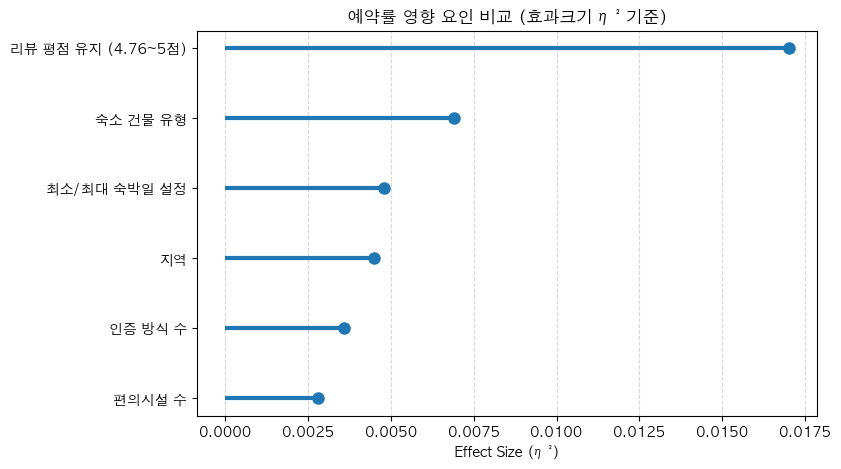

In [983]:
import matplotlib.pyplot as plt

df_b = df_fp.sort_values("eta2", ascending=True)

plt.figure(figsize=(8,5))
plt.hlines(y=df_b["label"], xmin=0, xmax=df_b["eta2"], linewidth=3)
plt.plot(df_b["eta2"], df_b["label"], "o", markersize=8)
plt.title("예약률 영향 요인 비교 (효과크기 η² 기준)")
plt.xlabel("Effect Size (η²)")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


In [984]:
# 실행 용이성 가중치 설정
df["controllability"] = [0.7, 0.3, 1.0, 0.3, 0.7, 1.0]  # 변경 가능성 가중치
df["impact_score"] = (df["eta2"] / 0.20) * 100  # η² 기준 상대 영향력(%) 변환
df["priority_score"] = df["impact_score"] * df["controllability"]

df_priority = df.sort_values("priority_score", ascending=False)
df_priority


ValueError: Length of values (6) does not match length of index (22274)

In [976]:
df['verification_count'].unique()

array([3, 2, 1, 0])